# Workflow for obtaining the final CNS protein list applying some filters 

##### IRB Barcelona


The aim of this workflow is to obtain a list of CNS proteins which meet certain requirements such as being membrane proteins, targetable, with a PDB structure and being included in the MemProtMD repository. 

The simulations of these proteins will be run in future steps. 


### ______

### Table of contents for obtaining the worklflow

1. List CNS


    1.1. Bgee List
    1.2. Human Protein Atlas List
    1.3. Tissues List
    1.4. Overlap List
    


2. Filters

    a. Filter of biological interest

        2.1. Drug Targetable (Opentarget and Pharos) --> Targets for PD 
        2.2. Membrane protein (Uniprot)
      
     b. Filter of structure
        2.3. Length sequence > 100 aa (Uniprot)
        2.4. PDB structure (PDB)
       
     c. Filter for simulations and inserted in membrane
        2.5. In MemProtMD (MemProtMD)
        
    
    
    
3. Choose those PDBs that are not equal

### ______

#### Import libraries

In [1]:
import pandas as pd
import os
import json
from IPython.display import clear_output
import urllib.request
import json
from typing import Generator
import matplotlib.pyplot as plt
import numpy as np
import requests
import shutil
import json
import urllib.request
from typing import List
import wget

#### Prepare folder where to store everything and downloaded databases

In [2]:
ask = int(input('Is this your first time running the code?: \n · If Yes: introduce 1, \n · If No: introduce 0\n'))

Is this your first time running the code?: 
 · If Yes: introduce 1, 
 · If No: introduce 0
1


In [3]:
os.getcwd()

'/home/imartinv/Descargas/Prueba_Escritorios'

In [4]:
path_ask = str(input('Introduce path where you want to execute this workflow. Take into account it will create new folders and download data:\nThe path must be of the form e.g./home/imartinv/Descargas'))
    
folders = []
    
directory1 = 'Workflow_List_Proteins_List/2.Filters/2.1.OpenTargets'
folders.append(directory1)
directory2 = 'Workflow_List_Proteins_List/2.Filters/2.2.Membrane_UniProt'
folders.append(directory2)
directory3 = 'Workflow_List_Proteins_List/2.Filters/2.3.Length_Sequence'
folders.append(directory3)
directory4 = 'Workflow_List_Proteins_List/2.Filters/2.4.PDB'
folders.append(directory4)
directory5 = 'Workflow_List_Proteins_List/2.Filters/2.5.MemProtMD'
folders.append(directory5)
directory5A = 'Workflow_List_Proteins_List/2.Filters/2.5.MemProtMD/ToStudy_NonRepeatedSequences'
folders.append(directory5A)
directory5B = 'Workflow_List_Proteins_List/2.Filters/2.5.MemProtMD/ToStudy_NonRepeatedSequences/unzipped'
folders.append(directory5B)

    
directory6 = 'Workflow_List_Proteins_List/1.Databases_CNS/1.1.Bgee_database'
folders.append(directory6)
directory7 = 'Workflow_List_Proteins_List/1.Databases_CNS/1.2.HPA_database'
folders.append(directory7)
directory8 = 'Workflow_List_Proteins_List/1.Databases_CNS/1.3.Tissues_database'
folders.append(directory8)
directory9 = 'Workflow_List_Proteins_List/1.Databases_CNS/1.4.Overlap'
folders.append(directory9)
    
path_dir = {}
    
for folder in folders:   
    path = os.path.join(path_ask, folder)
    path_dir[folder] = path

Introduce path where you want to execute this workflow. Take into account it will create new folders and download data:
The path must be of the form e.g./home/imartinv/Descargas/home/imartinv/Descargas/Prueba_Escritorios


In [5]:
if ask == 1: 
    
    for folder in folders:   
        path = os.path.join(path_ask, folder)
        os.makedirs(path)
        path_dir[folder] = path
        
    
    # Download Bgee database 
    wget.download('https://bgee.org/ftp/current/download/calls/expr_calls/Homo_sapiens_expr_simple.tsv.gz', out=path_dir[directory6])
   
    # Download Human Protein Atlas database
    wget.download('https://www.proteinatlas.org/api/search_download.php?search=NOT%20tissue_category_rna%3Abrain%3Bnot%20detected&columns=g,gd,up,pe&compress=no&format=tsv', out=path_dir[directory7])
    
    # Download Tissues database
    wget.download('https://download.jensenlab.org/human_tissue_integrated_full.tsv', out=path_dir[directory8])
    
    # Download Open Targets databases
    os.chdir(path_dir[directory1])
    os.system('rsync -rpltvz --delete rsync.ebi.ac.uk::pub/databases/opentargets/platform/23.02/output/etl/json/associationByOverallDirect .')
    os.system('rsync -rpltvz --delete rsync.ebi.ac.uk::pub/databases/opentargets/platform/23.02/output/etl/json/targets .')
    
    # Download Pharos databases
    wget.download('http://juniper.health.unm.edu/tcrd/download/PharosTCRD_UniProt_Mapping.tsv',out=path_dir[directory1])
    
    #Download UniProt database
    wget.download('https://rest.uniprot.org/uniprotkb/stream?compressed=true&download=true&fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cft_intramem%2Cft_transmem&format=tsv&query=%28reviewed%3Atrue%29%20AND%20%28model_organism%3A9606%29%20AND%20%28existence%3A1%29%20AND%20%28reviewed%3Atrue%29',out = path_dir[directory2])

  0% [                                                  ]   1286144 / 170384838

  9% [....                                              ]  16457728 / 170384838

 16% [........                                          ]  27860992 / 170384838

 24% [............                                      ]  41549824 / 170384838

 31% [...............                                   ]  53673984 / 170384838

 40% [....................                              ]  69738496 / 170384838

 51% [.........................                         ]  87982080 / 170384838

 62% [...............................                   ] 106233856 / 170384838

 68% [..................................                ] 117178368 / 170384838

 79% [.......................................           ] 135200768 / 170384838

 89% [............................................      ] 153141248 / 170384838

100% [..................................................] 170384838 / 170384838

100% [..................................................] 496262107 / 496262107receiving incremental file list
associationByOverallDirect/
associationByOverallDirect/_SUCCESS
associationByOverallDirect/part-00000-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00001-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00002-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00003-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00004-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00005-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00006-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00007-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00008-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00009-af5f1d71-7e3c-4acd-ba5

associationByOverallDirect/part-00095-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00096-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00097-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00098-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00099-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00100-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00101-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00102-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00103-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00104-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00105-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00106-af5f1d71-7e3c-4acd-ba55-90a

associationByOverallDirect/part-00193-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00194-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00195-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00196-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00197-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00198-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json
associationByOverallDirect/part-00199-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json

sent 3,851 bytes  received 25,446,977 bytes  1,131,147.91 bytes/sec
total size is 213,661,577  speedup is 8.40
receiving incremental file list
targets/
targets/_SUCCESS
targets/part-00000-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json
targets/part-00001-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json
targets/part-00002-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json
targets/part-00003-a58b02a9-0daa-4cf0

targets/part-00113-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json
targets/part-00114-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json
targets/part-00115-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json
targets/part-00116-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json
targets/part-00117-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json
targets/part-00118-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json
targets/part-00119-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json
targets/part-00120-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json
targets/part-00121-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json
targets/part-00122-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json
targets/part-00123-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json
targets/part-00124-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json
targets/part-00125-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json
targets/part-00126-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json
targets/part-00127-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json
targets/pa

In [6]:
os.chdir(path_ask)

### 1. Selection of proteins belonging to the Central Nervous System

#### 1.1. Bgee List 

##### - Step 1. Visualize data and uniform it
We are going to visualize some of the list of the proteins in order to see that it was downloaded correctly.

In [7]:
# Specify the path where the file of all proteins is. Instead of unzipping the file in the folder, 
#we read it directly. 

import gzip
with gzip.open(path_dir[directory6]+'/Homo_sapiens_expr_simple.tsv.gz') as f:

    database_bgee= pd.read_csv(f,delimiter='\t')# Read the tsv. Tsv are limited by a t that's why it is called tsv.

database_bgee.head() # Visualization

,Gene ID,Gene name,Anatomical entity ID,Anatomical entity name,Expression,Call quality,FDR,Expression score,Expression rank
0,ENSG00000000003,TSPAN6,CL:0000015,male germ cell,present,gold quality,0.001825,99.04,449.0
1,ENSG00000000003,TSPAN6,CL:0000019,sperm,present,gold quality,0.001673,99.96,20.5
2,ENSG00000000003,TSPAN6,CL:0000023,oocyte,absent,gold quality,0.328065,62.47,17500.0
3,ENSG00000000003,TSPAN6,CL:0000083,epithelial cell of pancreas,present,gold quality,0.005262,83.30,7790.0
4,ENSG00000000003,TSPAN6,CL:0000094,granulocyte,present,silver quality,0.029202,46.45,25000.0


In [8]:
print('Number of entries of Bgee DB: ', len(database_bgee))

Number of entries of Bgee DB:  9093493


In [9]:
# Visualization of the unique values in the Anatomical entity name column: 

unique_anato_id_bgee_notone = database_bgee['Anatomical entity ID'].unique().tolist()
print(unique_anato_id_bgee_notone)

['CL:0000015', 'CL:0000019', 'CL:0000023', 'CL:0000083', 'CL:0000094', 'CL:0000115', 'CL:0000169', 'CL:0000576', 'CL:0000655', 'CL:0000738', 'CL:0000842', 'CL:0002079', 'CL:0002092', 'CL:0002255', 'CL:0002328', 'CL:0002336', 'UBERON:0000002', 'UBERON:0000006', 'UBERON:0000007', 'UBERON:0000014', 'UBERON:0000029', 'UBERON:0000043', 'UBERON:0000044', 'UBERON:0000057', 'UBERON:0000059', 'UBERON:0000074', 'UBERON:0000081', 'UBERON:0000082', 'UBERON:0000160', 'UBERON:0000167', 'UBERON:0000173', 'UBERON:0000178', 'UBERON:0000317', 'UBERON:0000331', 'UBERON:0000355', 'UBERON:0000362', 'UBERON:0000397', 'UBERON:0000399', 'UBERON:0000451', 'UBERON:0000458', 'UBERON:0000465', 'UBERON:0000467', 'UBERON:0000468', 'UBERON:0000473', 'UBERON:0000473 ∩ CL:0000089', 'UBERON:0000474', 'UBERON:0000922', 'UBERON:0000941', 'UBERON:0000945', 'UBERON:0000947', 'UBERON:0000948', 'UBERON:0000955', 'UBERON:0000956', 'UBERON:0000977', 'UBERON:0000979', 'UBERON:0000988', 'UBERON:0000989', 'UBERON:0000991 ∩ CL:000

From visualizing we have taken into account that the column Anatomical entity ID can contain more than one ID. We are going to filter this. We are going to stay with the first one and then add the second one when the list is created. 

In [10]:
CL_ids = [] # We store here the second ID

for id_ in unique_anato_id_bgee_notone: # For each value of the column Anatomical entity ID
    
    if '∩' in id_: # If the intersection symbol is found:
        splitted = id_.split() # The ID is splitted.
        CL_ids.append(splitted[2]) # The third value which starts by CL is stored in a list. 
        database_bgee.replace(to_replace=id_, value=splitted[0], inplace = True, regex=True) # Then, the value of the column where the ID is double is subsituted for its first term
        database_bgee[database_bgee['Anatomical entity ID'] == splitted[0]]

In [11]:
unique_anato_id_bgee = database_bgee['Anatomical entity ID'].unique().tolist()  # Creation of unique list.

unique_anato_id_bgee = unique_anato_id_bgee+CL_ids # Addition of the second ID to the list.

genes = database_bgee['Gene name'].unique().tolist() # Creation of the unique list again just in case. 

##### - Step 2. Find which Anatomical entity ID are from CNS. 

We do a filter of this file to see which proteins are from the Central Nervous System. 

First we go to https://www.ebi.ac.uk/ols/search?q=Central+Nervous+System&groupField=iri&start=0&ontology=uberon where the anatomical region we specified as Central Nervous System. We choose the first one " Central Nervous System" as it is what we want to filter. 

We see that the ID of the CNS is UBERON:0001017. As the list of proteins we have uses this types of ID in the column Anatomical entity ID; we want to filter this column and obtain only those genes that have this ID.

Moreover, theare are some genes that are classified as brain or other CNS parts and not as CNS. So we are also interested in collecting those. We want the Anatomical entity ID of CNS and other parts of CNS. To know these parts of CNS, in the uberon ontology of CNS there is a tree with the children of CNS. 

**What are we going to do**

Note:
We use better the ID rathen than the Anatomical entity name cause the ID is unique and the Anatomical entity name could be free text.


In [12]:

# Given a uberon code retunr a list with all its children uberon codes
def ols_get_code_children (uberon_code : str) -> List[str]:
    
    child_codes = []
    for page in range(0,3):# There are different pages because in one it does not fit all the data. In this case
                            # there are 3 pages containing data. So in the url we have to iterate for eaach page
                            # and from each one we extract the data. 
        # OLS url
    
        request_url = 'https://www.ebi.ac.uk/ols/api/ontologies/uberon/terms/http%253A%252F%252Fpurl.obolibrary.org%252Fobo%252F'+uberon_code+'/hierarchicalDescendants?size=1000&page='+str(page)
        
        try:
            with urllib.request.urlopen(request_url) as response:
                parsed_response = json.loads(response.read().decode("utf-8"))
        # If the accession is not found then we can stop here
        except urllib.error.HTTPError as error:
            print('Error with request ' + request_url)
            raise ValueError('Something went wrong with the PDB request (error ' + str(error.code) + ')')
        # Mine children codes
        embedded = parsed_response.get('_embedded', None)
        if not embedded:
            return []
        children = embedded['terms']

        for child in children:
            #print(child['label'])
            child_code = child['iri'].split('/')[-1] #We select the last element of the iri because it is where the 
                                                    # UBERON code is.
            child_codes.append(child_code) # We append it to the list of children.
            
        # Return childrn codes
    return child_codes

all_descendents = ols_get_code_children('UBERON_0001017')

    
print(len(all_descendents))
print(all_descendents[0:3])

2277
['UBERON_6005096', 'UBERON_0006843', 'UBERON_0002786']


In [13]:
# For the following loop in the next cell (to search the web), the codes of the UBERON have to be with _ not :
# We change : for _

all_descendents_colon= [] #New list of values with _ not :

for i in range(0,len(all_descendents)): 
    all_descendents_colon.append(all_descendents[i].replace("_", ":" )) #We replace : for _ and we insert it to the list. 
    

In [14]:
# We select those codes from the table that are children of CNS (all descendents_colon)

PartsCNS_TF = database_bgee['Anatomical entity ID'].isin(all_descendents_colon)

PartsCNS=database_bgee[PartsCNS_TF]
PartsCNS.head()


,Gene ID,Gene name,Anatomical entity ID,Anatomical entity name,Expression,Call quality,FDR,Expression score,Expression rank
18,ENSG00000000003,TSPAN6,UBERON:0000007,pituitary gland,present,gold quality,1.000000e-14,93.38,3090.0
38,ENSG00000000003,TSPAN6,UBERON:0000451,prefrontal cortex,present,gold quality,4.110953e-14,74.56,11900.0
47,ENSG00000000003,TSPAN6,UBERON:0000941,cranial nerve II,present,gold quality,1.000000e-02,91.36,4030.0
51,ENSG00000000003,TSPAN6,UBERON:0000955,brain,present,gold quality,1.000000e-14,75.86,11300.0
52,ENSG00000000003,TSPAN6,UBERON:0000956,cerebral cortex,present,gold quality,1.000000e-14,74.74,11800.0


In [15]:
# We now select all the codes from the table that corresponds to the CNS: 

CNS = database_bgee[database_bgee['Anatomical entity ID']=='UBERON:0001017']

# We join the two tables obtained: the one for the CNS parts (children of CNS) and the one from CNS.
CNS_and_PartsCNS = pd.concat([CNS,PartsCNS])

CNS_and_PartsCNS.head()

,Gene ID,Gene name,Anatomical entity ID,Anatomical entity name,Expression,Call quality,FDR,Expression score,Expression rank
64,ENSG00000000003,TSPAN6,UBERON:0001017,central nervous system,present,gold quality,1.000000e-14,75.90,11200.0
611,ENSG00000000419,DPM1,UBERON:0001017,central nervous system,present,gold quality,1.000000e-14,90.04,4650.0
905,ENSG00000000457,SCYL3,UBERON:0001017,central nervous system,present,gold quality,1.310418e-08,69.63,14200.0
1189,ENSG00000000460,C1orf112,UBERON:0001017,central nervous system,present,gold quality,1.770695e-10,59.62,18800.0
1465,ENSG00000000938,FGR,UBERON:0001017,central nervous system,present,gold quality,1.000000e-14,68.54,14700.0


In [16]:
print('Number of entries when selecting CNS proteins and its parts: ',len(CNS_and_PartsCNS))

Number of entries when selecting CNS proteins and its parts:  1939872


##### - Step 3. Do a filter for Expression = present
We want only those genes that are expressed in order to have a protein list not a gene list.
We want to do it before the duplicates removal because if it is done after, the duplicates removal function drop_duplicates can select one gene that it is not expressed in some anatomical entity and in other one yes.  

In [17]:
# We select those which are expressed. 

expressed = CNS_and_PartsCNS[CNS_and_PartsCNS['Expression'] == 'present']

expressed.head()

,Gene ID,Gene name,Anatomical entity ID,Anatomical entity name,Expression,Call quality,FDR,Expression score,Expression rank
64,ENSG00000000003,TSPAN6,UBERON:0001017,central nervous system,present,gold quality,1.000000e-14,75.90,11200.0
611,ENSG00000000419,DPM1,UBERON:0001017,central nervous system,present,gold quality,1.000000e-14,90.04,4650.0
905,ENSG00000000457,SCYL3,UBERON:0001017,central nervous system,present,gold quality,1.310418e-08,69.63,14200.0
1189,ENSG00000000460,C1orf112,UBERON:0001017,central nervous system,present,gold quality,1.770695e-10,59.62,18800.0
1465,ENSG00000000938,FGR,UBERON:0001017,central nervous system,present,gold quality,1.000000e-14,68.54,14700.0


In [18]:
# We compare how much genes we have discarted, how much are not expressed. 

print('Number of entries when selecting CNS proteins and its parts: ',len(CNS_and_PartsCNS))
print('Number of entries when selecting CNS proteins and its parts with protein expression: ',len(expressed))

Number of entries when selecting CNS proteins and its parts:  1939872
Number of entries when selecting CNS proteins and its parts with protein expression:  1481642


##### - Step 4. Filter those repeated

We have obtained a list which includes proteins from the Central Nervous System and all its components. However, maybe there are some repeated. We have to remove the duplications in order to have unique values. 

We do not put any condition (prioritazing CNS e.g.) because we are only interested in those genes expressed, not other variables such as how much are expressed.

In [19]:
# We filter those genes that may be repeated in the table.

noduplicates= expressed.drop_duplicates(subset=['Gene ID'])
noduplicates.head()

,Gene ID,Gene name,Anatomical entity ID,Anatomical entity name,Expression,Call quality,FDR,Expression score,Expression rank
64,ENSG00000000003,TSPAN6,UBERON:0001017,central nervous system,present,gold quality,1.000000e-14,75.90,11200.0
611,ENSG00000000419,DPM1,UBERON:0001017,central nervous system,present,gold quality,1.000000e-14,90.04,4650.0
905,ENSG00000000457,SCYL3,UBERON:0001017,central nervous system,present,gold quality,1.310418e-08,69.63,14200.0
1189,ENSG00000000460,C1orf112,UBERON:0001017,central nervous system,present,gold quality,1.770695e-10,59.62,18800.0
1465,ENSG00000000938,FGR,UBERON:0001017,central nervous system,present,gold quality,1.000000e-14,68.54,14700.0


In [20]:
noduplicates[noduplicates['Gene name'] == 'SEMA3F']

,Gene ID,Gene name,Anatomical entity ID,Anatomical entity name,Expression,Call quality,FDR,Expression score,Expression rank
3958,ENSG00000001617,SEMA3F,UBERON:0001017,central nervous system,present,gold quality,1.714732e-13,74.33,12000.0


In [21]:
# We compare how much genes we have discarted:

print('Number of entries when selecting CNS proteins and its parts with protein expression: ',len(expressed))
print('Number of entries when selecting CNS proteins and its parts with protein expression and without duplicates genes: ', len(noduplicates))

Number of entries when selecting CNS proteins and its parts with protein expression:  1481642
Number of entries when selecting CNS proteins and its parts with protein expression and without duplicates genes:  55878


##### - Step 5. Uniprot overlap

When doing this overlap with uniprot we are making sure that: 

    1. Genes codify for proteins
    2. Genes are reviewed by Uniprot 
    
 
We choose the Gene ID and save them in the folder in the in order to introduce them in the Mapping of Uniprot with the objective to go from a ENSG id (Ensembl) to a Uniprot ID.
  

In [22]:
Gene_ENG_ID = noduplicates['Gene ID']

In [23]:
Gene_ENG_ID.to_csv(path_dir[directory6]+'/ID_Bgee_MapBy_ENSG_output.txt', header=None, index=None, sep=',', mode='w')

This list has to be loaded to UniProt Mapping tool, found in the following url: https://www.uniprot.org/id-mapping, with parameters: 
- From database: Ensembl
- To database: UniProtKB

Once obtained the mapping result, one should downloaded the resulting table.

In [24]:
# This cell may take time to run. 

import re
import time
import json
import zlib
from xml.etree import ElementTree
from urllib.parse import urlparse, parse_qs, urlencode
import requests
from requests.adapters import HTTPAdapter, Retry


POLLING_INTERVAL = 3
API_URL = "https://rest.uniprot.org"


retries = Retry(total=5, backoff_factor=0.25, status_forcelist=[500, 502, 503, 504])
session = requests.Session()
session.mount("https://", HTTPAdapter(max_retries=retries))


def check_response(response):
    try:
        response.raise_for_status()
    except requests.HTTPError:
        print(response.json())
        raise


def submit_id_mapping(from_db, to_db, ids):
    request = requests.post(
        f"{API_URL}/idmapping/run",
        data={"from": from_db, "to": to_db, "ids": ",".join(ids)},
    )
    check_response(request)
    return request.json()["jobId"]


def get_next_link(headers):
    re_next_link = re.compile(r'<(.+)>; rel="next"')
    if "Link" in headers:
        match = re_next_link.match(headers["Link"])
        if match:
            return match.group(1)


def check_id_mapping_results_ready(job_id):
    while True:
        request = session.get(f"{API_URL}/idmapping/status/{job_id}")
        check_response(request)
        j = request.json()
        if "jobStatus" in j:
            if j["jobStatus"] == "RUNNING":
                print(f"Retrying in {POLLING_INTERVAL}s")
                time.sleep(POLLING_INTERVAL)
            else:
                raise Exception(j["jobStatus"])
        else:
            return bool(j["results"] or j["failedIds"])


def get_batch(batch_response, file_format, compressed):
    batch_url = get_next_link(batch_response.headers)
    while batch_url:
        batch_response = session.get(batch_url)
        batch_response.raise_for_status()
        yield decode_results(batch_response, file_format, compressed)
        batch_url = get_next_link(batch_response.headers)


def combine_batches(all_results, batch_results, file_format):
    if file_format == "json":
        for key in ("results", "failedIds"):
            if key in batch_results and batch_results[key]:
                all_results[key] += batch_results[key]
    elif file_format == "tsv":
        return all_results + batch_results[1:]
    else:
        return all_results + batch_results
    return all_results


def get_id_mapping_results_link(job_id):
    url = f"{API_URL}/idmapping/details/{job_id}"
    request = session.get(url)
    check_response(request)
    return request.json()["redirectURL"]


def decode_results(response, file_format, compressed):
    if compressed:
        decompressed = zlib.decompress(response.content, 16 + zlib.MAX_WBITS)
        if file_format == "json":
            j = json.loads(decompressed.decode("utf-8"))
            return j
        elif file_format == "tsv":
            return [line for line in decompressed.decode("utf-8").split("\n") if line]
        elif file_format == "xlsx":
            return [decompressed]
        elif file_format == "xml":
            return [decompressed.decode("utf-8")]
        else:
            return decompressed.decode("utf-8")
    elif file_format == "json":
        return response.json()
    elif file_format == "tsv":
        return [line for line in response.text.split("\n") if line]
    elif file_format == "xlsx":
        return [response.content]
    elif file_format == "xml":
        return [response.text]
    return response.text


def get_xml_namespace(element):
    m = re.match(r"\{(.*)\}", element.tag)
    return m.groups()[0] if m else ""


def merge_xml_results(xml_results):
    merged_root = ElementTree.fromstring(xml_results[0])
    for result in xml_results[1:]:
        root = ElementTree.fromstring(result)
        for child in root.findall("{http://uniprot.org/uniprot}entry"):
            merged_root.insert(-1, child)
    ElementTree.register_namespace("", get_xml_namespace(merged_root[0]))
    return ElementTree.tostring(merged_root, encoding="utf-8", xml_declaration=True)


def print_progress_batches(batch_index, size, total):
    n_fetched = min((batch_index + 1) * size, total)
    print(f"Fetched: {n_fetched} / {total}")


def get_id_mapping_results_search(url):
    parsed = urlparse(url)
    query = parse_qs(parsed.query)
    file_format = query["format"][0] if "format" in query else "json"
    if "size" in query:
        size = int(query["size"][0])
    else:
        size = 500
        query["size"] = size
    compressed = (
        query["compressed"][0].lower() == "true" if "compressed" in query else False
    )
    parsed = parsed._replace(query=urlencode(query, doseq=True))
    url = parsed.geturl()
    request = session.get(url)
    check_response(request)
    results = decode_results(request, file_format, compressed)
    total = int(request.headers["x-total-results"])
    print_progress_batches(0, size, total)
    for i, batch in enumerate(get_batch(request, file_format, compressed), 1):
        results = combine_batches(results, batch, file_format)
        print_progress_batches(i, size, total)
    if file_format == "xml":
        return merge_xml_results(results)
    return results


def get_id_mapping_results_stream(url):
    if "/stream/" not in url:
        url = url.replace("/results/", "/results/stream/")
    request = session.get(url)
    check_response(request)
    parsed = urlparse(url)
    query = parse_qs(parsed.query)
    file_format = query["format"][0] if "format" in query else "json"
    compressed = (
        query["compressed"][0].lower() == "true" if "compressed" in query else False
    )
    return decode_results(request, file_format, compressed)



From database and to database value is choosen from https://rest.uniprot.org/configure/idmapping/fields

In [25]:

job_id = submit_id_mapping(
    from_db="Ensembl", to_db="UniProtKB", ids=list(Gene_ENG_ID)
)
if check_id_mapping_results_ready(job_id):
    link = get_id_mapping_results_link(job_id)
    results = get_id_mapping_results_search(link)
    # Equivalently using the stream endpoint which is more demanding
    # on the API and so is less stable:
    # results = get_id_mapping_results_stream(link)

Fetched: 500 / 78763
Fetched: 1000 / 78763
Fetched: 1500 / 78763
Fetched: 2000 / 78763
Fetched: 2500 / 78763
Fetched: 3000 / 78763
Fetched: 3500 / 78763
Fetched: 4000 / 78763
Fetched: 4500 / 78763
Fetched: 5000 / 78763
Fetched: 5500 / 78763
Fetched: 6000 / 78763
Fetched: 6500 / 78763
Fetched: 7000 / 78763
Fetched: 7500 / 78763
Fetched: 8000 / 78763
Fetched: 8500 / 78763
Fetched: 9000 / 78763
Fetched: 9500 / 78763
Fetched: 10000 / 78763
Fetched: 10500 / 78763
Fetched: 11000 / 78763
Fetched: 11500 / 78763
Fetched: 12000 / 78763
Fetched: 12500 / 78763
Fetched: 13000 / 78763
Fetched: 13500 / 78763
Fetched: 14000 / 78763
Fetched: 14500 / 78763
Fetched: 15000 / 78763
Fetched: 15500 / 78763
Fetched: 16000 / 78763
Fetched: 16500 / 78763
Fetched: 17000 / 78763
Fetched: 17500 / 78763
Fetched: 18000 / 78763
Fetched: 18500 / 78763
Fetched: 19000 / 78763
Fetched: 19500 / 78763
Fetched: 20000 / 78763
Fetched: 20500 / 78763
Fetched: 21000 / 78763
Fetched: 21500 / 78763
Fetched: 22000 / 78763
Fetched:

In [26]:
uniprot_bgee = []

for i in range(len(results['results'])):
    resulting = results['results'][i]['to']
    if resulting['entryType']== 'UniProtKB reviewed (Swiss-Prot)' and 'Homo sapiens' in str(resulting['organism']):
        uniprot_bgee.append(resulting['primaryAccession'])

In [27]:
len(uniprot_bgee)

18548

##### - Step 6. Correct list obtained from mapping

The resulting table from the UniProt mapping tool is loaded in the workflow. 

We select only those UniProt IDs that are reviewed and remove possible duplicates from the 'Entry' column.

In [28]:
Bgee_corrected = list(set(uniprot_bgee))

##### -  7. Save the CNS list from Bgee

In [29]:
with open(path_dir[directory6]+"/1.Bgee_ready_output.txt", 'w') as fp:
    for item in Bgee_corrected:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


# __________________________

#### 1.2. Human Protein Atlas

##### - Step 1. Downloading of HPA database
We have downloaded from Human Protein Atlas the proteins which should be in the human brain. 

Out of the 16465 genes detected above cut off in the human brain, 2685 genes have an elevated expression in the brain compared to other tissue types. So we have selected the list from the 16465 genes because although they are not hihgly expressed, they can have an important function.

Moreover, this database from the Human Protein Atlas is also considered from the Central Nervous System as it involves:

- Amygdala
- Basal ganglia
- Hippocampal formation
- Cerebral cortex
- Cerebellum
- Spinal cord
- Medulla obliongata
- Pons
- Midbrain
- Thalamus
- Hypothalamus
- White matter

In [30]:
# We load the dataset

database_hpa = pd.read_csv(path_dir[directory7]+'/NOT.tsv',delimiter='\t')

database_hpa.head()

,Gene,Gene description,Uniprot,Evidence
0,A2M,Alpha-2-macroglobulin,P01023,Evidence at protein level
1,A2ML1,Alpha-2-macroglobulin like 1,A8K2U0,Evidence at protein level
2,A4GALT,"Alpha 1,4-galactosyltransferase (P blood group)",Q9NPC4,Evidence at protein level
3,AAAS,Aladin WD repeat nucleoporin,Q9NRG9,Evidence at protein level
4,AACS,Acetoacetyl-CoA synthetase,Q86V21,Evidence at protein level


In [31]:
print('Number of entries in the Human Protein Atlas DB: ', len(database_hpa))

Number of entries in the Human Protein Atlas DB:  16465


In [32]:
print('Values of unique values in Evidence column:  ', pd.unique(database_hpa['Evidence']))

Values of unique values in Evidence column:   ['Evidence at protein level' 'Evidence at transcript level']


##### - Step 2. Filter for Evidence at protein level

We are going to filter and stay with those that the Evidence column is 'present at protein level' in order to only have those genes that code for proteins and not those that code for non-coding RNA.

We do this filter in order to be more accurate with the list.


In [33]:
database_hpa_protein = database_hpa[database_hpa['Evidence'] =='Evidence at protein level']

We see that some cells of the column 'Uniprot' are empty. This is because there is no Uniprot code for that gene. 
It was seen that 100 in the above table do not have a UniProt code.

In [34]:
print('Number of unique UniProt IDs: ', len(pd.unique(database_hpa_protein['Uniprot'])))

Number of unique UniProt IDs:  15631


##### - Step 3. Correct list 

In [35]:
hpa_corrected = database_hpa_protein.drop_duplicates(subset=['Uniprot']) # There are duplicates from HPA

##### - 4. Save the CNS list from HPA

In [36]:
hpa_corrected.to_csv(path_dir[directory7]+'/2.HPA_ready_output.csv', sep ='\t')

# __________________

#### 1.3 Tissues

##### - Step 1. Visualize data and uniform it

We are going to visualize some of the list of the proteins in order to see that it was downloaded correctly.

In [37]:
database_tissues = pd.read_csv(path_dir[directory8]+'/human_tissue_integrated_full.tsv',delimiter='\t')

database_tissues.head()

,18S_rRNA,18S_rRNA.1,BTO:0000000,"tissues, cell types and enzyme sources",3.484
0,18S_rRNA,18S_rRNA,BTO:0000042,BTO:0000042,3.422
1,18S_rRNA,18S_rRNA,BTO:0001489,Whole body,3.422
2,18S_rRNA,18S_rRNA,BTO:0000284,Organism form,3.217
3,18S_rRNA,18S_rRNA,BTO:0001773,Oocyst,3.186
4,18S_rRNA,18S_rRNA,BTO:0001481,Plant,3.167


In [38]:
print('Number of entries in Tissues DB: ',len(database_tissues))

Number of entries in Tissues DB:  8938525


##### - Step 2. Find which Anatomical entity ID are from CNS. 

We do a filter of this file to see which proteins are from the Central Nervous System. 

First we go to https://www.ebi.ac.uk/ols/search?q=Central+Nervous+System&groupField=iri&start=0&ontology=uberon where the anatomical region we specified as Central Nervous System. We choose the first one " Central Nervous System" as it is what we want to filter. 

We see that the ID of the CNS is UBERON:0001017. As the list of proteins we have uses this types of ID in the column Anatomical entity ID; we want to filter this column and obtain only those genes that have this ID.

Moreover, theare are some genes that are classified as brain or other CNS parts and not as CNS. So we are also interested in collecting those. We want the Anatomical entity ID of CNS and other parts of CNS. To know these parts of CNS, in the uberon ontology of CNS there is a tree with the children of CNS. 

**What are we going to do**

Note:
We use better the ID rathen than the Anatomical entity name cause the ID is unique and the Anatomical entity name could be free text.


In [39]:
import json
import urllib.request
from typing import List


# Given a uberon code retunr a list with all its children uberon codes
def ols_get_code_children (uberon_code : str) -> List[str]:
    # OLS url
    request_url = 'https://www.ebi.ac.uk/ols/api/ontologies/bto/terms/http%253A%252F%252Fpurl.obolibrary.org%252Fobo%252F'+uberon_code+'/hierarchicalDescendants?size=1000'
    
    try:
        with urllib.request.urlopen(request_url) as response:
            parsed_response = json.loads(response.read().decode("utf-8"))
    # If the accession is not found then we can stop here
    except urllib.error.HTTPError as error:
        print('Error with request ' + request_url)
        raise ValueError('Something went wrong with the PDB request (error ' + str(error.code) + ')')
    # Mine children codes
    embedded = parsed_response.get('_embedded', None)
    if not embedded:
        return []
    children = embedded['terms']
    child_codes = []
    for child in children:
        #print(child['label'])
        child_code = child['iri'].split('/')[-1]
        child_codes.append(child_code)
    # Return childrn codes
    return child_codes

all_descendents = ols_get_code_children('BTO_0000227')
#all_descendents = ['GO_0043226']

    
print(len(all_descendents))
print(all_descendents[0:3])

583
['BTO_0000142', 'BTO_0000146', 'BTO_0000138']


In [40]:
# For the following loop in the next cell (to search the web), the codes of the UBERON have to be with _ not :
# We change : for _

all_descendents_colon= [] #New list of values with _ not :

for i in range(0,len(all_descendents)): 
    all_descendents_colon.append(all_descendents[i].replace("_", ":" )) #We replace : for _ and we insert it to the list. 
    

In [41]:
# We select those codes from the table that are children of CNS (all descendents_colon)

PartsCNS_TF = database_tissues['BTO:0000000'].isin(all_descendents_colon)

In [42]:
PartsCNS=database_tissues[PartsCNS_TF]
PartsCNS

,18S_rRNA,18S_rRNA.1,BTO:0000000,"tissues, cell types and enzyme sources",3.484
52,18S_rRNA,18S_rRNA,BTO:0000142,Brain,2.698
69,18S_rRNA,18S_rRNA,BTO:0002674,Medial geniculate body,2.603
104,18S_rRNA,18S_rRNA,BTO:0000478,Forebrain,2.425
126,18S_rRNA,18S_rRNA,BTO:0002452,Thalamic nucleus,2.353
139,18S_rRNA,18S_rRNA,BTO:0000342,Diencephalon,2.309
...,...,...,...,...,...
8938475,snoR1,snoR1,BTO:0003388,Tegmentum,0.556
8938481,snoU13,snoU13,BTO:0001105,Insular cortex,0.785
8938486,snoU13,snoU13,BTO:0004835,Inferior frontal gyrus,0.692
8938493,snoU13,snoU13,BTO:0001757,Medulloblastoma cell,0.544


In [43]:
# We now select all the codes from the table that corresponds to the CNS and Whole Body: 

Whole_Body = database_tissues[database_tissues['BTO:0000000']=='BTO:0001489']
CNS = Whole_Body[Whole_Body['BTO:0000000']=='BTO:0000227']

In [44]:
# We join the two tables obtained: the one for the CNS parts (children of CNS) and the one from CNS.
CNS_and_PartsCNS = pd.concat([CNS,PartsCNS])
CNS_and_PartsCNS 

,18S_rRNA,18S_rRNA.1,BTO:0000000,"tissues, cell types and enzyme sources",3.484
52,18S_rRNA,18S_rRNA,BTO:0000142,Brain,2.698
69,18S_rRNA,18S_rRNA,BTO:0002674,Medial geniculate body,2.603
104,18S_rRNA,18S_rRNA,BTO:0000478,Forebrain,2.425
126,18S_rRNA,18S_rRNA,BTO:0002452,Thalamic nucleus,2.353
139,18S_rRNA,18S_rRNA,BTO:0000342,Diencephalon,2.309
...,...,...,...,...,...
8938475,snoR1,snoR1,BTO:0003388,Tegmentum,0.556
8938481,snoU13,snoU13,BTO:0001105,Insular cortex,0.785
8938486,snoU13,snoU13,BTO:0004835,Inferior frontal gyrus,0.692
8938493,snoU13,snoU13,BTO:0001757,Medulloblastoma cell,0.544


##### - Step 3. Filter those repeated.

We have obtained a list which includes proteins from the Central Nervous System and all its components. However, maybe there are some repeated. We have to remove the duplications in order to have 1. 

We do not put any condition (prioritazing CNS e.g.) because we are only interested in those genes expressed, not other variables such as how much are expressed.

In [45]:
# We filter those genes that may be repeated in the table.

noduplicates= CNS_and_PartsCNS.drop_duplicates(subset=['18S_rRNA.1'])
noduplicates

,18S_rRNA,18S_rRNA.1,BTO:0000000,"tissues, cell types and enzyme sources",3.484
52,18S_rRNA,18S_rRNA,BTO:0000142,Brain,2.698
2341,28S_rRNA,28S_rRNA,BTO:0000142,Brain,1.874
3387,45S_rRNA,45S_rRNA,BTO:0000142,Brain,1.070
3676,5S_rRNA,5S_rRNA,BTO:0000142,Brain,0.955
3964,7SK,7SK,BTO:0000142,Brain,1.637
...,...,...,...,...,...
8937969,hsa_circ_002156,hsa_circ_002156,BTO:0003129,Human brain microvascular endothelial cell,0.746
8938358,pRNA,pRNA,BTO:0004691,Hippocampus minor,1.193
8938449,snoR1,snoR1,BTO:0003957,N-9 cell,1.702
8938481,snoU13,snoU13,BTO:0001105,Insular cortex,0.785


In [46]:
# We compare how much genes we have discarted:

len(CNS_and_PartsCNS),len(noduplicates)

(1021805, 22343)

##### - Step 4. Uniprot overlap

When doing this overlap with uniprot we are making sure that: 

    1. Genes codify for proteins
    2. Genes are reviewed by Uniprot 
    

We are going to map the Gene ID, which in principle it is from String; although we added also the Ensembl Protein ID to have wider results.

Ensembl IDs:

In [47]:
Gene_ENS_ID = noduplicates['18S_rRNA']

String IDs: 

Here we add 9606 to the codes because for doing the mapping with Uniprot mapping tool, the String ID needs this number which identifies 'homo sapiens'. 

In [48]:
Gene_String_ID = []

for i in Gene_ENS_ID: 
    String_ID = '9606.'+i
    Gene_String_ID.append(String_ID)
    

In [49]:
del results 

In [50]:

job_id = submit_id_mapping(
    from_db="Ensembl_Protein", to_db="UniProtKB", ids=list(Gene_ENS_ID)
)
if check_id_mapping_results_ready(job_id):
    link = get_id_mapping_results_link(job_id)
    results = get_id_mapping_results_search(link)
    # Equivalently using the stream endpoint which is more demanding
    # on the API and so is less stable:
    # results = get_id_mapping_results_stream(link)

Fetched: 500 / 18060
Fetched: 1000 / 18060
Fetched: 1500 / 18060
Fetched: 2000 / 18060
Fetched: 2500 / 18060
Fetched: 3000 / 18060
Fetched: 3500 / 18060
Fetched: 4000 / 18060
Fetched: 4500 / 18060
Fetched: 5000 / 18060
Fetched: 5500 / 18060
Fetched: 6000 / 18060
Fetched: 6500 / 18060
Fetched: 7000 / 18060
Fetched: 7500 / 18060
Fetched: 8000 / 18060
Fetched: 8500 / 18060
Fetched: 9000 / 18060
Fetched: 9500 / 18060
Fetched: 10000 / 18060
Fetched: 10500 / 18060
Fetched: 11000 / 18060
Fetched: 11500 / 18060
Fetched: 12000 / 18060
Fetched: 12500 / 18060
Fetched: 13000 / 18060
Fetched: 13500 / 18060
Fetched: 14000 / 18060
Fetched: 14500 / 18060
Fetched: 15000 / 18060
Fetched: 15500 / 18060
Fetched: 16000 / 18060
Fetched: 16500 / 18060
Fetched: 17000 / 18060
Fetched: 17500 / 18060
Fetched: 18000 / 18060
Fetched: 18060 / 18060


In [51]:
uniprot_hpa = []

for i in range(len(results['results'])):
    resulting = results['results'][i]['to']
    if resulting['entryType']== 'UniProtKB reviewed (Swiss-Prot)' and 'Homo sapiens' in str(resulting['organism']):
        uniprot_hpa.append(resulting['primaryAccession'])

In [52]:
del results 

In [53]:
job_id = submit_id_mapping(
    from_db="STRING", to_db="UniProtKB", ids=list(Gene_String_ID)
)
if check_id_mapping_results_ready(job_id):
    link = get_id_mapping_results_link(job_id)
    results = get_id_mapping_results_search(link)
    # Equivalently using the stream endpoint which is more demanding
    # on the API and so is less stable:
    # results = get_id_mapping_results_stream(link)

Fetched: 500 / 18405
Fetched: 1000 / 18405
Fetched: 1500 / 18405
Fetched: 2000 / 18405
Fetched: 2500 / 18405
Fetched: 3000 / 18405
Fetched: 3500 / 18405
Fetched: 4000 / 18405
Fetched: 4500 / 18405
Fetched: 5000 / 18405
Fetched: 5500 / 18405
Fetched: 6000 / 18405
Fetched: 6500 / 18405
Fetched: 7000 / 18405
Fetched: 7500 / 18405
Fetched: 8000 / 18405
Fetched: 8500 / 18405
Fetched: 9000 / 18405
Fetched: 9500 / 18405
Fetched: 10000 / 18405
Fetched: 10500 / 18405
Fetched: 11000 / 18405
Fetched: 11500 / 18405
Fetched: 12000 / 18405
Fetched: 12500 / 18405
Fetched: 13000 / 18405
Fetched: 13500 / 18405
Fetched: 14000 / 18405
Fetched: 14500 / 18405
Fetched: 15000 / 18405
Fetched: 15500 / 18405
Fetched: 16000 / 18405
Fetched: 16500 / 18405
Fetched: 17000 / 18405
Fetched: 17500 / 18405
Fetched: 18000 / 18405
Fetched: 18405 / 18405


In [54]:
for i in range(len(results['results'])):
    resulting = results['results'][i]['to']
    if resulting['entryType']== 'UniProtKB reviewed (Swiss-Prot)' and 'Homo sapiens' in str(resulting['organism']):
        uniprot_hpa.append(resulting['primaryAccession'])

We do an intersection of String Uniprot and Ensembl Uniprot in order to not have duplicates.

In [55]:
noduplicates_Tissues= list(set(uniprot_hpa))
len(noduplicates_Tissues)

18429

In [56]:
with open(path_dir[directory8]+"/3.Tissues_ready_output.txt", 'w') as fp:
    for item in noduplicates_Tissues:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [57]:
my_file_tissues = open(path_dir[directory8]+"/3.Tissues_ready_output.txt", "r")

content_tissues = my_file_tissues.read()

Tissues = content_tissues.split("\n")

my_file_tissues.close()

#### 1.4. Overlap

##### - Step 1. Import the list from HPA, Tissues and Bgee

In [58]:
my_file_tissues = open(path_dir[directory8]+"/3.Tissues_ready_output.txt", "r")

content_tissues = my_file_tissues.read()

Tissues = content_tissues.split("\n")

my_file_tissues.close()

In [59]:
my_file_bgee = open(path_dir[directory6]+"/1.Bgee_ready_output.txt", "r")

content_bgee = my_file_bgee.read()

Bgee = content_bgee.split("\n")

my_file_bgee.close()

In [60]:
path_HPA = path_dir[directory7]+"/2.HPA_ready_output.csv"
HPA = pd.read_csv(path_HPA,delimiter='\t')

Due to UniProt, some values of the entry are duplicated and I do not know why. All the duplicated values
have the same info so we are going to eliminate one of them. This involves Tissues and Bgee lists.

##### - Step 2. Intersection between HPA-Tissues, HPA-Bgee, Bgee-Tissues

In [61]:
HPA_UniprotCodes = HPA['Uniprot']

Tissues_UniprotCodes = Tissues

Bgee_UniprotCodes = Bgee

In [62]:
ListCommon_HPA_Tissues = []

for i in HPA_UniprotCodes: # For each code in HPA 
    for j in Tissues_UniprotCodes: # For each code in Tissues
        if i ==j: # If both codes are equal we append it to the list of intersection HPA-Tissues
            ListCommon_HPA_Tissues.append(j)

In [63]:
ListCommon_HPA_Bgee = []

for i in HPA_UniprotCodes: # For each code in HPA 
    for j in Bgee_UniprotCodes: # For each code in Tissues
        if i ==j: # If both codes are equal we append it to the list of intersection HPA-Tissues
            ListCommon_HPA_Bgee.append(j)

In [64]:
ListCommon_Tissues_Bgee = []

for i in Bgee_UniprotCodes: # For each code in HPA 
    for j in Tissues_UniprotCodes: # For each code in Tissues
        if i ==j: # If both codes are equal we append it to the list of intersection HPA-Tissues
            ListCommon_Tissues_Bgee.append(j)

In [65]:
print('Number of unique UniProt entries in HPA:', len(HPA_UniprotCodes))

print('Number of unique UniProt entries in Tissues:', len(Tissues_UniprotCodes))

print('Number of unique UniProt entries in Bgee:', len(Bgee_UniprotCodes))

print('---------------------------')

print('Intersection length HPA-Tissues:', len(ListCommon_HPA_Tissues))

print('Intersection length HPA-Bgee: ', len(ListCommon_HPA_Bgee))

print('Intersection length Bgee-Tissues: ', len(ListCommon_Tissues_Bgee))

Number of unique UniProt entries in HPA: 15631
Number of unique UniProt entries in Tissues: 18430
Number of unique UniProt entries in Bgee: 18460
---------------------------
Intersection length HPA-Tissues: 15361
Intersection length HPA-Bgee:  15542
Intersection length Bgee-Tissues:  17659


In [66]:
not_incommon_HPA_Tissues = []

intersection_list = list(ListCommon_HPA_Tissues)

for i in HPA_UniprotCodes:
    if i not in intersection_list:
        not_incommon_HPA_Tissues.append(i)
        
print('UniProts from HPA not in Tissues: ', len(not_incommon_HPA_Tissues))

UniProts from HPA not in Tissues:  270


In [67]:
not_incommon_HPA_Bgee = []

intersection_list_2 = list(ListCommon_HPA_Bgee)

for i in HPA_UniprotCodes:
    if i not in intersection_list_2:
        not_incommon_HPA_Bgee.append(i)

print('UniProts from HPA not in Bgee: ', len(not_incommon_HPA_Bgee))

UniProts from HPA not in Bgee:  89


In [68]:
not_incommon_Bgee_Tissues = []

intersection_list_3= list(ListCommon_Tissues_Bgee)

for i in Bgee_UniprotCodes:
    if i not in intersection_list_3:
        not_incommon_Bgee_Tissues.append(i)

print('UniProts from Bgee not in Tissues: ', len(not_incommon_Bgee_Tissues))

UniProts from Bgee not in Tissues:  801


##### - Step 3. Intersection between HPA and Tissues and Bgee

In [69]:
ListCommon_HPA_Tissues_Bgee = []

for i in ListCommon_HPA_Tissues:
    for j in Bgee_UniprotCodes: 
        if i ==j: 
            ListCommon_HPA_Tissues_Bgee.append(j)

In [70]:
print('Intersection length HPA-Tissues-Bgee:', len(ListCommon_HPA_Tissues_Bgee))

print('Length HPA:', len(HPA_UniprotCodes))

print('Length Tissues:', len(Tissues_UniprotCodes))

print('Length Bgee:', len(Bgee_UniprotCodes))


Intersection length HPA-Tissues-Bgee: 15317
Length HPA: 15631
Length Tissues: 18430
Length Bgee: 18460


In [71]:
with open(path_dir[directory9]+"/IntersectionListCNS.txt", 'w') as fp:
    for item in ListCommon_HPA_Tissues_Bgee:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [72]:
my_file_intCNS = open(path_dir[directory9]+"/IntersectionListCNS.txt", "r")

content_intCNS = my_file_intCNS.read()

IntersectionList = content_intCNS.split("\n")

my_file_intCNS.close()

In [73]:
path_intersectionlist='~/Escritorio/TFG/1.LIST_PROTEINS/Isa_List_proteins/AllJupyters/1. Lists CNS/1.4.Overlap/IntersectionListCNS.csv'

IntersectionList_2= pd.read_csv(path_intersectionlist, sep = '\t')

In [74]:
len(list(pd.unique(IntersectionList_2['Entry'])))

15320

In [75]:
len(ListCommon_HPA_Tissues_Bgee)

15317

# ___________
# ___________ 

### 2. FILTERS

#### 2.1. Drug Targetable. Opentargets

##### A. Druggable with small molecule activity

We are going to get from pharos the datasets: 
    Tchem: 
    Tclin: 
        
This will give us the targets which have an Approved Drug and Ligand binding sites. 

We are going to get from Open Targets: 
    High-Quality Pocket: Target has a DrugEBIlity score of ≥ 0.7 
    
This will give us the targets whose scoring is bigger than 0.7.  The scoring is based on the conformational state of the protein structure that is analysed, if there is potentially an induced, or cryptic 'drugable' site. Finally, bear in mind that it is a statistical method, with some error, it is not meant to be definitive, but acts as a guide. -> http://chembl.github.io/drugebility-structure-based-component/

###### - Step 1. Collect data from Pharos

In [76]:

path_pharos = path_dir[directory1]+"/PharosTCRD_UniProt_Mapping.tsv"

pharos = pd.read_csv(path_pharos,delimiter='\t')

pharos

,UniProt_accession,Pharos_target,TDL
0,P32929,P32929,Tchem
1,A4D0Y5,A4D0Y5,Tdark
2,Q49A92,Q49A92,Tbio
3,Q9UFW8,Q9UFW8,Tbio
4,Q96K31,Q96K31,Tdark
...,...,...,...
20407,P49286,P49286,Tclin
20408,P84157,P84157,Tdark
20409,Q9NP71,Q9NP71,Tbio
20410,Q9BWT6,Q9BWT6,Tbio


In [77]:
pharos_tchem_tclin = pharos[(pharos["TDL"] == 'Tchem') | (pharos["TDL"] == 'Tclin')]

In [78]:
print('Length *unique* values of UniProt column: ', len(pd.unique(pharos_tchem_tclin['UniProt_accession'])), '. Length values of Uniprot column: ', len(pharos_tchem_tclin['UniProt_accession']))


Length *unique* values of UniProt column:  2675 . Length values of Uniprot column:  2675


In [79]:
uniprots_pharos = list(pharos_tchem_tclin['UniProt_accession'])

##### - Step 2. Collect data from OpenTargets

In [80]:
os.chdir(os.getcwd())

In [81]:

# We open the data Open Targets gives us: 
#This data is the targets in general.

lista_pandas = []

for num in range(200): 
    if len(str(num)) == 1: 
        num_def = '0000'+str(num)
        
    if len(str(num)) == 2: 
        num_def = '000'+str(num)
        
    if len(str(num)) == 3: 
        num_def = '00'+str(num)
        
    
    path = path_dir[directory1]+'/targets/part-'+num_def+'-a58b02a9-0daa-4cf0-aac3-20428ba520c2-c000.json'
    
    with open(path, 'r') as file:
        raw = file.read()

    raw = raw.replace('\n',',')
    raw = '[' + raw[:-1] + ']'

    test_json = path_dir[directory1]+'/targets/test.json'
    with open(test_json, 'w') as file:
        file.write(raw)
    
    with open(test_json, 'r') as file:
        datos = json.load(file)
    
    df = pd.DataFrame(datos)
    lista_pandas.append(df)

lista_opentarget = pd.concat(lista_pandas)

lista_opentarget.head()

,id,approvedSymbol,biotype,transcriptIds,canonicalTranscript,canonicalExons,genomicLocation,approvedName,synonyms,symbolSynonyms,...,targetClass,constraint,homologues,tractability,pathways,alternativeGenes,safetyLiabilities,chemicalProbes,hallmarks,tep
0,ENSG00000020219,CCT8L1P,processed_pseudogene,[ENST00000465400],"{'id': 'ENST00000465400', 'chromosome': '7', '...","[152445477, 152447150]","{'chromosome': '7', 'start': 152445477, 'end':...","chaperonin containing TCP1 subunit 8 like 1, p...",[{'label': 'Putative T-complex protein 1 subun...,"[{'label': 'CCT8L1P', 'source': 'uniprot'}, {'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ENSG00000059588,TARBP1,protein_coding,"[ENST00000496673, ENST00000483404, ENST0000048...","{'id': 'ENST00000040877', 'chromosome': '1', '...","[234420702, 234420812, 234425673, 234425793, 2...","{'chromosome': '1', 'start': 234391313, 'end':...",TAR (HIV-1) RNA binding protein 1,[{'label': 'Probable methyltransferase TARBP1'...,"[{'label': 'TARBP1', 'source': 'uniprot'}, {'l...",...,"[{'id': 5, 'label': 'Other nuclear protein', '...","[{'constraintType': 'syn', 'score': 0.88121, '...","[{'speciesId': '9606', 'speciesName': 'Human',...","[{'modality': 'SM', 'id': 'Approved Drug', 'va...",NaN,NaN,NaN,NaN,NaN,NaN
2,ENSG00000070182,SPTB,protein_coding,"[ENST00000553938, ENST00000389720, ENST0000055...","{'id': 'ENST00000644917', 'chromosome': '14', ...","[64785537, 64785627, 64774397, 64774527, 64769...","{'chromosome': '14', 'start': 64746283, 'end':...","spectrin beta, erythrocytic","[{'label': 'Spectrin beta chain, erythrocytic'...","[{'label': 'SPTB', 'source': 'uniprot'}, {'lab...",...,NaN,"[{'constraintType': 'syn', 'score': -2.2816, '...","[{'speciesId': '9606', 'speciesName': 'Human',...","[{'modality': 'SM', 'id': 'Approved Drug', 'va...","[{'pathwayId': 'R-HSA-6807878', 'pathway': 'CO...",NaN,NaN,NaN,NaN,NaN
3,ENSG00000070366,SMG6,protein_coding,"[ENST00000354901, ENST00000570756, ENST0000026...","{'id': 'ENST00000263073', 'chromosome': '17', ...","[2172658, 2172859, 2292871, 2292977, 2297863, ...","{'chromosome': '17', 'start': 2059839, 'end': ...",SMG6 nonsense mediated mRNA decay factor,"[{'label': 'Telomerase-binding protein EST1A',...","[{'label': 'SMG6', 'source': 'uniprot'}, {'lab...",...,NaN,"[{'constraintType': 'syn', 'score': -2.275, 'e...","[{'speciesId': '9598', 'speciesName': 'Chimpan...","[{'modality': 'SM', 'id': 'Approved Drug', 'va...","[{'pathwayId': 'R-HSA-975957', 'pathway': 'Non...",NaN,NaN,NaN,NaN,NaN
4,ENSG00000072071,ADGRL1,protein_coding,"[ENST00000361434, ENST00000589616, ENST0000059...","{'id': 'ENST00000361434', 'chromosome': '19', ...","[14160112, 14160297, 14159401, 14159584, 14155...","{'chromosome': '19', 'start': 14147743, 'end':...",adhesion G protein-coupled receptor L1,[{'label': 'Adhesion G protein-coupled recepto...,"[{'label': 'ADGRL1', 'source': 'uniprot'}, {'l...",...,NaN,"[{'constraintType': 'syn', 'score': -1.7189, '...","[{'speciesId': '9606', 'speciesName': 'Human',...","[{'modality': 'SM', 'id': 'Approved Drug', 'va...",NaN,[ENSG00000288324],NaN,NaN,NaN,NaN


In [82]:
# Filter by protein coding. 

proteincoding_opentarget = lista_opentarget[lista_opentarget['biotype'] == 'protein_coding']

# Almost all the proteins here are 'considered targetable'. This is inexact as OpenTargets includes all proteins
# and then it specifiys which one are targetable (druggable, etc.). This is seen in the column tractability. 


*OT: Filter by small molecules: High-Quality Pocket: Target has a DrugEBIlity score of ≥ 0.7*


In [83]:
# We filter by these ones in the column tractabiliy: 

In [84]:
tractability = proteincoding_opentarget['tractability'] # We extract the tractability column

In [85]:
accepted_modalities = ['SM']
accepted_ids = ['Approved Drug', 'Advanced Clinical', 'Phase 1 Clinical', 'High-Quality Pocket']
druggable_SM_ligands = pd.DataFrame(columns = proteincoding_opentarget. columns. values) # New dataframe to append all 
                                                                                         # druggable by small molecule activity. 
count = 0
m = -1 # It will be the index of the dataframe
list_id = []

for target in tractability: # For each element (list of dictionaries) of the list tractability created in the above cell
    m += 1 
    
    if type(target) != list and pd.isnull(target): continue # To avoid Nan values that may do this loop fail.
        
    for entry in target: # For each dictionary
        if entry['modality'] not in accepted_modalities: # If the value of the modality key is not in the accepted modalities list above described: 
            continue # We skip the current iteration
        if entry['id'] not in accepted_ids: # If the value of the id key is not in the accepted ids list above described:
            continue # We skip the current iteration
            
        # If entry[modality] is in accepted_modalities  and entry['id'] is in accepted_ids:  
        if entry['value'] == True: # Then if the value of the value key is True: 
            idx = m
            ids = str(proteincoding_opentarget.iloc[[idx]]['id']).split()[1]#
            row_to_append = proteincoding_opentarget.iloc[[idx]] # We indicate which row has to be appended
            druggable_SM_ligands = pd.concat([druggable_SM_ligands,row_to_append])# We add the row to the dataframe we have created. 
            list_id.append(ids) # We append the value of the id column 
            break # We break the most internal loop in order to avoid duplicates. 

In [86]:
print('Number of genes considered to be druggable (fact or potentially) by Small Molecules: ', len(druggable_SM_ligands)) 

Number of genes considered to be druggable (fact or potentially) by Small Molecules:  1813


In [87]:
druggable_SM_ligands.head()

,id,approvedSymbol,biotype,transcriptIds,canonicalTranscript,canonicalExons,genomicLocation,approvedName,synonyms,symbolSynonyms,...,targetClass,constraint,homologues,tractability,pathways,alternativeGenes,safetyLiabilities,chemicalProbes,hallmarks,tep
1,ENSG00000059588,TARBP1,protein_coding,"[ENST00000496673, ENST00000483404, ENST0000048...","{'id': 'ENST00000040877', 'chromosome': '1', '...","[234420702, 234420812, 234425673, 234425793, 2...","{'chromosome': '1', 'start': 234391313, 'end':...",TAR (HIV-1) RNA binding protein 1,[{'label': 'Probable methyltransferase TARBP1'...,"[{'label': 'TARBP1', 'source': 'uniprot'}, {'l...",...,"[{'id': 5, 'label': 'Other nuclear protein', '...","[{'constraintType': 'syn', 'score': 0.88121, '...","[{'speciesId': '9606', 'speciesName': 'Human',...","[{'modality': 'SM', 'id': 'Approved Drug', 'va...",NaN,NaN,NaN,NaN,NaN,NaN
13,ENSG00000100567,PSMA3,protein_coding,"[ENST00000553665, ENST00000553677, ENST0000021...","{'id': 'ENST00000216455', 'chromosome': '14', ...","[58244843, 58244941, 58260948, 58261020, 58252...","{'chromosome': '14', 'start': 58244843, 'end':...",proteasome 20S subunit alpha 3,"[{'label': 'Proteasome subunit alpha type-3', ...","[{'label': 'PSMA3', 'source': 'uniprot'}, {'la...",...,"[{'id': 601, 'label': 'Unclassified protein', ...","[{'constraintType': 'syn', 'score': 0.11075, '...","[{'speciesId': '9606', 'speciesName': 'Human',...","[{'modality': 'SM', 'id': 'Approved Drug', 'va...","[{'pathwayId': 'R-HSA-5632684', 'pathway': 'He...",NaN,NaN,NaN,NaN,NaN
23,ENSG00000115252,PDE1A,protein_coding,"[ENST00000410103, ENST00000409365, ENST0000035...","{'id': 'ENST00000435564', 'chromosome': '2', '...","[182223864, 182223964, 182205940, 182206065, 1...","{'chromosome': '2', 'start': 182139968, 'end':...",phosphodiesterase 1A,[{'label': 'Dual specificity calcium/calmoduli...,"[{'label': 'PDE1A', 'source': 'uniprot'}, {'la...",...,"[{'id': 114, 'label': 'Phosphodiesterase', 'le...","[{'constraintType': 'syn', 'score': -0.37451, ...","[{'speciesId': '9606', 'speciesName': 'Human',...","[{'modality': 'SM', 'id': 'Approved Drug', 'va...","[{'pathwayId': 'R-HSA-111957', 'pathway': 'Cam...",NaN,NaN,"[{'drugId': 'CHEMBL3769414', 'id': 'ITI-214', ...",NaN,NaN
25,ENSG00000115705,TPO,protein_coding,"[ENST00000650224, ENST00000382269, ENST0000032...","{'id': 'ENST00000329066', 'chromosome': '2', '...","[1495989, 1496197, 1487821, 1487991, 1477086, ...","{'chromosome': '2', 'start': 1374066, 'end': 1...",thyroid peroxidase,"[{'label': 'Thyroid peroxidase', 'source': 'un...","[{'label': 'TPO', 'source': 'uniprot'}, {'labe...",...,"[{'id': 10, 'label': 'Enzyme', 'level': 'l1'},...","[{'constraintType': 'syn', 'score': -0.86539, ...","[{'speciesId': '9598', 'speciesName': 'Chimpan...","[{'modality': 'SM', 'id': 'Approved Drug', 'va...","[{'pathwayId': 'R-HSA-209968', 'pathway': 'Thy...",NaN,"[{'event': 'Cognitive Function, Decreased', 'e...",NaN,NaN,NaN
61,ENSG00000171302,CANT1,protein_coding,"[ENST00000586916, ENST00000588096, ENST0000059...","{'id': 'ENST00000392446', 'chromosome': '17', ...","[78995018, 78995221, 78996992, 78997644, 78997...","{'chromosome': '17', 'start': 78991716, 'end':...",calcium activated nucleotidase 1,[{'label': 'Soluble calcium-activated nucleoti...,"[{'label': 'CANT1', 'source': 'uniprot'}, {'la...",...,NaN,"[{'constraintType': 'syn', 'score': 0.94309, '...","[{'speciesId': '9598', 'speciesName': 'Chimpan...","[{'modality': 'SM', 'id': 'Approved Drug', 'va...","[{'pathwayId': 'R-HSA-6798695', 'pathway': 'Ne...",NaN,NaN,NaN,"{'attributes': [{'pmid': 18451133, 'descriptio...",NaN


In [88]:
# We check that we have in the above dataframe no duplicates of id
len(pd.unique(druggable_SM_ligands['id']))

1813

In [89]:
# We select the UniProt codes of the above table.

uniprots_OT = []
protein_id_OT = druggable_SM_ligands['proteinIds'] # We get the 'proteinIds' of each 'id'

for i in protein_id_OT: 
    for y in i: 
        if y['source'] =='uniprot_swissprot': # We select only those UniProt IDs that its source is swissprot. 
            uniprot = y['id']
            uniprots_OT.append(uniprot)

##### Step 3. Intersection between data from Pharos and OpenTargets 

In [90]:
# We do the intersection between Pharos and Open Targets

uniprots_druggable = []

for i in uniprots_OT: # uniprots_OT contain unique uniprots values
    for j in uniprots_pharos: # uniprots_pharos contain unique uniprots values
        if i==j:
            uniprots_druggable.append(i)

In [91]:
print('Number of UniProts from intersection between Pharos and Open Targets: ', len(uniprots_druggable))

Number of UniProts from intersection between Pharos and Open Targets:  1183


In [92]:
# We get a list of unique values: 

Uniprot_SM_pocket_ligand = list(set(uniprots_druggable))
print('Number of *unique* UniProts from intersection between Pharos and Open Targets: ', len(Uniprot_SM_pocket_ligand))

Number of *unique* UniProts from intersection between Pharos and Open Targets:  1183


In [93]:
# We load the CNS proteins list

my_file_intCNS = open(path_dir[directory9]+"/IntersectionListCNS.txt", "r")

content_intCNS = my_file_intCNS.read()

IntersectionList = content_intCNS.split("\n")

my_file_intCNS.close()

In [94]:
# We see which proteins from the CNS protein list are targets; considering target
# as druggable by Small Molecule activity.

Common_OpenTarget_IntersectionList = []

for i in Uniprot_SM_pocket_ligand:
    for j in IntersectionList: 
        if i ==j: 
            Common_OpenTarget_IntersectionList.append(j)

In [95]:
print('Number of entries (UniProts) in Open Targets filtered by druggable by SM:',len(Uniprot_SM_pocket_ligand))
print('Number of entries (UniProts) in the CNS protein list :',len(IntersectionList))
print('-----------')
print('Number of entries (UniProts) Open Targets-CNS protein list:',len(Common_OpenTarget_IntersectionList))

Number of entries (UniProts) in Open Targets filtered by druggable by SM: 1183
Number of entries (UniProts) in the CNS protein list : 15318
-----------
Number of entries (UniProts) Open Targets-CNS protein list: 1051


In [96]:
with open(path_dir[directory1]+"/OT_druggable_SM.txt", 'w') as fp:
    for item in Common_OpenTarget_IntersectionList:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


#### B. Parkinson Diseases targets

##### - Step 1. Collect data from OpenTargets

In [97]:

lista_pandas = []

for num in range(200): 
    if len(str(num)) == 1: 
        num_def = '0000'+str(num)
        
    if len(str(num)) == 2: 
        num_def = '000'+str(num)
        
    if len(str(num)) == 3: 
        num_def = '00'+str(num)
        
    
    path = path_dir[directory1]+'/associationByOverallDirect/part-'+num_def+'-af5f1d71-7e3c-4acd-ba55-90a325611413-c000.json'
    
    with open(path, 'r') as file:
        raw = file.read()

    raw = raw.replace('\n',',')
    raw = '[' + raw[:-1] + ']'

    test_json = path_dir[directory1]+'/associationByOverallDirect/test.json'
    with open(test_json, 'w') as file:
        file.write(raw)
    
    with open(test_json, 'r') as file:
        datos = json.load(file)
    
    df = pd.DataFrame(datos)
    lista_pandas.append(df)
    
lista_opentarget_diseases = pd.concat(lista_pandas)
print('Number of entries in the Open Targets Disease DB: ', len(lista_opentarget_diseases))

Number of entries in the Open Targets Disease DB:  2046204


In [98]:
# We filter by MONDO ontology: Parkinson Disease: MONDO_0005180

PD = lista_opentarget_diseases[lista_opentarget_diseases['diseaseId'] == 'MONDO_0005180']

print('Number of entries in the Open Targets DB filtered by Parkinson Disease: ', len(PD))

Number of entries in the Open Targets DB filtered by Parkinson Disease:  2638


In [99]:
PD.head()

,diseaseId,targetId,score,evidenceCount
3497,MONDO_0005180,ENSG00000000971,0.011539,3
3498,MONDO_0005180,ENSG00000001626,0.004805,2
3499,MONDO_0005180,ENSG00000002330,0.029566,1
3500,MONDO_0005180,ENSG00000002549,0.021206,4
3501,MONDO_0005180,ENSG00000002726,0.001478,1


In [100]:
PD['score'].describe()

count    2638.000000
mean        0.051323
std         0.112996
min         0.001051
25%         0.003136
50%         0.009496
75%         0.033645
max         0.710090
Name: score, dtype: float64

In [101]:
# We are going to set a threshold value in order to have strong evidences that that target is for the Parkinson's Disease

# To do this, first we are going to normalize all the values 

list_scores = list(PD['score'])



In [102]:
score_normscores_dict= {} # We create a dictionary because of the float problem
norm_scores =[] # Normalized scores will be inside here also

for score in list_scores: 
    
    norm_score = score/ max(list_scores)
    score_normscores_dict[score] = norm_score
    
    norm_scores.append(norm_score)
    

(0.0, 100.0)

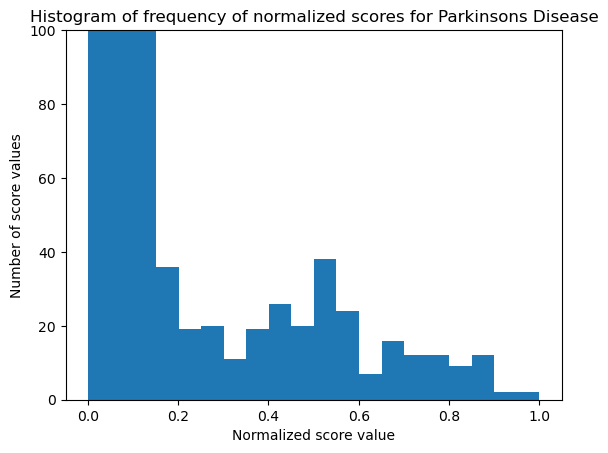

In [103]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.hist(norm_scores, bins=20)

plt.title('Histogram of frequency of normalized scores for Parkinsons Disease')
plt.ylabel('Number of score values')
plt.xlabel('Normalized score value')

plt.ylim(0,100)

From this plot we see that the majority of the norm scores are between ~0 and 0.2. This means that they have very little evidence because maybe the are few sources that have studied this target. 
We see that from 0.4 upwards there are some scores. We can consider that 0.5 in norm data is quite of reliable as  it is the half of the maximum score. 

In [104]:
norm_scores_05 = [i for i in norm_scores if i > 0.5]

print('Number of scores for PD that have a normalized score bigger than 0.5: ', len(norm_scores_05))

Number of scores for PD that have a normalized score bigger than 0.5:  134


In [105]:
scores_05 = []

for score_dicti in score_normscores_dict: # For each normalized value of PD score
    score_dicti_norm = score_normscores_dict[score_dicti] 
    
    if score_dicti_norm in norm_scores_05: # If this value is in the list of scores above 0.5
        scores_05.append(score_dicti) # Append to a list where there will be the interesting ones

In [106]:
len(scores_05)

101

In [107]:
scores_05_unique = list(set(scores_05))

print('Number of unique scores above 0.5 of their normalized value: ', len(scores_05_unique))

Number of unique scores above 0.5 of their normalized value:  101


In [108]:
PD_scorefilter = pd.DataFrame(columns = PD. columns. values) # We create new dataframe to append those targets with
                                                            # a normalized score bigger than 0.5

for i in scores_05_unique: 
    row_to_append = PD[PD['score'] == i]
    PD_scorefilter = pd.concat([PD_scorefilter,row_to_append])

In [109]:
print('Dataframe for Parkinsons Diease targets with a normalized score bigger than 0.5: ')
PD_scorefilter

Dataframe for Parkinsons Diease targets with a normalized score bigger than 0.5: 


,diseaseId,targetId,score,evidenceCount
3564,MONDO_0005180,ENSG00000014138,0.369580,1
3646,MONDO_0005180,ENSG00000062822,0.369580,1
3732,MONDO_0005180,ENSG00000077514,0.369580,1
3887,MONDO_0005180,ENSG00000100479,0.369580,1
3927,MONDO_0005180,ENSG00000101868,0.369580,1
...,...,...,...,...
4482,MONDO_0005180,ENSG00000126895,0.465931,8
5661,MONDO_0005180,ENSG00000184160,0.555687,11
6100,MONDO_0005180,ENSG00000274286,0.555687,10
3871,MONDO_0005180,ENSG00000100225,0.554090,133


In [110]:
PD_scorefilter_id_2 = PD_scorefilter['targetId'] # We get the target IDs

In [111]:
len(PD_scorefilter_id_2)

134

In [112]:
#PD_scorefilter_id = PD_scorefilter['targetId'] # We get the target IDs

In [113]:
uniprot_PD = []

for i in PD_scorefilter_id_2: 
    protein_ids = proteincoding_opentarget[proteincoding_opentarget['id'] == i]['proteinIds']
    for j in protein_ids: 
        for m in j:
            if m['source'] =='uniprot_swissprot': # We get the UniProt ID for the specific ENSG ID 
                uniprot = m['id']
                uniprot_PD.append(uniprot)
            if 'uniprot_swissprot' not in str(list(protein_ids)):
                print('These do not have a UniProt ID: ',i)

These do not have a UniProt ID:  ENSG00000263715
These do not have a UniProt ID:  ENSG00000272414
These do not have a UniProt ID:  ENSG00000272414
These do not have a UniProt ID:  ENSG00000272414
These do not have a UniProt ID:  ENSG00000272414
These do not have a UniProt ID:  ENSG00000272414
These do not have a UniProt ID:  ENSG00000272414
These do not have a UniProt ID:  ENSG00000272414


In [114]:
len(uniprot_PD) # Two do not have a uniprot_swissprot source

132

#### C. Intersection between Pharos-OpenTargets Targets and OpenTargets Associations: Druggable with SM activity - Parkinson Diseases

In [115]:
uniprot_druggable_PD = []

for i in Uniprot_SM_pocket_ligand: # We do the intersection between the targetable by druggable by Small Molecule activity 
    if i in uniprot_PD:  # and the targetable for Parkinsons Disease
        uniprot_druggable_PD.append(i) # The common ones, we append it to a list 
        

In [116]:
len(uniprot_druggable_PD)

85

In [117]:
Common_OpenTarget_IntersectionList = []

for i in uniprot_druggable_PD:
    for j in IntersectionList: 
        if i ==j: 
            Common_OpenTarget_IntersectionList.append(j)

In [118]:
print('Number of UniProts Druggable by SM and PD :',len(uniprot_druggable_PD))
print('Number of UniProts from the CNS protein list:',len(IntersectionList))
print('Number of UniProts from CNS and Targetable:',len(Common_OpenTarget_IntersectionList))

Number of UniProts Druggable by SM and PD : 85
Number of UniProts from the CNS protein list: 15318
Number of UniProts from CNS and Targetable: 77


#### D. Intersection between druggable with SM activity for PD and CNS protein list

##### Save list of CNS proteins that are targetable for SM for PD 

In [119]:
with open(path_dir[directory1]+"/OT_PD_druggable_SM_correct.txt", 'w') as fp:
    for item in Common_OpenTarget_IntersectionList:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


# ___________

#### 2.2. Membrane. Uniprot

##### - Step 1. Import data from UniProt

We import the list from Uniprot including Transmembrane and Intermembrane proteins

In [120]:
with gzip.open(path_dir[directory2]+'/stream') as f:

    Uniprot_Membrane= pd.read_csv(f,delimiter='\t')# Read the tsv. Tsv are limited by a t that's why it is called tsv.

In [121]:
Uniprot_Membrane.head()

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Intramembrane,Transmembrane
0,A0A0B4J2F0,reviewed,PIOS1_HUMAN,Protein PIGBOS1 (PIGB opposite strand protein 1),PIGBOS1,Homo sapiens (Human),54,NaN,"TRANSMEM 5..25; /note=""Helical""; /evidence=""EC..."
1,A0A0C5B5G6,reviewed,MOTSC_HUMAN,Mitochondrial-derived peptide MOTS-c (Mitochon...,MT-RNR1,Homo sapiens (Human),16,NaN,NaN
2,A0A0K2S4Q6,reviewed,CD3CH_HUMAN,Protein CD300H (CD300 antigen-like family memb...,CD300H,Homo sapiens (Human),201,NaN,"TRANSMEM 169..189; /note=""Helical""; /evidence=..."
3,A0A0U1RRE5,reviewed,NBDY_HUMAN,Negative regulator of P-body association (P-bo...,NBDY LINC01420,Homo sapiens (Human),68,NaN,NaN
4,A0A1B0GTW7,reviewed,CIROP_HUMAN,Ciliated left-right organizer metallopeptidase...,CIROP LMLN2,Homo sapiens (Human),788,NaN,"TRANSMEM 736..756; /note=""Helical""; /evidence=..."


In [122]:
my_file_intCNSOpt = open(path_dir[directory1]+"/OT_PD_druggable_SM_correct.txt", "r")

content_intCNSOpt = my_file_intCNSOpt.read()

IntersectionListOptarg = content_intCNSOpt.split("\n")

my_file_intCNSOpt.close()

##### - Step 2. Intersection between CNS target proteins and membrane proteins

In [123]:
Common_MembIntermemb_IntersectionList = []

for i in Uniprot_Membrane['Entry']: # For each code of Uniprot_Membrane (Uniprot codes with membrane domains)
    for j in IntersectionListOptarg: # For each code of IntersectionList (Uniprot code of CNS list)
        if i ==j: # If they are equal
            Common_MembIntermemb_IntersectionList.append(j)

In [124]:
print('Number of UniProts which are Membrane proteins:',len(Uniprot_Membrane))
print('Number of UniProts which are CNS Targetable proteins (with some filters):',len(IntersectionListOptarg))
print('Number of UniProts which are CNS Targetable Membrane proteins:',len(Common_MembIntermemb_IntersectionList))

Number of UniProts which are Membrane proteins: 16635
Number of UniProts which are CNS Targetable proteins (with some filters): 78
Number of UniProts which are CNS Targetable Membrane proteins: 75


##### - Step 3. Save the list for CNS target membrane proteins

In [125]:
with open(path_dir[directory2]+"/List_CNS_DruggablePD_Mem_Uniprot_correct.txt", 'w') as fp:
    for item in Common_MembIntermemb_IntersectionList:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


# ______

#### 2.3. Length sequence > 100 aa. Uniprot

##### - Step 1. Import data

In [126]:
my_file_memCNS = open(path_dir[directory2]+"/List_CNS_DruggablePD_Mem_Uniprot_correct.txt", "r")

content_memCNS = my_file_memCNS.read()

Membrane_CNS = content_memCNS.split("\n")

my_file_memCNS.close()

In [127]:
print('CNS Targetable Membrane proteins: ',len(Membrane_CNS)-1) # Because the last character of the list is an empty space


CNS Targetable Membrane proteins:  75


In [128]:
Membrane_CNS_UniProt_df = Uniprot_Membrane[Uniprot_Membrane['Entry'].isin(Membrane_CNS)]
Membrane_CNS_UniProt_df

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Intramembrane,Transmembrane
401,O14764,reviewed,GBRD_HUMAN,Gamma-aminobutyric acid receptor subunit delta...,GABRD,Homo sapiens (Human),452,NaN,"TRANSMEM 249..271; /note=""Helical""; /evidence=..."
606,O15399,reviewed,NMDE4_HUMAN,"Glutamate receptor ionotropic, NMDA 2D (GluN2D...",GRIN2D GluN2D NMDAR2D,Homo sapiens (Human),1336,"INTRAMEM 631..650; /note=""Discontinuously heli...","TRANSMEM 585..603; /note=""Helical""; /evidence=..."
1948,P04062,reviewed,GBA1_HUMAN,Lysosomal acid glucosylceramidase (Lysosomal a...,GBA1 GBA GC GLUC,Homo sapiens (Human),536,NaN,NaN
2082,P06241,reviewed,FYN_HUMAN,Tyrosine-protein kinase Fyn (EC 2.7.10.2) (Pro...,FYN,Homo sapiens (Human),537,NaN,NaN
2083,P06276,reviewed,CHLE_HUMAN,Cholinesterase (EC 3.1.1.8) (Acylcholine acylh...,BCHE CHE1,Homo sapiens (Human),602,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9157,Q8TCU5,reviewed,NMD3A_HUMAN,"Glutamate receptor ionotropic, NMDA 3A (GluN3A...",GRIN3A KIAA1973,Homo sapiens (Human),1115,NaN,"TRANSMEM 675..695; /note=""Helical""; /evidence=..."
10567,Q99250,reviewed,SCN2A_HUMAN,Sodium channel protein type 2 subunit alpha (H...,SCN2A NAC2 SCN2A1 SCN2A2,Homo sapiens (Human),2005,"INTRAMEM 370..394; /note=""Pore-forming""; /evid...","TRANSMEM 130..148; /note=""Helical; Name=S1 of ..."
12455,Q9NY46,reviewed,SCN3A_HUMAN,Sodium channel protein type 3 subunit alpha (S...,SCN3A KIAA1356 NAC3,Homo sapiens (Human),2000,"INTRAMEM 369..393; /note=""Pore-forming""; /evid...","TRANSMEM 129..147; /note=""Helical; Name=S1 of ..."
13264,Q9UN88,reviewed,GBRT_HUMAN,Gamma-aminobutyric acid receptor subunit theta...,GABRQ,Homo sapiens (Human),632,NaN,"TRANSMEM 269..289; /note=""Helical""; /evidence=..."


##### - Step 2. Cut-off length aa

In [129]:
# This is a list of the lengths of each protein
Length_aa = Membrane_CNS_UniProt_df['Length']

In [130]:
# We get useful information of the Length column in order to set a cut-off
Length_aa.describe()

count      75.000000
mean      779.693333
std       543.570428
min       169.000000
25%       459.000000
50%       512.000000
75%       900.000000
max      2339.000000
Name: Length, dtype: float64

We create a frequency table to know which intervals are more frequent and examine the structure of the protein and see if it has an interesting one (different chains, etc) or a simple one (one helix alpha...) so it is not that much interesting for studying its dynamics.

In [131]:
iw = (Length_aa.max()-Length_aa.min())/200


In [132]:
Abs_frecuency, intervals = np.histogram(Length_aa, bins = 100)


In [133]:
# Create dataframe
freq_table = pd.DataFrame(index = np.linspace(1,100,100), columns = ['start', 'end', 'class_marks','Frec_abs'])
# Assign the intervals
freq_table['start'] = intervals[:-1]
freq_table['end'] = intervals[1:]
# Calculate class marks
freq_table['class_marks'] = (freq_table['start'] + freq_table['end'])/2
# Assing Absolute frecuency
freq_table['Frec_abs'] = Abs_frecuency


In [134]:
freq_table

,start,end,class_marks,Frec_abs
1.0,169.0,190.7,179.85,1
2.0,190.7,212.4,201.55,0
3.0,212.4,234.1,223.25,0
4.0,234.1,255.8,244.95,0
5.0,255.8,277.5,266.65,1
...,...,...,...,...
96.0,2230.5,2252.2,2241.35,0
97.0,2252.2,2273.9,2263.05,0
98.0,2273.9,2295.6,2284.75,1
99.0,2295.6,2317.3,2306.45,0


In [135]:
filter_length = Membrane_CNS_UniProt_df

# ____

#### 2.4. With PDB structure 
 When we have already done filter of length aa of the membrane-intersection cns

##### - Step 1. Filter those proteins that have PDB structure

In [136]:
# We select the Uniprot codes ('Entry')
Uniprot_codes = filter_length['Entry'].to_list()

In [137]:
# We load the document proportionated by lab of P.Aloy
path_uniprot_pdb_file = str(input("Write path where you have downloaded the file uniprot_pdb: "))
uniprot = pd.read_csv(path_uniprot_pdb_file+'/uniprot_pdb.tsv',delimiter='\t')

Write path where you have downloaded the file uniprot_pdb: /home/imartinv/Escritorio/TFG/1.LIST_PROTEINS/Angelo_Alloy_Proteins


In [138]:
# We do a table of those Uniprot_codes that are found in the SP_PRIMARY column of the file uniprot_pdb
table_PDBs_CNS = uniprot[uniprot['SP_PRIMARY'].isin(Uniprot_codes)]

In [139]:
# We create the columns of the table
table_PDBs_CNS.columns=['Uniprot','PDB']

In [140]:
# We add the values
table_PDBs_CNS['gene_name']=[filter_length[filter_length['Entry']==x]['Gene Names'].to_list()[0] for x in table_PDBs_CNS['Uniprot'].to_list()]

/tmp/ipykernel_10031/1000095070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_PDBs_CNS['gene_name']=[filter_length[filter_length['Entry']==x]['Gene Names'].to_list()[0] for x in table_PDBs_CNS['Uniprot'].to_list()]


In [141]:
# This is the final table where we have all the PDBs codes for each Uniprot belonging to CNS, membrane and length > 100 aa
table_PDBs_CNS

,Uniprot,PDB,gene_name
15784,O14764,7qn7;7qn8;7qn6;7qn5;7qn9;7qnc;7qnd,GABRD
20086,P04062,3rik;2v3e;5lvx;6ytp;6t13;6z39;6z3i;2xwd;3gxm;3...,GBA1 GBA GC GLUC
20587,P06241,5zau;3h0i;4eik;7a2x;7a2w;7a2l;7a2k;1m27;1avz;7...,FYN
20591,P06276,2y1k;6t9s;6r6v;6i0b;2wig;2xmg;6ep4;5dyt;4tpk;2...,BCHE CHE1
20909,P07550,2r4r;7bz2;6prz;6ps6;4gbr;3nya;5d6l;5x7d;2r4s;6...,ADRB2 ADRB2R B2AR
21077,P08172,4mqt;6oik;5zk3;4mqs;5yc8;5zk8;5zkb;3uon;5zkc;6u1n,CHRM2
21182,P08588,7bu7;7bu6;7bvq;7bts;2lsq,ADRB1 ADRB1R B1AR
21250,P08908,7e2x;7e2y;7e2z,HTR1A ADRB2RL1 ADRBRL1
21253,P08913,1hod;7ejk;6kuy;6kux;7ej0;1hof;1ho9;6k42;7ej8;1...,ADRA2A ADRA2R ADRAR
21429,P09884,1k0p;4qcl;1n5g;4q5v;7n2m;7u5c;8d0k;8d0b;1k18;6...,POLA1 POLA


In [142]:
print('We have: ',len(filter_length),' CNS Targetable Membrane proteins\nWe have: ',len(table_PDBs_CNS),' proteins with PDB structure')

We have:  75  CNS Targetable Membrane proteins
We have:  55  proteins with PDB structure


In [143]:
# We now extract all the PDBs codes that we have: 

PDBs_CNS_possibleduplicates = [] # There may be some duplicates.
table_PDB = list(table_PDBs_CNS['PDB']) 

for i in table_PDB: 
    if ';' in i: 
        for item in i.split(";"):# We split those values that are in the same row.
            PDBs_CNS_possibleduplicates.append(item)      
    else: 
        PDBs_CNS_possibleduplicates.append(i) #If there are not values in the same row, then we append it as it is.

In [144]:
# We now get rid of the duplicates

PDBs_CNS = []

for item in PDBs_CNS_possibleduplicates:
    if item not in PDBs_CNS:
        PDBs_CNS.append(item)

In [145]:
print('Number of PDBs that are from the CNS, Targets, Membrane,length>100, possible dupli:  ',len(PDBs_CNS_possibleduplicates),'PDBs')
print('Number of PDBs that are from the CNS, Targets, Membrane:  ',len(PDBs_CNS),'PDBs')

Number of PDBs that are from the CNS, Targets, Membrane,length>100, possible dupli:   843 PDBs
Number of PDBs that are from the CNS, Targets, Membrane:   765 PDBs


In [146]:
# Length of the table
print('Total number of proteins from CNS, Targets, Membrane, length>100, PDB structure, possidupli:',len(table_PDBs_CNS), 'proteins')
print('Number of PDBs that are from the CNS, Targets, Membrane, length>100, possible dupli:  ',len(PDBs_CNS_possibleduplicates),'PDBs')
print('Total number of PDBs from CNS, Targets, Membrane, >100 aa proteins, without dupli: ', len(PDBs_CNS), 'PDBs')

Total number of proteins from CNS, Targets, Membrane, length>100, PDB structure, possidupli: 55 proteins
Number of PDBs that are from the CNS, Targets, Membrane, length>100, possible dupli:   843 PDBs
Total number of PDBs from CNS, Targets, Membrane, >100 aa proteins, without dupli:  765 PDBs


In [147]:
table_PDBs_CNS.to_csv(path_dir[directory4]+'/List_CNS_DruggablePD_Mem_100aa_PDB_Uniprot_correct.csv')


#### 2.4.1. Information about PDB structure

##### Split PDBs and make a table of keys: Uniprot and PDB

In [148]:
table_PDBs_CNS

,Uniprot,PDB,gene_name
15784,O14764,7qn7;7qn8;7qn6;7qn5;7qn9;7qnc;7qnd,GABRD
20086,P04062,3rik;2v3e;5lvx;6ytp;6t13;6z39;6z3i;2xwd;3gxm;3...,GBA1 GBA GC GLUC
20587,P06241,5zau;3h0i;4eik;7a2x;7a2w;7a2l;7a2k;1m27;1avz;7...,FYN
20591,P06276,2y1k;6t9s;6r6v;6i0b;2wig;2xmg;6ep4;5dyt;4tpk;2...,BCHE CHE1
20909,P07550,2r4r;7bz2;6prz;6ps6;4gbr;3nya;5d6l;5x7d;2r4s;6...,ADRB2 ADRB2R B2AR
21077,P08172,4mqt;6oik;5zk3;4mqs;5yc8;5zk8;5zkb;3uon;5zkc;6u1n,CHRM2
21182,P08588,7bu7;7bu6;7bvq;7bts;2lsq,ADRB1 ADRB1R B1AR
21250,P08908,7e2x;7e2y;7e2z,HTR1A ADRB2RL1 ADRBRL1
21253,P08913,1hod;7ejk;6kuy;6kux;7ej0;1hof;1ho9;6k42;7ej8;1...,ADRA2A ADRA2R ADRAR
21429,P09884,1k0p;4qcl;1n5g;4q5v;7n2m;7u5c;8d0k;8d0b;1k18;6...,POLA1 POLA


In [149]:
Uniprot_id_dict = [] # We create a list of the multiple Uniprot for each PDB that exists

for PDB_id in list(table_PDBs_CNS['PDB']): # For each PDB (can be multiple PDBs)
    count_char = PDB_id.count(';')+1 # We count how many PDBs are in that string, the codes are split with ;
    
    idx = table_PDBs_CNS[table_PDBs_CNS['PDB'] == PDB_id].index.tolist() # We calculate the index of that PDB
    
    if PDB_id ==  list(table_PDBs_CNS.loc[idx[0]])[1]: # If the PDB string is equal to the value of PDBs in the row of the index
        Unid_multiple = (table_PDBs_CNS.loc[idx[0]][0],)*count_char # Then we multiply the id of Uniprot the number of times of PDB codes in that string
        Uniprot_id_dict.append(Unid_multiple) # We save the value in the list

In [150]:
Uniprot_id_dict_nottuple = []

for Uniprot_id_dict_tuple in Uniprot_id_dict: 
    for Uniprot_id_indi in Uniprot_id_dict_tuple: 
        Uniprot_id_dict_nottuple.append(Uniprot_id_indi)
    

In [151]:
genename_dict = [] # We create a list of the multiple genename for each PDB that exists

for PDB_id in list(table_PDBs_CNS['PDB']): # For each PDB (can be multiple PDBs)
    count_char = PDB_id.count(';')+1 # We count how many PDBs are in that string, the codes are split with ;
    
    idx = table_PDBs_CNS[table_PDBs_CNS['PDB'] == PDB_id].index.tolist() # We calculate the index of that PDB
    
    if PDB_id ==  list(table_PDBs_CNS.loc[idx[0]])[1]: # If the PDB string is equal to the value of PDBs in the row of the index
        genename_multiple = (table_PDBs_CNS.loc[idx[0]][2],)*count_char # Then we multiply the id of genename the number of times of PDB codes in that string
        genename_dict.append(genename_multiple) # We save the value in the list
        

In [152]:
genename_dict_nottuple = []

for genename_dict_tuple in genename_dict: 
    for genename_indi in genename_dict_tuple: 
        genename_dict_nottuple.append(genename_indi)
    

In [153]:
len(Uniprot_id_dict_nottuple),len(PDBs_CNS_possibleduplicates),len(genename_dict_nottuple)

(843, 843, 843)

In [154]:
d = {'Uniprot':Uniprot_id_dict_nottuple,'PDB':PDBs_CNS_possibleduplicates,'gene_name':genename_dict_nottuple}
table_PDBs = pd.DataFrame.from_dict(d)

In [155]:
table_PDBs

,Uniprot,PDB,gene_name
0,O14764,7qn7,GABRD
1,O14764,7qn8,GABRD
2,O14764,7qn6,GABRD
3,O14764,7qn5,GABRD
4,O14764,7qn9,GABRD
...,...,...,...
838,Q99250,4jpz,SCN2A NAC2 SCN2A1 SCN2A2
839,Q99250,4rly,SCN2A NAC2 SCN2A1 SCN2A2
840,Q99250,6j8e,SCN2A NAC2 SCN2A1 SCN2A2
841,Q9NY46,7w77,SCN3A KIAA1356 NAC3


In [156]:
len(table_PDBs['PDB'].unique())

765

##### API to get more info

To get the information about the **experimental method** of each PDB. 

In [157]:
import json
import urllib.request
from typing import List

# Given a pdb Id, get its Experimental Obtaining Method

def pdb_info_exp (pdb_id : str) -> List[str]:
    # Request the MMB service to retrieve pdb data
    request_url = 'https://mmb.irbbarcelona.org/api/pdb/' + pdb_id + '/entry'
    try:
        with urllib.request.urlopen(request_url) as response:
            parsed_response = json.loads(response.read().decode("utf-8"))
    # If the accession is not found in the PDB then we can stop here
    except urllib.error.HTTPError as error:
        if error.code == 404:
            return None
        else:
            raise ValueError('Something went wrong with the PDB request: ' + request_url)
    # Get the uniprot accessions
    pdb_expType = parsed_response['expType'] # We get the Experimental Method
    
    return pdb_expType

To get the information about the **experimental resolution** of each PDB. 

In [158]:
import json
import urllib.request
from typing import List

# Given a pdb Id, get its method resolution

def pdb_info_resol (pdb_id : str) -> List[str]:
    # Request the MMB service to retrieve pdb data
    request_url = 'https://mmb.irbbarcelona.org/api/pdb/' + pdb_id + '/entry'
    try:
        with urllib.request.urlopen(request_url) as response:
            parsed_response = json.loads(response.read().decode("utf-8"))
    # If the accession is not found in the PDB then we can stop here
    except urllib.error.HTTPError as error:
        if error.code == 404:
            return None
        else:
            raise ValueError('Something went wrong with the PDB request: ' + request_url)
    # Get the uniprot accessions
    pdb_resol= parsed_response['resol'] # We get the resolution 
    return pdb_resol

To get the information about the **information about chains: type, sequence, fragments** of each PDB. 

In [159]:
import json
import urllib.request
from typing import List

# Given a pdb Id, gets information of each of its chains. 

def pdb_info_chains (pdb_id : str) -> List[str]:
    # Request the MMB service to retrieve pdb data
    request_url = 'https://mmb.irbbarcelona.org/api/pdb/' + pdb_id + '/entry'
    try:
        with urllib.request.urlopen(request_url) as response:
            parsed_response = json.loads(response.read().decode("utf-8"))
    # If the accession is not found in the PDB then we can stop here
    except urllib.error.HTTPError as error:
        if error.code == 404:
            return None
        else:
            raise ValueError('Something went wrong with the PDB request: ' + request_url)
    
    # Get the uniprot accessions
    if parsed_response['chainIds'] != None: # If there are ChainIds: 
        
        chains = [ chain[-1] for chain in parsed_response['chainIds'] ] 
        # We only stay with the last letter of the chain because it indicates the chain type
        

        id_chains = [ chain['_id'] for chain in parsed_response['chains'] ]
        # We get all the id of the chain 
        
        sequence_uniprot = [ chain['sequence'] for chain in parsed_response['chains']]
        # We get the sequence of Uniprot of each chaine if each PDB has different chains. 
        
        
        # To get the fragments we do not do a compressed loop: 
        fragments_all = [] # We create a list to put all the fragments of all chains here
        
        
        for chain in parsed_response['chains']: # We get the fragments of each chain
            if chain['PDBSequence'] != None: # as long as the PDBSequence exists because if not, we would not have fragments
                fragments = chain['PDBSequence']['fragments'] 
                fragments_all.append(fragments)

                
                
        # We want a dictionary with: being the key the chain type ['A'], and the values all the information of
        #this chain for this PDB ex. sequence['AGJEROW'], fragments ['1-22, 133-159']. 
        lista_dicti = []
        
        
        for idx in (range(len(chains))):
            if chain['PDBSequence'] != None: # as long as it exists a PDBSequence
                print(id_chains[idx])
                dicti = {chains[idx]:[sequence_uniprot[idx],fragments_all[idx]]}
                lista_dicti.append(dicti)

        return lista_dicti
    
    else:
        return None


To get the information about the **Chain ID (type)** of each PDB. 

In [160]:
import json
import urllib.request
from typing import List

# Given a pdb Id, get its identifiers chains: 

def pdb_chains (pdb_id : str) -> List[str]:
    # Request the MMB service to retrieve pdb data
    request_url = 'https://mmb.irbbarcelona.org/api/pdb/' + pdb_id + '/entry'
    try:
        with urllib.request.urlopen(request_url) as response:
            parsed_response = json.loads(response.read().decode("utf-8"))
    # If the accession is not found in the PDB then we can stop here
    except urllib.error.HTTPError as error:
        if error.code == 404:
            return None
        else:
            raise ValueError('Something went wrong with the PDB request: ' + request_url)
    
    # Get the uniprot accessions
    if parsed_response['chainIds'] != None: 
        
        chains = [ chain[-1] for chain in parsed_response['chainIds'] ]
        #Here we only get the last letter of the chain id because faster than mining the previous dictionary. 

        return chains
    
    else:
        return None


We run each function. 

In [161]:
pdb_info_exp_list = []

for PDB_id in table_PDBs['PDB']: 
    if PDB_id not in pdb_info_exp_list:
        pdb_info_api = pdb_info_exp(PDB_id)
        print(pdb_info_api)
        pdb_info_exp_list.append(pdb_info_api)

ELECTRON MICROSCOPY
ELECTRON MICROSCOPY
ELECTRON MICROSCOPY
ELECTRON MICROSCOPY
ELECTRON MICROSCOPY
ELECTRON MICROSCOPY
ELECTRON MICROSCOPY
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
SOLUTION NMR
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X

X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFFRACTION
X-RAY DIFF

In [162]:
pdb_info_resol_list = []

for PDB_id in table_PDBs['PDB']:
    if PDB_id not in pdb_info_resol_list:
        pdb_info_resol_api = pdb_info_resol(PDB_id)
        print(pdb_info_resol_api)
        pdb_info_resol_list.append(pdb_info_resol_api)

3
3.1
2.9
2.5
2.9
2.9
3.4
2.48
2
2.2
1.7
1.85
1.7
1.8
2.66
2.2
2.4
1.63
2.3
0.98
1.95
2
2.15
1.59
1.41
1.8
2.4
2.7
1.79
1.81
1.96
2.11
2.53
1.76
1.7
2.8
2.7
2.9
1.86
2.1
2.8
2.5
1.56
1.92
2.5
2.31
2.3
2.4
1.84
N.A.
2.2
1.6
0.92
0.99
1.9
1.5
2.5
3
0.94
1.22
1.85
1.9
N.A.
1.5
2.5
1.4
0.9
1.58
N.A.
1.34
2.6
1.4
2.61
N.A.
N.A.
1.05
1.7
1.76
1.99
1.02
N.A.
1.5
2.52
0.97
N.A.
N.A.
1.5
N.A.
1.81
1.14
N.A.
N.A.
2.3
2.8
1.4
0.94
2.1
2.5
2.7
2.5
2.38
2.15
2.7
2.3
2.55
2.7
2.4
2.3
2.98
1.85
2.35
2.67
2.6
2.3
2.25
2.3
2.5
2.7
2.5
2.31
2.1
3.1
2.1
2.6
2.8
2.4
2.2
2.1
2
2.47
2.6
2.35
2.25
2.1
2.4
2.98
2.3
2.43
2.75
2.7
2.77
2.49
2.8
2.5
2.4
2.4
2.4
2.5
2.49
2.25
2.1
2.3
2.1
2.8
2.75
2.7
2
1.9
2.5
5.7
2.52
2.1
2.2
2.48
2.7
2.38
2.4
2
2.94
2.6
2.5
2.65
2.3
2.1
3.4
3.82
2.8
2.7
3.99
3.16
3.2
2.7
3.4
2.6
3.7
3.1
2.9
3.2
2.4
3.3
3.2
2.96
2.84
3.4
3.8
3.5
2.79
3.5
N.A.
3.26
2.5
3.1
3.2
3.8
2.48
2.84
2.8
2.4
3.2
3.2
3.8
3.4
3.7
3.6
2.6
3.5
2.5
3
2.95
3
2.3
4
2.6
2.7
2.5
3.13
N.A.
3
3
3.1
N.A.
3.4
3.2
2.7
3

In [163]:
pdb_info_chains_list = []

for PDB_id in table_PDBs['PDB']: 
    pdb_info_chain_api = pdb_info_chains(PDB_id)
    print(pdb_info_chain_api)
    pdb_info_chains_list.append(pdb_info_chain_api)

[]
[]
[]
[]
[]
[]
[]
3RIK_A
3RIK_B
3RIK_C
3RIK_D
[{'A': ['ARPCIPKSFGYSSVVCVCNATYCDSFDPPTFPALGTFSRYESTRSGRRMELSMGPIQANHTGTGLLLTLQPEQKFQKVKGFGGAMTDAAALNILALSPPAQNLLLKSYFSEEGIGYNIIRVPMASCDFSIRTYTYADTPDDFQLHNFSLPEEDTKLKIPLIHRALQLAQRPVSLLASPWTSPTWLKTNGAVNGKGSLKGQPGDIYHQTWARYFVKFLDAYAEHKLQFWAVTAENEPSAGLLSGYPFQCLGFTPEHQRDFIARDLGPTLANSTHHNVRLLMLDDQRLLLPHWAKVVLTDPEAAKYVHGIAVHWYLDFLAPAKATLGETHRLFPNTMLFASEACVGSKFWEQSVRLGSWDRGMQYSHSIITNLLYHVVGWTDWNLALNPEGGPNWVRNFVDSPIIVDITKDTFYKQPMFYHLGHFSKFIPEGSQRVGLVASQKNDLDAVALMHPDGSAVVVVLNRSSKDVPLTIKDPAVGFLETISPGYSIHTYLWHRQ', ['1-497']]}, {'B': ['ARPCIPKSFGYSSVVCVCNATYCDSFDPPTFPALGTFSRYESTRSGRRMELSMGPIQANHTGTGLLLTLQPEQKFQKVKGFGGAMTDAAALNILALSPPAQNLLLKSYFSEEGIGYNIIRVPMASCDFSIRTYTYADTPDDFQLHNFSLPEEDTKLKIPLIHRALQLAQRPVSLLASPWTSPTWLKTNGAVNGKGSLKGQPGDIYHQTWARYFVKFLDAYAEHKLQFWAVTAENEPSAGLLSGYPFQCLGFTPEHQRDFIARDLGPTLANSTHHNVRLLMLDDQRLLLPHWAKVVLTDPEAAKYVHGIAVHWYLDFLAPAKATLGETHRLFPNTMLFASEACVGSKFWEQSVRLGSWDRGMQYSHSIITNLLYHVVGWTDWNLALNPEGGPNWVRNFVDSPIIVDITKDTFYKQPMFYHLG

6Z39_AAA
6Z39_BBB
[{'A': ['ARPCIPKSFGYSSVVCVCNATYCDSFDPPTFPALGTFSRYESTRSGRRMELSMGPIQANHTGTGLLLTLQPEQKFQKVKGFGGAMTDAAALNILALSPPAQNLLLKSYFSEEGIGYNIIRVPMASCDFSIRTYTYADTPDDFQLHNFSLPEEDTKLKIPLIHRALQLAQRPVSLLASPWTSPTWLKTNGAVNGKGSLKGQPGDIYHQTWARYFVKFLDAYAEHKLQFWAVTAENEPSAGLLSGYPFQCLGFTPEHQRDFIARDLGPTLANSTHHNVRLLMLDDQRLLLPHWAKVVLTDPEAAKYVHGIAVHWYLDFLAPAKATLGETHRLFPNTMLFASEACVGSKFWEQSVRLGSWDRGMQYSHSIITNLLYHVVGWTDWNLALNPEGGPNWVRNFVDSPIIVDITKDTFYKQPMFYHLGHFSKFIPEGSQRVGLVASQKNDLDAVALMHPDGSAVVVVLNRSSKDVPLTIKDPAVGFLETISPGYSIHTYLWHRQ', ['1-497']]}, {'B': ['ARPCIPKSFGYSSVVCVCNATYCDSFDPPTFPALGTFSRYESTRSGRRMELSMGPIQANHTGTGLLLTLQPEQKFQKVKGFGGAMTDAAALNILALSPPAQNLLLKSYFSEEGIGYNIIRVPMASCDFSIRTYTYADTPDDFQLHNFSLPEEDTKLKIPLIHRALQLAQRPVSLLASPWTSPTWLKTNGAVNGKGSLKGQPGDIYHQTWARYFVKFLDAYAEHKLQFWAVTAENEPSAGLLSGYPFQCLGFTPEHQRDFIARDLGPTLANSTHHNVRLLMLDDQRLLLPHWAKVVLTDPEAAKYVHGIAVHWYLDFLAPAKATLGETHRLFPNTMLFASEACVGSKFWEQSVRLGSWDRGMQYSHSIITNLLYHVVGWTDWNLALNPEGGPNWVRNFVDSPIIVDITKDTFYKQPMFYHLGHFSKFIPEGSQRVGLVASQKNDLDAVALMHP

1OGS_A
1OGS_B
[{'A': ['ARPCIPKSFGYSSVVCVCNATYCDSFDPPTFPALGTFSRYESTRSGRRMELSMGPIQANHTGTGLLLTLQPEQKFQKVKGFGGAMTDAAALNILALSPPAQNLLLKSYFSEEGIGYNIIRVPMASCDFSIRTYTYADTPDDFQLHNFSLPEEDTKLKIPLIHRALQLAQRPVSLLASPWTSPTWLKTNGAVNGKGSLKGQPGDIYHQTWARYFVKFLDAYAEHKLQFWAVTAENEPSAGLLSGYPFQCLGFTPEHQRDFIARDLGPTLANSTHHNVRLLMLDDQRLLLPHWAKVVLTDPEAAKYVHGIAVHWYLDFLAPAKATLGETHRLFPNTMLFASEACVGSKFWEQSVRLGSWDRGMQYSHSIITNLLYHVVGWTDWNLALNPEGGPNWVRNFVDSPIIVDITKDTFYKQPMFYHLGHFSKFIPEGSQRVGLVASQKNDLDAVALMHPDGSAVVVVLNRSSKDVPLTIKDPAVGFLETISPGYSIHTYLWHRQ', ['1-497']]}, {'B': ['ARPCIPKSFGYSSVVCVCNATYCDSFDPPTFPALGTFSRYESTRSGRRMELSMGPIQANHTGTGLLLTLQPEQKFQKVKGFGGAMTDAAALNILALSPPAQNLLLKSYFSEEGIGYNIIRVPMASCDFSIRTYTYADTPDDFQLHNFSLPEEDTKLKIPLIHRALQLAQRPVSLLASPWTSPTWLKTNGAVNGKGSLKGQPGDIYHQTWARYFVKFLDAYAEHKLQFWAVTAENEPSAGLLSGYPFQCLGFTPEHQRDFIARDLGPTLANSTHHNVRLLMLDDQRLLLPHWAKVVLTDPEAAKYVHGIAVHWYLDFLAPAKATLGETHRLFPNTMLFASEACVGSKFWEQSVRLGSWDRGMQYSHSIITNLLYHVVGWTDWNLALNPEGGPNWVRNFVDSPIIVDITKDTFYKQPMFYHLGHFSKFIPEGSQRVGLVASQKNDLDAVALMHPDGSA

2NSX_A
2NSX_B
2NSX_C
2NSX_D
[{'A': ['ARPCIPKSFGYSSVVCVCNATYCDSFDPPTFPALGTFSRYESTRSGRRMELSMGPIQANHTGTGLLLTLQPEQKFQKVKGFGGAMTDAAALNILALSPPAQNLLLKSYFSEEGIGYNIIRVPMASCDFSIRTYTYADTPDDFQLHNFSLPEEDTKLKIPLIHRALQLAQRPVSLLASPWTSPTWLKTNGAVNGKGSLKGQPGDIYHQTWARYFVKFLDAYAEHKLQFWAVTAENEPSAGLLSGYPFQCLGFTPEHQRDFIARDLGPTLANSTHHNVRLLMLDDQRLLLPHWAKVVLTDPEAAKYVHGIAVHWYLDFLAPAKATLGETHRLFPNTMLFASEACVGSKFWEQSVRLGSWDRGMQYSHSIITNLLYHVVGWTDWNLALNPEGGPNWVRNFVDSPIIVDITKDTFYKQPMFYHLGHFSKFIPEGSQRVGLVASQKNDLDAVALMHPDGSAVVVVLNRSSKDVPLTIKDPAVGFLETISPGYSIHTYLWHRQ', ['1-497']]}, {'B': ['ARPCIPKSFGYSSVVCVCNATYCDSFDPPTFPALGTFSRYESTRSGRRMELSMGPIQANHTGTGLLLTLQPEQKFQKVKGFGGAMTDAAALNILALSPPAQNLLLKSYFSEEGIGYNIIRVPMASCDFSIRTYTYADTPDDFQLHNFSLPEEDTKLKIPLIHRALQLAQRPVSLLASPWTSPTWLKTNGAVNGKGSLKGQPGDIYHQTWARYFVKFLDAYAEHKLQFWAVTAENEPSAGLLSGYPFQCLGFTPEHQRDFIARDLGPTLANSTHHNVRLLMLDDQRLLLPHWAKVVLTDPEAAKYVHGIAVHWYLDFLAPAKATLGETHRLFPNTMLFASEACVGSKFWEQSVRLGSWDRGMQYSHSIITNLLYHVVGWTDWNLALNPEGGPNWVRNFVDSPIIVDITKDTFYKQPMFYHLGHFSKFIPEGSQRVGLVASQKN

2F61_A
2F61_B
[{'A': ['ARPCIPKSFGYSSVVCVCNATYCDSFDPPTFPALGTFSRYESTRSGRRMELSMGPIQANHTGTGLLLTLQPEQKFQKVKGFGGAMTDAAALNILALSPPAQNLLLKSYFSEEGIGYNIIRVPMASCDFSIRTYTYADTPDDFQLHNFSLPEEDTKLKIPLIHRALQLAQRPVSLLASPWTSPTWLKTNGAVNGKGSLKGQPGDIYHQTWARYFVKFLDAYAEHKLQFWAVTAENEPSAGLLSGYPFQCLGFTPEHQRDFIARDLGPTLANSTHHNVRLLMLDDQRLLLPHWAKVVLTDPEAAKYVHGIAVHWYLDFLAPAKATLGETHRLFPNTMLFASEACVGSKFWEQSVRLGSWDRGMQYSHSIITNLLYHVVGWTDWNLALNPEGGPNWVRNFVDSPIIVDITKDTFYKQPMFYHLGHFSKFIPEGSQRVGLVASQKNDLDAVALMHPDGSAVVVVLNRSSKDVPLTIKDPAVGFLETISPGYSIHTYLWHRQ', ['1-497']]}, {'B': ['ARPCIPKSFGYSSVVCVCNATYCDSFDPPTFPALGTFSRYESTRSGRRMELSMGPIQANHTGTGLLLTLQPEQKFQKVKGFGGAMTDAAALNILALSPPAQNLLLKSYFSEEGIGYNIIRVPMASCDFSIRTYTYADTPDDFQLHNFSLPEEDTKLKIPLIHRALQLAQRPVSLLASPWTSPTWLKTNGAVNGKGSLKGQPGDIYHQTWARYFVKFLDAYAEHKLQFWAVTAENEPSAGLLSGYPFQCLGFTPEHQRDFIARDLGPTLANSTHHNVRLLMLDDQRLLLPHWAKVVLTDPEAAKYVHGIAVHWYLDFLAPAKATLGETHRLFPNTMLFASEACVGSKFWEQSVRLGSWDRGMQYSHSIITNLLYHVVGWTDWNLALNPEGGPNWVRNFVDSPIIVDITKDTFYKQPMFYHLGHFSKFIPEGSQRVGLVASQKNDLDAVALMHPDGSA

4EIK_A
4EIK_B
[{'A': ['MGTGVTLFVALYDYEARTEDDLSFHKGEKFQILNSSEGDWWEARSLTTGETGYIPSNYVAPVDS', ['84-141']]}, {'B': ['VSLARRPLPPLP', ['2-12']]}]
[]
[]
[]
[]
1M27_A
1M27_C
1M27_B
[{'A': ['MDAVAVYHGKISRETGEKLLLATGLDGSYLLRDSESVPGVYCLCVLYHGYIYTYRVSQTETGSWSAETAPGVHKRYFRKIKNLISAFQKPDQGIVIPLQYPVEK', ['1-104']]}, {'C': ['VTLFVALYDYEARTEDDLSFHKGEKFQILNSSEGDWWEARSLTTGETGYIPSNYVAPVDSI', ['84-144']]}, {'B': ['KSLTIYAQVQK', ['276-286']]}]
1AVZ_A
1AVZ_B
1AVZ_C
[{'A': ['GSLEAQEEEEVGFPVTPQVPLRPMTYKAAVDLSHFLKEKGGLEGLIHSQRRQDILDLWIYHTQGYFPDWQNYTPGPGVRYPLTFGWCYKLVPVEPDKVEEANKGENTSLLHPVSLHGMDDPEREVLEWRFDSRLAFHHVARELHPEYFKNC', ['74-148', '179-203']]}, {'B': ['GSLEAQEEEEVGFPVTPQVPLRPMTYKAAVDLSHFLKEKGGLEGLIHSQRRQDILDLWIYHTQGYFPDWQNYTPGPGVRYPLTFGWCYKLVPVEPDKVEEANKGENTSLLHPVSLHGMDDPEREVLEWRFDSRLAFHHVARELHPEYFKNC', ['71-148', '179-203']]}, {'C': ['TLFVALYDYEARTEDDLSFHKGEKFQILNSSEGDWWEARSLTTGETGYIPSNYVAPV', ['85-141']]}]
[]
[]
3UA6_A
3UA6_B
[{'A': ['MGTGVTLFVALYDYEARTEDDLSFHKGEKFQILNSSEGDWWEARSLTTGETGYIPSNYVAPVDS', ['

2WIG_A
[{'A': ['EDDIIIATKNGKVRGMQLTVFGGTVTAFLGIPYAQPPLGRLRFKKPQSLTKWTDIWNATKYANSCCQNIDQSFPGFHGSEMWNPNTDLSEDCLYLNVWIPAPKPKNATVLIWIYGGGFQTGTSSLHVYDGKFLARVERVIVVSMNYRVGALGFLALPGNPEAPGNMGLFDQQLALQWVQKNIAAFGGNPKSVTLFGESAGAASVSLHLLSPGSHSLFTRAILQSGSFNAPWAVTSLYEARNRTLNLAKLTGCSRENETEIIKCLRNKDPQEILLNEAFVVPYGTPLSVNFGPTVDGDFLTDMPDILLELGQFKKTQILVGVNKDEGTAFLVYGAPGFSKDNNSIITRKEFQEGLKIFFPGVSEFGKESILFHYTDWVDDQRPENYREALGDVVGDYNFICPALEFTKKFSEWGNNAFFYYFEHRSSKLPWPEWMGVMHGYEIEFVFGLPLERRDQYTKAEEILSRSIVKRWANFAKYGNPQETQNNSTSWPVFKSTEQKYLTLNTESTRIMTKLRAQQCRFWTSFFPKV', ['3-527', '529-529']]}]
2XMG_A
[{'A': ['EDDIIIATKNGKVRGMQLTVFGGTVTAFLGIPYAQPPLGRLRFKKPQSLTKWSDIWNATKYANSCCQNIDQSFPGFHGSEMWNPNTDLSEDCLYLNVWIPAPKPKNATVLIWIYGGHFQTGTSSLHVYDGKFLARVERVIVVSMNYRVGALGFLALPGNPEAPGNMGLFDQQLALQWVQKNIAAFGGNPKSVTLFGESAGAASVSLHLLSPGSHSLFTRAILQSGSFNAPWAVTSLYEARNRTLNLAKLTGCSRENETEIIKCLRNKDPQEILLNEAFVVPYGTPLSVNFGPTVDGDFLTDMPDILLELGQFKKTQILVGVNKDEGTAFLVYGAPGFSKDNNSIITRKEFQEGLKIFFPGVSEFGKESILFHYTDWVDDQRPENYREALGDVVGDYNFICPALEFTKKFSEW

[]
6SAM_A
[{'A': ['EDDIIIATKNGKVRGMQLTVFGGTVTAFLGIPYAQPPLGRLRFKKPQSLTKWSDIWNATKYANSCCQNIDQSFPGFHGSEMWNPNTDLSEDCLYLNVWIPAPKPKNATVLIWIYGGGFQTGTSSLHVYDGKFLARVERVIVVSMNYRVGALGFLALPGNPEAPGNMGLFDQQLALQWVQKNIAAFGGNPKSVTLFGESAGAASVSLHLLSPGSHSLFTRAILQSGSFNAPWAVTSLYEARNRTLNLAKLTGCSRENETEIIKCLRNKDPQEILLNEAFVVPYGTPLSVNFGPTVDGDFLTDMPDILLELGQFKKTQILVGVNKDEGTAFLVYGAPGFSKDNNSIITRKEFQEGLKIFFPGVSEFGKESILFHYTDWVDDQRPENYREALGDVVGDYNFICPALEFTKKFSEWGNNAFFYYFEHRSSKLPWPEWMGVMHGYEIEFVFGLPLERRDQYTKAEEILSRSIVKRWANFAKYGNPQETQNQSTSWPVFKSTEQKYLTLNTESTRIMTKLRAQQCRFWTSFFPKV', ['4-529']]}]
6EZ2_A
6EZ2_B
[{'A': ['DIIIATKNGKVRGMNLTVFGGTVTAFLGIPYAQPPLGRLRFKKPQSLTKWSDIWNATKYANSCCQNIDQSFPGFHGSEMWNPNTDLSEDCLYLNVWIPAPKPKNATVLIWIYGGGFQTGTSSLHVYDGKFLARVERVIVVSMNYRVGALGFLALPGNPEAPGNMGLFDQQLALQWVQKNIAAFGGNPKSVTLFGESAGAASVSLHLLSPGSHSLFTRAILQSGSFNAPWAVTSLYEARNRTLNLAKLTGCSRENETEIIKCLRNKDPQEILLNEAFVVPYGTPLSVNFGPTVDGDFLTDMPDILLELGQFKKTQILVGVNKDEGTAFLVYGAPGFSKDNNSIITRKEFQEGLKIFFPGVSEFGKESILFHYTDWVDDQRPENYREALGDVVGDYNFICPALEFTKKFSEWGNN

6R6W_A
[{'A': ['IIIATKNGKVRGMQLTVFGGTVTAFLGIPYAQPPLGRLRFKKPQSLTKWSDIWNATKYANSCCQNIDQSFPGFHGSEMWNPNTDLSEDCLYLNVWIPAPKPKNATVLIWIYGGGFQTGTSSLHVYDGKFLARVERVIVVSMNYRVGALGFLALPGNPEAPGNMGLFDQQLALQWVQKNIAAFGGNPKSVTLFGESAGAASVSLHLLSPGSHSLFTRAILQSGSFNAPWAVTSLYEARNRTLNLAKLTGCSRENETEIIKCLRNKDPQEILLNEAFVVPYGTPLSVNFGPTVDGDFLTDMPDILLELGQFKKTQILVGVNKDEGTAFLVYGAPGFSKDNNSIITRKEFQEGLKIFFPGVSEFGKESILFHYTDWVDDQRPENYREALGDVVGDYNFICPALEFTKKFSEWGNNAFFYYFEHRSSKLPWPEWMGVMHGYEIEFVFGLPLERRDQYTKAEEILSRSIVKRWANFAKYGNPQETQNQSTSWPVFKSTEQKYLTLNTESTRIMTKLRAQQCRFWTSFFPKV', ['4-529']]}]
None
4B0O_A
[{'A': ['EDDIIIATKNGKVRGMQLTVFGGTVTAFLGIPYAQPPLGRLRFKKPQSLTKWSDIWNATKYANSCCQNIDQSFPGFHGSEMWNPNTDLSEDCLYLNVWIPAPKPKNATVLIWIYGGGFQTGTSSLHVYDGKFLARVERVIVVSMNYRVGALGFLALPGNPEAPGNMGLFDQQLALQWVQKNIAAFGGNPKSVTLFGEXAGAASVSLHLLSPGSHSLFTRAILQSGSFNAPWAVTSLYEARNRTLNLAKLTGCSRENETEIIKCLRNKDPQEILLNEAFVVPYGTPLSVNFGPTVDGDFLTDMPDILLELGQFKKTQILVGVNKDEGTAFLVYGAPGFSKDNNSIITRKEFQEGLKIFFPGVSEFGKESILFHYTDWVDDQRPEQYREALGDVVGDYNFICPALEFTKKFSEWGNNAFFYYF

5DYW_A
5DYW_B
[{'A': ['TEDDIIIATKNGKVRGMNLTVFGGTVTAFLGIPYAQPPLGRLRFKKPQSLTKWSDIWNATKYANSCCQNIDQSFPGFHGSEMWNPNTDLSEDCLYLNVWIPAPKPKNATVLIWIYGGGFQTGTSSLHVYDGKFLARVERVIVVSMNYRVGALGFLALPGNPEAPGNMGLFDQQLALQWVQKNIAAFGGNPKSVTLFGESAGAASVSLHLLSPGSHSLFTRAILQSGSFNAPWAVTSLYEARNRTLNLAKLTGCSRENETEIIKCLRNKDPQEILLNEAFVVPYGTPLSVNFGPTVDGDFLTDMPDILLELGQFKKTQILVGVNKDEGTAFLVYGAPGFSKDNNSIITRKEFQEGLKIFFPGVSEFGKESILFHYTDWVDDQRPENYREALGDVVGDYNFICPALEFTKKFSEWGNNAFFYYFEHRSSKLPWPEWMGVMHGYEIEFVFGLPLERRDNYTKAEEILSRSIVKRWANFAKYGNPNETQNNSTSWPVFKSTEQKYLTLNTESTRIMTKLRAQQCRFWTSFFPKV', ['3-529']]}, {'B': ['TEDDIIIATKNGKVRGMNLTVFGGTVTAFLGIPYAQPPLGRLRFKKPQSLTKWSDIWNATKYANSCCQNIDQSFPGFHGSEMWNPNTDLSEDCLYLNVWIPAPKPKNATVLIWIYGGGFQTGTSSLHVYDGKFLARVERVIVVSMNYRVGALGFLALPGNPEAPGNMGLFDQQLALQWVQKNIAAFGGNPKSVTLFGESAGAASVSLHLLSPGSHSLFTRAILQSGSFNAPWAVTSLYEARNRTLNLAKLTGCSRENETEIIKCLRNKDPQEILLNEAFVVPYGTPLSVNFGPTVDGDFLTDMPDILLELGQFKKTQILVGVNKDEGTAFLVYGAPGFSKDNNSIITRKEFQEGLKIFFPGVSEFGKESILFHYTDWVDDQRPENYREALGDVVGDYNFICPALEFTKKFSEWGNNAFFYYFE

6QAD_A
[{'A': ['MDSKVTIICIRFLFWFLLLCMLIGKSHTEDDIIIATKNGKVRGMQLTVFGGTVTAFLGIPYAQPPLGRLRFKKPQSLTKWSDIWNATKYANSCCQNIDQSFPGFHGSEMWNPNTDLSEDCLYLNVWIPAPKPKNATVLIWIYGGGFQTGTSSLHVYDGKFLARVERVIVVSMNYRVGALGFLALPGNPEAPGNMGLFDQQLALQWVQKNIAAFGGNPKSVTLFGESAGAASVSLHLLSPGSHSLFTRAILQSGSFNAPWAVTSLYEARNRTLNLAKLTGCSRENETEIIKCLRNKDPQEILLNEAFVVPYGTPLSVNFGPTVDGDFLTDMPDILLELGQFKKTQILVGVNKDEGTAFLVYGAPGFSKDNNSIITRKEFQEGLKIFFPGVSEFGKESILFHYTDWVDDQRPENYREALGDVVGDYNFICPALEFTKKFSEWGNNAFFYYFEHRSSKLPWPEWMGVMHGYEIEFVFGLPLERRDQYTKAEEILSRSIVKRWANFAKYGNPQETQNQSTSWPVFKSTEQKYLTLNTESTRIMTKLRAQQCRFWTSFFPKV', ['4-529']]}]
6I2T_B
6I2T_A
6I2T_C
6I2T_D
6I2T_J
[{'B': ['EDDIIIATKNGKVRGMNLTVFGGTVTAFLGIPYAQPPLGRLRFKKPQSLTKWSDIWNATKYANSCCQNIDQSFPGFHGSEMWNPNTDLSEDCLYLNVWIPAPKPKNATVLIWIYGGGFQTGTSSLHVYDGKFLARVERVIVVSMNYRVGALGFLALPGNPEAPGNMGLFDQQLALQWVQKNIAAFGGNPKSVTLFGESAGAASVSLHLLSPGSHSLFTRAILQSGSFNAPWAVTSLYEARNRTLNLAKLTGCSRENETEIIKCLRNKDPQEILLNEAFVVPYGTPLSVNFGPTVDGDFLTDMPDILLELGQFKKTQILVGVNKDEGTAFLVYGAPGFSKDNNSIITRKEFQEGLKIFFPGVSEFGKE

[]
6F7Q_A
6F7Q_B
[{'A': ['EDDIIIATKNGKVRGMNLTVFGGTVTAFLGIPYAQPPLGRLRFKKPQSLTKWSDIWNATKYANSCCQNIDQSFPGFHGSEMWNPNTDLSEDCLYLNVWIPAPKPKNATVLIWIYGGGFQTGTSSLHVYDGKFLARVERVIVVSMNYRVGALGFLALPGNPEAPGNMGLFDQQLALQWVQKNIAAFGGNPKSVTLFGESAGAASVSLHLLSPGSHSLFTRAILQSGSFNAPWAVTSLYEARNRTLNLAKLTGCSRENETEIIKCLRNKDPQEILLNEAFVVPYGTPLSVNFGPTVDGDFLTDMPDILLELGQFKKTQILVGVNKDEGTAFLVYGAPGFSKDNNSIITRKEFQEGLKIFFPGVSEFGKESILFHYTDWVDDQRPENYREALGDVVGDYNFICPALEFTKKFSEWGNNAFFYYFEHRSSKLPWPEWMGVMHGYEIEFVFGLPLERRDNYTKAEEILSRSIVKRWANFAKYGNPNETQNNSTSWPVFKSTEQKYLTLNTESTRIMTKLRAQQCRFWTSFFPKV', ['3-529']]}, {'B': ['EDDIIIATKNGKVRGMNLTVFGGTVTAFLGIPYAQPPLGRLRFKKPQSLTKWSDIWNATKYANSCCQNIDQSFPGFHGSEMWNPNTDLSEDCLYLNVWIPAPKPKNATVLIWIYGGGFQTGTSSLHVYDGKFLARVERVIVVSMNYRVGALGFLALPGNPEAPGNMGLFDQQLALQWVQKNIAAFGGNPKSVTLFGESAGAASVSLHLLSPGSHSLFTRAILQSGSFNAPWAVTSLYEARNRTLNLAKLTGCSRENETEIIKCLRNKDPQEILLNEAFVVPYGTPLSVNFGPTVDGDFLTDMPDILLELGQFKKTQILVGVNKDEGTAFLVYGAPGFSKDNNSIITRKEFQEGLKIFFPGVSEFGKESILFHYTDWVDDQRPENYREALGDVVGDYNFICPALEFTKKFSEWGNNAFFYYF

2R4S_A
2R4S_L
2R4S_H
[{'A': ['VTQQRDEVWVVGMGIVMSLIVLAIVFGNVLVITAIAKFERLQTVTNYFITSLACADLVMGLAVVPFGAAHILMKMWTFGNFWCEFWTSIDVLCVTASIETLCVIAVDRYFAITSPFKYQSLLTKNKARVIILMVWIVSGLTSFLPIQMHWYRATHQEAINCYANETCCDFFTNQAYAIASSIVSFYVPLVIMVFVYSRVFQEAKRQLQKIDKSEGRFHVQNLSQVEQDGRTGHGLRRSSKFCLKEHKALKTLGIIMGTFTLCWLPFFIVNIVHVIQDNLIRKEVYILLNWIGYVNSGFNPLIYCRSPDFRIAFQELLCLRRSSLKAYGNGYSSNGNTGEQSG', ['37-59', '61-90', '108-164', '203-242', '264-291', '311-348']]}, {'L': ['DIKMTQSPSSMYASLGERVTITCKASQDINSYLSWFQQKPGKSPKTLIYRANRLVDGVPSRFIGTGSGQDYSLTISSLDYADMGIYYCLQYDEFPYTFGGGTKLEIKRADAAPTVSIFPPSSEQLTSGGASVVCFLNNFYPKDINVKWKIDGSERQNGVLNSWTDQDSKDSTYSMSSTLTLTKDEYERHNSYTCEATHKTSTSPIVKSFNRNEC', ['1-214']]}, {'H': ['EVQLQQSGAELARPGASVKLSCKASGYIFTDYYINWVRQRTGQGFEWIGEIYPGSGNIDYNERFKDKATLTADKSSSTAYMQLSSLTSEDSAVYFCVRGFGYWGQGTTLTVSSAKTTPPSVYPLAPGSAAQTNSAVTLGCLVKGYFPEPVTVTWNSGSLSSGVHTFPAVLQSDLYTLSSSVTVPSSTWPSETVTCNVAHPASSTKVDKKIVPRDCGC', ['1-217']]}]
6PS4_A
[{'A': ['MKTIIALSYIFCLVFADYKDDDDAMGQPGNGSAFLLAPNRSHAPDHDVTQQRDEVWVVGMGIVM

3PDS_A
[{'A': ['TQQRDEVWVVGMGIVMSLIVLAIVFGNVLVITAIAKFERLQTVTNYFITSLACADLVMGLAVVPFGAACILMKMWTFGNFWCEFWTSIDVLCVTASIETLCVIAVDRYFAITSPFKYQSLLTKNKARVIILMVWIVSGLTSFLPIQMHWYRATHQEAINCYAEETCCDFFTNQAYAIASSIVSFYVPLVIMVFVYSRVFQEAKRQLNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKFCLKEHKALKTLGIIMGTFTLCWLPFFIVNIVHVIQDNLIRKEVYILLNWIGYVNSGFNPLIYCRSPDFRIAFQELLCLRRSSLKHHHHHH', ['29-230', '263-342']]}]
6KR8_A
[{'A': ['GTQQRDEVWVVGMGIVMSLIVLAIVFGNVLVITAICKFERLQTVTNYFITSLAVADLVMGLAVVPFGAAHILTKTWTFGNFWCEFWTSIDVLCVTASIWTLCVIAVDRYFAICSPFKYQSLLTKCKARVIILMVWIVSGLTSFLPIQMHWYRATHQEAINCYAEETCCDFFTNQAYAIASSIVSFYVPLVIMVFVYSRVFQEAKRQLQKIDKSEGRFHVQNVSQVEQDGRTGHGHRRSSKFACKEHKALKTLGIIMGTFTLCWLPFFIVNIVHVIQDNLIRKEVYILLNWIGYVNSGFNPLIYSRSPDFRCAFQELLAARRSSVKAHHHHHHHHHH', ['30-341']]}]
7DHI_A
7DHI_B
7DHI_G
7DHI_N
7DHI_R
[{'A': ['SMGCLGNSKTEDQRNEEKAQREANKKIEKQLQKDKQVYRATHRLLLLGAGESGKSTIVKQMRILHVNGFNGEGGEEDPQAARSNS

6OIK_R
6OIK_A
6OIK_B
6OIK_G
6OIK_H
[{'R': ['DYKDDDDASTDSSDNSLALTSPYKTFEVVFIVLVAGSLSLVTIIGNILVMVSIKVNRHLQTVNNYFLFSLACADLIIGVFSMNLYTLYTVIGYWPLGPVVCDLWLALDYVVSNASVMNLLIISFDRYFCVTKPLTYPVKRTTKMAGMMIAAAWVLSFILWAPAILFWQFIVGVRTVEDGECYIQFFSNAAVTFGTAIAAFYLPVIIMTVLYWHISRASKSRIKKDKKEPVANQDPVSIVARKIVKMTKQPAKKKPPPSREKKVTRTILAILLAFIITWAPYNVMVLINTFCAPCIPNTVWTIGYWLCYINSTINPACYALCNATFKKTFKHLLMCHYKNIGATRPAGLEVLFQ', ['20-218', '379-457']]}, {'A': ['MGCTLSAEDKAAVERSKMIEKNLKEDGISAAKDVKLLLLGAGESGKSTIVKQMKIIHEDGFSGEDVKQYKPVVYSNTIQSLAAIVRAMDTLGIEYGDKERKADAKMVCDVVSRMEDTEPFSAELLSAMMRLWGDSGIQECFNRSREYQLNDSAKYYLDSLDRIGAADYQPTEQDILRTRVKTTGIVETHFTFKNLHFRLFDVGGQRSERKKWIHCFEDVTAIIFCVALSGYDQVLHEDETTNRMHESLMLFDSICNNKFFIDTSIILFLNKKDLFGEKIKKSPLTICFPEYTGPNTYEDAAAYIQAQFESKNRSPNKEIYCHMTCATDTNNIQVVFDAVTDIIIANNLRGCGLY', ['4-55', '182-233', '242-354']]}, {'B': ['GPGSSGSELDQLRQEAEQLKNQIRDARKACADATLSQITNNIDPVGRIQMRTRRTLRGHLAKIYAMHWGTDSRLLVSASQDGKLIIWDSYTTNKVHAIPLRSSWVMTCAYAPSGNYVACGGLDNICSIYNLKTREGNVRVSRELAGHTGYLSCCRFLDDNQIVTSSGD

7E2Z_A
7E2Z_B
7E2Z_G
7E2Z_R
[{'A': ['MGCTLSAEDKAAVERSKMIDRNLREDGEKAAREVKLLLLGAGESGKNTIVKQMKIIHEAGYSEEECKQYKAVVYSNTIQSIIAIIRAMGRLKIDFGDSARADDARQLFVLAGAAEEGFMTAELAGVIKRLWKDSGVQACFNRSREYQLNDSAAYYLNDLDRIAQPNYIPTQQDVLRTRVKTTGIVETHFTFKDLHFKMFDVGAQRSERKKWIHCFEGVTAIIFCVALSDYDLVLAEDEEMNRMHASMKLFDSICNNKWFTDTSIILFLNKKDLFEEKIKKSPLTICYPEYAGSNTYEEAAAYIQCQFEDLNKRKDTKEIYTHFTCSTDTKNVQFVFDAVTDVIIKNNLKDCGLF', ['4-55', '182-234', '241-354']]}, {'B': ['MGSLLQSELDQLRQEAEQLKNQIRDARKACADATLSQITNNIDPVGRIQMRTRRTLRGHLAKIYAMHWGTDSRLLVSASQDGKLIIWDSYTTNKVHAIPLRSSWVMTCAYAPSGNYVACGGLDNICSIYNLKTREGNVRVSRELAGHTGYLSCCRFLDDNQIVTSSGDTTCALWDIETGQQTTTFTGHTGDVMSLSLAPDTRLFVSGACDASAKLWDVREGMCRQTFTGHESDINAICFFPNGNAFATGSDDATCRLFDLRADQELMTYSHDNIICGITSVSFSKSGRLLLAGYDDFNCNVWDALKADRAGVLAGHDNRVSCLGVTDDGMAVATGSWDSFLKIWN', ['13-340']]}, {'G': ['MASNNTASIAQARKLVEQLKMEANIDRIKVSKAAADLMAYCEAHAKEDPLLTPVPASENPFREKKFFCAIL', ['18-62']]}, {'R': ['DYKDDDDAKLQTMHHHHHHHHHHHHHHHADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPPKLEDKSPDSPEMKDFRHGFDILVGQ

4Y97_A
4Y97_C
4Y97_E
4Y97_G
4Y97_B
4Y97_D
4Y97_F
4Y97_H
[{'A': ['MSASAQQLAEELQIFGLDCEEALIEKLVELCVQYGQNEEGMVGELIAFCTSTHKVGLTSEILNSFEHEFLSKRLSKARHSTCKDSGHAGARDIVSIQELIEVEEEEEILLNSYTTPSKGSQKRAISTPETPLTKRSVSTRSPHQLLSPSSFSPSATPSQKYNSRSNRGEVVTSFGLAQGVSWSGRGGAGNISLKVLGCPEALTGSYKSMFQKLPDIREVLTCKIEELGSELKEHYKIEAFTPLLAPAQEPVTLLGQIGCDSNGKLNNKSVILEGDREHSSGAQIPVDLSELKEYSLFPGQVVIMEGINTTGRKLVATKLYEGVPLPFYQPTEEDADFEQSMVLVACGPYTTSDSITYDPLLDLIAVINHDRPDVCILFGPFLDAKHEQVENCLLTSPFEDIFKQCLRTIIEGTRSSGSHLVFVPSLRDVHHEPVYPQPPFSYSDLSREDKKQVQFVSEPCSLSINGVIFGLTSTDLLFHLGAEEISSSSGTSDRFSRILKHILTQRSYYPLYPPQEDMAIDYESFYVYAQLPVTPDVLIIPSELRYFVKDVLGCVCVNPGRLTKGQVGGTFARLYLRRPAADGAERQSPCIAVQVVRI', ['157-598']]}, {'C': ['MSASAQQLAEELQIFGLDCEEALIEKLVELCVQYGQNEEGMVGELIAFCTSTHKVGLTSEILNSFEHEFLSKRLSKARHSTCKDSGHAGARDIVSIQELIEVEEEEEILLNSYTTPSKGSQKRAISTPETPLTKRSVSTRSPHQLLSPSSFSPSATPSQKYNSRSNRGEVVTSFGLAQGVSWSGRGGAGNISLKVLGCPEALTGSYKSMFQKLPDIREVLTCKIEELGSELKEHYKIEAFTPLLAPAQEPVTLLGQIGCDSNGKLNNKSVILEGDREHSSGAQIPVDLSELKEYSLFPGQVVIMEGINTTG

5CXV_A
5CXV_C
[{'A': ['MKTIIALSYIFCLVFADYKDDDDAAAQTSAPPAVSPQITVLAPGKGPWQVAFIGITTGLLSLATVTGNLLVLISFKVNTELKTVNNYFLLSLACADLIIGTFSMNLYTTYLLMGHWALGTLACDLWLALDYVASQASVMNLLLISFDRYFSVTRPLSYRAKRTPRRAALMIGLAWLVSFVLWAPAILFWQYLVGERTVLAGQCYIQFLSQPIITFGTAMAAFYLPVTVMCTLYWRIYRETENRNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYFSLVKEKKAARTLSAILLAFILTWTPYNIMVLVSTFCKDCVPETLWELGYWLCYVNSTINPMCYALCNKAFRDTFRLLLLCRWDKRRWRKIPKRPGSVHRTPSRQCHHHHHH', ['20-463']]}, {'C': ['DYKDDDD', ['1-7']]}]
[]
[]
6OIJ_A
6OIJ_R
6OIJ_H
6OIJ_B
6OIJ_G
[{'A': ['MGCTLSAEDKAAVERSKMIDRNLREDGEKARRELKLLLLGTGESGKSTFIKQMRIIHGAGYSEEDKRGFTKLVYQNIFTAMQAMIRAMETLKILYKYEQNKANALLIREVDVEKVTTFEHQYVSAIKTLWEDPGIQECYDRRREYQLSDSAKYYLTDVDRIATLGYLPTQQDVLRVRVPTTGIIEYPFDLENIIFRMVDVGGQRSERRKWIHCFENVTSIMFLVALSEYDQVLVESDNENRMEESKALFRTIITYPWFQNSSVILFLNKKDLLEDKILYSHLVDYFPEFDGPQRDAQAAREFILKMFVDLNPDSDKIIYSHFTCATDTENIRFVFAAVKDTILQLNLKEYNLV', ['3-29', '

1IE8_A
[{'A': ['DSLRPKLSEEQQRIIAILLDAHHKTYDPTYSDFCQFRPPVRVNDGGGSVTLELSQLSMLPHLADLVSYSIQKVIGFAKMIPGFRDLTSEDQIVLLKSSAIEVIMLRSNESFTMDDMSWTCGNQDYKYRVSDVTKAGHSLELIEPLIKFQVGLKKLNLHEEEHVLLMAICIVSPDRPGVQDAALIEAIQDRLSNTLQTYIRCRHPPPGSHLLYAKMIQKLADLRSLNEEHSKQYRCLSFQPECSMKLTPLVLEVFGNEIS', ['120-164', '216-374', '378-423']]}]
3CS6_A
[{'A': ['GSHMDSLRPKLSEEQQRIIAILLDAHHKTYDPTYSDFCQFRPPVRVNDGGGSVTLELSQLSMLPHLADLVSYSIQKVIGFAKMIPGFRDLTSEDQIVLLKSSAIEVIMLRSNESFTMDDMSWTCGNQDYKYRVSDVTKAGHSLELIEPLIKFQVGLKKLNLHEEEHVLLMAICIVSPDRPGVQDAALIEAIQDRLSNTLQTYIRCRHPPPGSHLLYAKMIQKLADLRSLNEEHSKQYRCLSFQPECSMKLTPLVLEVFGNEIS', ['119-164', '216-423']]}]
3WGP_A
[{'A': ['LRPKLSEEQQRIIAILLDAHHKTYDPTYSDFCQFRPPVRVNDGGGSVTLELSQLSMLPHLADLVSYSIQKVIGFAKMIPGFRDLTSEDQIVLLKSSAIEVIMLRSNESFTMDDMSWTCGNQDYKYRVSDVTKAGHSLELIEPLIKFQVGLKKLNLHEEEHVLLMAICIVSPDRPGVQDAALIEAIQDRLSNTLQTYIRCRHPPPGSHLLYAKMIQKLADLRSLNEEHSKQYRCLSFQPECSMKLTPLVLEVFG', ['120-164', '216-374', '378-423']]}]
2HB7_A
[{'A': ['GSHMDSLRPKLSEEQQRIIAILLDAHHKTYDPTYSDFCQFRPPVRVNDGGGS

7DFP_A
7DFP_B
7DFP_C
[{'A': ['MNYYATLLTLLIAVIVFGNVLVCMAVSREKALQTTTNYLIVSLAVADLLVATLVMPWVVYLEVVGEWKFSRIHCDIFVTLDVMMCTAKIWNLCAISIDRYTAVAMPMLYNTRYSSKRRVTVMISIVWVLSFTISCPLLFGLNNADQNECIIANPAFVVYSSIVSFYVPFIVTLLVYIKIYIVLRRRRADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAGSGSGDILVGQIDDALKLANEGKVKEAQAAAEQLKTTINAYIQKYGSQQKEKKATQMLAIVLGVFIICWLPFFITHILNIHCDCNIPPVLYSAFTWLGYVNSAVNPIIYTTFNIEFRKAFLKILHCGENLYFQ', ['35-140', '148-216', '1003-1042', '1066-442']]}, {'B': ['DIVMTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQKPDGTVKLLLYYTSRLHSGVPSRFSGSGSGTDYSLTISNLEPEDIATYYCQQYSKLPRTFGGGTKLEIKRADAAPTVSIFPPSSEQLTSGGASVVCFLNNFYPKDINVKWKIDGSERQNGVLNSWTDQDSKDSTYSMSSTLTLTKDEYERHNSYTCEATHKTSTSPIVKSFNRNECN', ['1-215']]}, {'C': ['EVQLQQSGAELVKPGASVKISCKASGYSFTGYNMNWVKQSRGKSLEWIGYINPFYGTTNYNQRFKGKATLTVDKSSSTAYIQLNSLTSEDSAVYYCARRYLTGTGAMDYWGQGTSVTVSSAKTTPPSVYPLAPGCGDTTGSSVTLGCLVKGYFPESVTVTWNSGSLSSSVHTFPALLQSGLYTMSSSVTVPSSTWPSQTVTCSVAHPASSTTVDKKLEPS', ['1-220']]}]
7JVR_R
7JVR_A
7JVR_B
7JVR_C
7JVR_E
[{'R': ['DYKDDDDAKLQTMHHHHHHHHHHHHHHHAD

[]
6X3X_A
6X3X_C
6X3X_B
6X3X_D
6X3X_E
6X3X_I
6X3X_L
6X3X_J
6X3X_K
[{'A': ['QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIASIDMVSEVNMDYTLTMYFQQAWRDKRLSYNVIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGDDNAVTGVTKIELPQFSIVDYKLITKKVVFSTGSYPRLSLSFKLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVKAIDMYLMGCFVFVFMALLEYALVNYIFFSQPARAAAIDRWSRIFFPVVFSFFNIVYWLYYVNVDGSGATNFSLLKQAGDVEENPG', ['7-340']]}, {'C': ['QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIASIDMVSEVNMDYTLTMYFQQAWRDKRLSYNVIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGDDNAVTGVTKIELPQFSIVDYKLITKKVVFSTGSYPRLSLSFKLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVKAIDMYLMGCFVFVFMALLEYALVNYIFFSQPARAAAIDRWSRIFFPVVFSFFNIVYWLYYVNVDGSGATNFSLLKQAGDVEENPG', ['7-340']]}, {'B': ['QPSLQDELKDNTTVFTRILDRLLDGYDNRLRPGLGERVTEVKTDIFVTSFGPVSDHDMEYTIDVFFRQSWKDERLKFKGPMTVLRLNNLMASKIWTPDTFFHNGKKSVAHNMTMPNKLLRITEDGTLLYTMRLTVRAECPMHLEDFPMD

6D1S_A
6D1S_B
6D1S_C
6D1S_D
6D1S_E
6D1S_F
6D1S_G
6D1S_H
6D1S_I
6D1S_J
[{'A': ['APADNAADARPVDVSVSIFINKIYGVNTLEQTYKVDGYIVAQWTGKPRKTPGDKPLIVENTQIERWINNGLWVPALEFINVVGSPDTGNKRLMLFPDGRVIYNARFLGSFSNDMDFRLFPFDRQQFVLELEPFSYNNQQLRFSDIQVYTENIDNEEIDEWWIRGKASTHISDIRYDHLSSVQPNQNEFSRITVRIDAVRKIGYFVIQTYLPCIMTVILSQVSFWLNRESVPARTVFGVTTVLTMTTLSISARNSLPKVAYATAMDWFIAVCYAFVFSALIEFATVNYFTKRGVESVSKIDRLSRIAFPLLFGIFNLVYWATYLN', ['10-199', '222-316', '388-416']]}, {'B': ['APADNAADARPVDVSVSIFINKIYGVNTLEQTYKVDGYIVAQWTGKPRKTPGDKPLIVENTQIERWINNGLWVPALEFINVVGSPDTGNKRLMLFPDGRVIYNARFLGSFSNDMDFRLFPFDRQQFVLELEPFSYNNQQLRFSDIQVYTENIDNEEIDEWWIRGKASTHISDIRYDHLSSVQPNQNEFSRITVRIDAVRKIGYFVIQTYLPCIMTVILSQVSFWLNRESVPARTVFGVTTVLTMTTLSISARNSLPKVAYATAMDWFIAVCYAFVFSALIEFATVNYFTKRGVESVSKIDRLSRIAFPLLFGIFNLVYWATYLN', ['10-199', '222-316', '388-416']]}, {'C': ['APADNAADARPVDVSVSIFINKIYGVNTLEQTYKVDGYIVAQWTGKPRKTPGDKPLIVENTQIERWINNGLWVPALEFINVVGSPDTGNKRLMLFPDGRVIYNARFLGSFSNDMDFRLFPFDRQQFVLELEPFSYNNQQLRFSDIQVYTENIDNEEIDEWWIRGKASTHISDIRYDHLS

[]
6X40_A
6X40_C
6X40_B
6X40_D
6X40_E
6X40_I
6X40_L
6X40_J
6X40_K
[{'A': ['QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIASIDMVSEVNMDYTLTMYFQQAWRDKRLSYNVIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGDDNAVTGVTKIELPQFSIVDYKLITKKVVFSTGSYPRLSLSFKLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVKAIDMYLMGCFVFVFMALLEYALVNYIFFSQPARAAAIDRWSRIFFPVVFSFFNIVYWLYYVNVDGSGATNFSLLKQAGDVEENPG', ['7-340']]}, {'C': ['QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIASIDMVSEVNMDYTLTMYFQQAWRDKRLSYNVIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGDDNAVTGVTKIELPQFSIVDYKLITKKVVFSTGSYPRLSLSFKLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVKAIDMYLMGCFVFVFMALLEYALVNYIFFSQPARAAAIDRWSRIFFPVVFSFFNIVYWLYYVNVDGSGATNFSLLKQAGDVEENPG', ['7-340']]}, {'B': ['QPSLQDELKDNTTVFTRILDRLLDGYDNRLRPGLGERVTEVKTDIFVTSFGPVSDHDMEYTIDVFFRQSWKDERLKFKGPMTVLRLNNLMASKIWTPDTFFHNGKKSVAHNMTMPNKLLRITEDGTLLYTMRLTVRAECPMHLEDFPMD

6USF_A
6USF_D
6USF_B
6USF_C
6USF_E
6USF_H
6USF_K
6USF_L
6USF_M
[{'A': ['SSHVETRAHAEERLLKKLFSGYNKWSRPVANISDVVLVRFGLSIAQLIDVDEKNQMMTTNVWVKQEWHDYKLRWDPADYENVTSIRIPSELIWRPDIVLYNNADGDFAVTHLTKAHLFHDGRVQWTPPAIYKSSCSIDVTFFPFDQQNCTMKFGSWTYDKAKIDLVNMHSRVDQLDFWESGEWVIVDAVGTYNTRKYECCAEIYPDITYAFVIRRLPLFYTINLIIPCLLISCLTVLVFYLPSECGEKITLCISVLLSLTVFLLLITEIIPSTSLVIPLIGEYLLFTMIFVTLSIVITVFVLNVHHRSPRTHTMPTWVRRVFLDIVPRLLLMKRPSVVDTDFADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPPKLEDKSPDSPEMKDFRHGFDILVGQIDDALKLANEGKVKEAQAAAEQLKTTRNAYIQKYEDWKYVAMVIDRIFLWMFIIVCLLGTVGLFLPPWLAGMI', ['5-332', '343-445', '449-481']]}, {'D': ['SSHVETRAHAEERLLKKLFSGYNKWSRPVANISDVVLVRFGLSIAQLIDVDEKNQMMTTNVWVKQEWHDYKLRWDPADYENVTSIRIPSELIWRPDIVLYNNADGDFAVTHLTKAHLFHDGRVQWTPPAIYKSSCSIDVTFFPFDQQNCTMKFGSWTYDKAKIDLVNMHSRVDQLDFWESGEWVIVDAVGTYNTRKYECCAEIYPDITYAFVIRRLPLFYTINLIIPCLLISCLTVLVFYLPSECGEKITLCISVLLSLTVFLLLITEIIPSTSLVIPLIGEYLLFTMIFVTLSIVITVFVLNVHHRSPRTHTMPTWVRRVFLDIVPRLLLMKRPSVVDTDFADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPPKLEDKSPD

2K59_B
[{'B': ['EKMTLCISVLLALTVFLLLISKIVPPTS', ['1-28']]}]
6UR8_A
6UR8_D
6UR8_B
6UR8_C
6UR8_E
[{'A': ['SSHVETRAHAEERLLKKLFSGYNKWSRPVANISDVVLVRFGLSIAQLIDVDEKNQMMTTNVWVKQEWHDYKLRWDPADYENVTSIRIPSELIWRPDIVLYNNADGDFAVTHLTKAHLFHDGRVQWTPPAIYKSSCSIDVTFFPFDQQNCTMKFGSWTYDKAKIDLVNMHSRVDQLDFWESGEWVIVDAVGTYNTRKYECCAEIYPDITYAFVIRRLPLFYTINLIIPCLLISCLTVLVFYLPSECGEKITLCISVLLSLTVFLLLITEIIPSTSLVIPLIGEYLLFTMIFVTLSIVITVFVLNVHHRSPRTHTMPTWVRRVFLDIVPRLLLMKRPSVVDTDFADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPPKLEDKSPDSPEMKDFRHGFDILVGQIDDALKLANEGKVKEAQAAAEQLKTTRNAYIQKYLEDWKYVAMVIDRIFLWMFIIVCLLGTVGLFLPPWLAGMI', ['5-332', '563-596']]}, {'D': ['SSHVETRAHAEERLLKKLFSGYNKWSRPVANISDVVLVRFGLSIAQLIDVDEKNQMMTTNVWVKQEWHDYKLRWDPADYENVTSIRIPSELIWRPDIVLYNNADGDFAVTHLTKAHLFHDGRVQWTPPAIYKSSCSIDVTFFPFDQQNCTMKFGSWTYDKAKIDLVNMHSRVDQLDFWESGEWVIVDAVGTYNTRKYECCAEIYPDITYAFVIRRLPLFYTINLIIPCLLISCLTVLVFYLPSECGEKITLCISVLLSLTVFLLLITEIIPSTSLVIPLIGEYLLFTMIFVTLSIVITVFVLNVHHRSPRTHTMPTWVRRVFLDIVPRLLLMKRPSVVDTDFADLEDNWETLNDNLKVIEKADNAAQVKDALTKM

6X3V_A
6X3V_C
6X3V_B
6X3V_D
6X3V_E
6X3V_I
6X3V_L
6X3V_J
6X3V_K
[{'A': ['QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIASIDMVSEVNMDYTLTMYFQQAWRDKRLSYNVIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGDDNAVTGVTKIELPQFSIVDYKLITKKVVFSTGSYPRLSLSFKLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVKAIDMYLMGCFVFVFMALLEYALVNYIFFSQPARAAAIDRWSRIFFPVVFSFFNIVYWLYYVNVDGSGATNFSLLKQAGDVEENPG', ['7-340']]}, {'C': ['QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIASIDMVSEVNMDYTLTMYFQQAWRDKRLSYNVIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGDDNAVTGVTKIELPQFSIVDYKLITKKVVFSTGSYPRLSLSFKLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVKAIDMYLMGCFVFVFMALLEYALVNYIFFSQPARAAAIDRWSRIFFPVVFSFFNIVYWLYYVNVDGSGATNFSLLKQAGDVEENPG', ['7-340']]}, {'B': ['QPSLQDELKDNTTVFTRILDRLLDGYDNRLRPGLGERVTEVKTDIFVTSFGPVSDHDMEYTIDVFFRQSWKDERLKFKGPMTVLRLNNLMASKIWTPDTFFHNGKKSVAHNMTMPNKLLRITEDGTLLYTMRLTVRAECPMHLEDFPMDAHA

[]
[]
6X3S_A
6X3S_C
6X3S_B
6X3S_D
6X3S_E
6X3S_I
6X3S_L
6X3S_J
6X3S_K
[{'A': ['QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIASIDMVSEVNMDYTLTMYFQQAWRDKRLSYNVIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGDDNAVTGVTKIELPQFSIVDYKLITKKVVFSTGSYPRLSLSFKLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVKAIDMYLMGCFVFVFMALLEYALVNYIFFSQPARAAAIDRWSRIFFPVVFSFFNIVYWLYYVNVDGSGATNFSLLKQAGDVEENPG', ['7-340']]}, {'C': ['QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIASIDMVSEVNMDYTLTMYFQQAWRDKRLSYNVIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGDDNAVTGVTKIELPQFSIVDYKLITKKVVFSTGSYPRLSLSFKLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVKAIDMYLMGCFVFVFMALLEYALVNYIFFSQPARAAAIDRWSRIFFPVVFSFFNIVYWLYYVNVDGSGATNFSLLKQAGDVEENPG', ['7-340']]}, {'B': ['QPSLQDELKDNTTVFTRILDRLLDGYDNRLRPGLGERVTEVKTDIFVTSFGPVSDHDMEYTIDVFFRQSWKDERLKFKGPMTVLRLNNLMASKIWTPDTFFHNGKKSVAHNMTMPNKLLRITEDGTLLYTMRLTVRAECPMHLEDF

6X40_A
6X40_C
6X40_B
6X40_D
6X40_E
6X40_I
6X40_L
6X40_J
6X40_K
[{'A': ['QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIASIDMVSEVNMDYTLTMYFQQAWRDKRLSYNVIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGDDNAVTGVTKIELPQFSIVDYKLITKKVVFSTGSYPRLSLSFKLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVKAIDMYLMGCFVFVFMALLEYALVNYIFFSQPARAAAIDRWSRIFFPVVFSFFNIVYWLYYVNVDGSGATNFSLLKQAGDVEENPG', ['7-340']]}, {'C': ['QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIASIDMVSEVNMDYTLTMYFQQAWRDKRLSYNVIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGDDNAVTGVTKIELPQFSIVDYKLITKKVVFSTGSYPRLSLSFKLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVKAIDMYLMGCFVFVFMALLEYALVNYIFFSQPARAAAIDRWSRIFFPVVFSFFNIVYWLYYVNVDGSGATNFSLLKQAGDVEENPG', ['7-340']]}, {'B': ['QPSLQDELKDNTTVFTRILDRLLDGYDNRLRPGLGERVTEVKTDIFVTSFGPVSDHDMEYTIDVFFRQSWKDERLKFKGPMTVLRLNNLMASKIWTPDTFFHNGKKSVAHNMTMPNKLLRITEDGTLLYTMRLTVRAECPMHLEDFPMDAHA

6HUO_A
6HUO_D
6HUO_B
6HUO_E
6HUO_C
6HUO_G
[{'A': ['MKKSPGLSDYLWAWTLFLSTLTGRSYGDYKDDDDKQPSLQDELKDNTTVFTRILDRLLDGYDNRLRPGLGERVTEVKTDIFVTSFGPVSDHDMEYTIDVFFRQSWKDERLKFKGPMTVLRLNNLMASKIWTPDTFFHNGKKSVAHNMTMPNKLLRITEDGTLLYTMRLTVRAECPMHLEDFPMDAHACPLKFGSYAYTRAEVVYEWTREPARSVVVAEDGSRLNQYDLLGQTVDSGIVQSSTGEYVVMTTHFHLKRKIGYFVIQTYLPCIMTVILSQVSFWLNRESVPARTVFGVTTVLTMTTLSISARNSLPKVAYATAMDWFIAVCYAFVFSALIEFATVNYFTKRGYAWDGKSVVPEKPKKVKDPLIKKNNTYAPTATSYTPNLARGDPGLATIAKSATIEPKEVKPETKPPEPKKTFNSVSKIDRLSRIAFPLLFGIFNLVYWATYLNREPQLKAPTPHQ', ['13-321', '384-418']]}, {'D': ['MKKSPGLSDYLWAWTLFLSTLTGRSYGDYKDDDDKQPSLQDELKDNTTVFTRILDRLLDGYDNRLRPGLGERVTEVKTDIFVTSFGPVSDHDMEYTIDVFFRQSWKDERLKFKGPMTVLRLNNLMASKIWTPDTFFHNGKKSVAHNMTMPNKLLRITEDGTLLYTMRLTVRAECPMHLEDFPMDAHACPLKFGSYAYTRAEVVYEWTREPARSVVVAEDGSRLNQYDLLGQTVDSGIVQSSTGEYVVMTTHFHLKRKIGYFVIQTYLPCIMTVILSQVSFWLNRESVPARTVFGVTTVLTMTTLSISARNSLPKVAYATAMDWFIAVCYAFVFSALIEFATVNYFTKRGYAWDGKSVVPEKPKKVKDPLIKKNNTYAPTATSYTPNLARGDPGLATIAKSATIEPKEVKPETKPPEPKKTFNSVSKIDRLSRIAFPLLFGIFNLVYWAT

2CSA_A
[{'A': ['SGTEAETENFVHPTGSSRS', ['1-19']]}]
3RBL_A
3RBL_B
[{'A': ['MNASEFRRRGKEMVDYVANYMEGIEGRQVYPDVEPGYLRPLIPAAAPQEPDTFEDIINDVEKIIMPGVTHWHSPYFFAYFPTASSYPAMLADMLCGAIGCIGFSWAASPACTELETVMMDWLGKMLELPKAFLNEKAGEGGGVIQGSASEATLVALLAARTKVIHRLQAASPELTQAAIMEKLVAYSSDQAHSSVERAGLIGGVKLKAIPSDGNFAMRASALQEALERDKAAGLIPFFMVATLGTTTCCSFDNLLEVGPICNKEDIWLHVDAAYAGSAFICPEFRHLLNGVEFADSFNFNPHKWLLVNFDCSAMWVKKRTDLTGAFRLDPTYLKHSHQDSGLITDYRHWQIPLGRRFRSLKMWFVFRMYGVKGLQAYIRKHVQLSHEFESLVRQDPRFEICVEVILGLVCFRLKGSNKVNEALLQRINSAKKIHLVPCHLRDKFVLRFAICSRTVESAHVQRAWEHIKELAADVLRAERE', ['1-101', '108-322', '355-480']]}, {'B': ['MNASEFRRRGKEMVDYVANYMEGIEGRQVYPDVEPGYLRPLIPAAAPQEPDTFEDIINDVEKIIMPGVTHWHSPYFFAYFPTASSYPAMLADMLCGAIGCIGFSWAASPACTELETVMMDWLGKMLELPKAFLNEKAGEGGGVIQGSASEATLVALLAARTKVIHRLQAASPELTQAAIMEKLVAYSSDQAHSSVERAGLIGGVKLKAIPSDGNFAMRASALQEALERDKAAGLIPFFMVATLGTTTCCSFDNLLEVGPICNKEDIWLHVDAAYAGSAFICPEFRHLLNGVEFADSFNFNPHKWLLVNFDCSAMWVKKRTDLTGAFRLDPTYLKHSHQDSGLITDYRHWQIPLGRRFRSLKMWFVFRMYGVKGLQAYIRKHVQLSHEFESLVRQDPRFEIC

[]
[]
7CKY_A
7CKY_B
7CKY_G
7CKY_N
7CKY_R
[{'A': ['MGCLGNSKTEDQRNEEKAQREANKKIEKQLQKDKQVYRATHRLLLLGAGESGKSTIVKQMRILHVNGFNGEGGEEDPQAARSNSDGEKATKVQDIKNNLKEAIETIVAAMSNLVPPVELANPENQFRVDYILSVMNVPDFDFPPEFYEHAKALWEDEGVRACYERSNEYQLIDCAQYFLDKIDVIKQADYVPSDQDLLRCRVLTTGIFETKFQVDKVNFHMFDVGAQRDERRKWIQCFNDVTAIIFVVASSSYNMVIREDNQTNRLQEALNLFKSIWNNRWLRTISVILFLNKQDLLAEKVLAGKSKIEDYFPEFARYTTPEDATPEPGEDPRVTRAKYFIRDEFLRISTASGDGRHYCYPHFTCSVDTENIRRVFNDCRDIIQRMHLRQYELL', ['11-63', '205-255', '263-394']]}, {'B': ['MHHHHGSSGSELDQLRQEAEQLKNQIRDARKACADATLSQITNNIDPVGRIQMRTRRTLRGHLAKIYAMHWGTDSRLLVSASQDGKLIIWDSYTTNKVHAIPLRSSWVMTCAYAPSGNYVACGGLDNICSIYNLKTREGNVRVSRELAGHTGYLSCCRFLDDNQIVTSSGDTTCALWDIETGQQTTTFTGHTGDVMSLSLAPDTRLFVSGACDASAKLWDVREGMCRQTFTGHESDINAICFFPNGNAFATGSDDATCRLFDLRADQELMTYSHDNIICGITSVSFSKSGRLLLAGYDDFNCNVWDALKADRAGVLAGHDNRVSCLGVTDDGMAVATGSWDSFLKIWN', ['1-340']]}, {'G': ['MASNNTASIAQARKLVEQLKMEANIDRIKVSKAAADLMAYCEAHAKEDPLLTPVPASENPFREKKFFCAIL', ['5-62']]}, {'N': ['MKYLLPTAAAGLLLLAAQPAMAQVQLQESGGGLVQPGGSLRLSC

7CKZ_A
7CKZ_B
7CKZ_G
7CKZ_N
7CKZ_R
[{'A': ['MGCLGNSKTEDQRNEEKAQREANKKIEKQLQKDKQVYRATHRLLLLGAGESGKSTIVKQMRILHVNGFNGEGGEEDPQAARSNSDGEKATKVQDIKNNLKEAIETIVAAMSNLVPPVELANPENQFRVDYILSVMNVPDFDFPPEFYEHAKALWEDEGVRACYERSNEYQLIDCAQYFLDKIDVIKQADYVPSDQDLLRCRVLTTGIFETKFQVDKVNFHMFDVGAQRDERRKWIQCFNDVTAIIFVVASSSYNMVIREDNQTNRLQEALNLFKSIWNNRWLRTISVILFLNKQDLLAEKVLAGKSKIEDYFPEFARYTTPEDATPEPGEDPRVTRAKYFIRDEFLRISTASGDGRHYCYPHFTCSVDTENIRRVFNDCRDIIQRMHLRQYELL', ['11-63', '205-255', '263-394']]}, {'B': ['MHHHHGSSGSELDQLRQEAEQLKNQIRDARKACADATLSQITNNIDPVGRIQMRTRRTLRGHLAKIYAMHWGTDSRLLVSASQDGKLIIWDSYTTNKVHAIPLRSSWVMTCAYAPSGNYVACGGLDNICSIYNLKTREGNVRVSRELAGHTGYLSCCRFLDDNQIVTSSGDTTCALWDIETGQQTTTFTGHTGDVMSLSLAPDTRLFVSGACDASAKLWDVREGMCRQTFTGHESDINAICFFPNGNAFATGSDDATCRLFDLRADQELMTYSHDNIICGITSVSFSKSGRLLLAGYDDFNCNVWDALKADRAGVLAGHDNRVSCLGVTDDGMAVATGSWDSFLKIWN', ['1-340']]}, {'G': ['MASNNTASIAQARKLVEQLKMEANIDRIKVSKAAADLMAYCEAHAKEDPLLTPVPASENPFREKKFFCAIL', ['5-62']]}, {'N': ['MKYLLPTAAAGLLLLAAQPAMAQVQLQESGGGLVQPGGSLRLSCAASGFT

6O50_A
6O50_B
[{'A': ['GPLEGREDAELLVTVRGGRLRGIRLKTPGGPVSAFLGIPFAEPPMGPRRFLPPEPKQPWSGVVDATTFQSVCYQYVDTLYPGFEGTEMWNPNRELSEDCLYLNVWTPYPRPTSPTPVLVWIYGGGFYSGASSLDVYDGRFLVQAERTVLVSMNYRVGAFGFLALPGSREAPGNVGLLDQRLALQWVQENVAAFGGDPTSVTLFGESAGAASVGMHLLSPPSRGLFHRAVLQSGAPNGPWATVGMGEARRRATQLAHLVGCPPGGTGGNDTELVACLRTRPAQVLVNHEWHVLPQESVFRFSFVPVVDGDFLSDTPEALINAGDFHGLQVLVGVVKDEGSYFLVYGAPGFSKDNESLISRAEFLAGVRVGVPQVSDLAAEAVVLHYTDWLHPEDPARLREALSDVVGDHNVVCPVAQLAGRLAAQGARVYAYVFEHRASTLSWPLWMGVPHGYEIEFIFGIPLDPSRNYTAEEKIFAQRLMRYWANFARTGDPNEPRDPKAPQWPPYTAGAQQYVSLDLRPLEVRRGLRAQACAFWNRFLPKLLSATDTLD', ['4-543']]}, {'B': ['GPLEGREDAELLVTVRGGRLRGIRLKTPGGPVSAFLGIPFAEPPMGPRRFLPPEPKQPWSGVVDATTFQSVCYQYVDTLYPGFEGTEMWNPNRELSEDCLYLNVWTPYPRPTSPTPVLVWIYGGGFYSGASSLDVYDGRFLVQAERTVLVSMNYRVGAFGFLALPGSREAPGNVGLLDQRLALQWVQENVAAFGGDPTSVTLFGESAGAASVGMHLLSPPSRGLFHRAVLQSGAPNGPWATVGMGEARRRATQLAHLVGCPPGGTGGNDTELVACLRTRPAQVLVNHEWHVLPQESVFRFSFVPVVDGDFLSDTPEALINAGDFHGLQVLVGVVKDEGSYFLVYGAPGFSKDNESLISRAEFLAGVRVGVPQVSDLAAEAVVLHYTDWLHPEDPARLREALSD

6NTL_A
6NTL_B
[{'A': ['GREDAELLVTVRGGRLRGIRLKTPGGPVSAFLGIPFAEPPMGPRRFLPPEPKQPWSGVVDATTFQSVCYQYVDTLYPGFEGTEMWNPNRELSEDCLYLNVWTPYPRPTSPTPVLVWIYGGGFYSGASSLDVYDGRFLVQAERTVLVSMNYRVGAFGFLALPGSREAPGNVGLLDQRLALQWVQENVAAFGGDPTSVTLFGESAGAASVGMHLLSPPSRGLFHRAVLQSGAPNGPWATVGMGEARRRATQLAHLVGCPPGGTGGNDTELVACLRTRPAQVLVNHEWHVLPQESVFRFSFVPVVDGDFLSDTPEALINAGDFHGLQVLVGVVKDEGSYFLVYGAPGFSKDNESLISRAEFLAGVRVGVPQVSDLAAEAVVLHYTDWLHPEDPARLREALSDVVGDHNVVCPVAQLAGRLAAQGARVYAYVFEHRASTLSWPLWMGVPHGYEIEFIFGIPLDPSRNYTAEEKIFAQRLMRYWANFARTGDPNEPRDPKAPQWPPYTAGAQQYVSLDLRPLEVRRGLRAQACAFWNRFLPKLLSAT', ['3-259', '263-492', '498-542']]}, {'B': ['GREDAELLVTVRGGRLRGIRLKTPGGPVSAFLGIPFAEPPMGPRRFLPPEPKQPWSGVVDATTFQSVCYQYVDTLYPGFEGTEMWNPNRELSEDCLYLNVWTPYPRPTSPTPVLVWIYGGGFYSGASSLDVYDGRFLVQAERTVLVSMNYRVGAFGFLALPGSREAPGNVGLLDQRLALQWVQENVAAFGGDPTSVTLFGESAGAASVGMHLLSPPSRGLFHRAVLQSGAPNGPWATVGMGEARRRATQLAHLVGCPPGGTGGNDTELVACLRTRPAQVLVNHEWHVLPQESVFRFSFVPVVDGDFLSDTPEALINAGDFHGLQVLVGVVKDEGSYFLVYGAPGFSKDNESLISRAEFLAGVRVGVPQVSDLAAEAVVLHYTDWLHPED

5HF6_A
5HF6_B
[{'A': ['GREDAELLVTVRGGRLRGIRLKTPGGPVSAFLGIPFAEPPMGPRRFLPPEPKQPWSGVVDATTFQSVCYQYVDTLYPGFEGTEMWNPNRELSEDCLYLNVWTPYPRPTSPTPVLVWIYGGGFYSGASSLDVYDGRFLVQAERTVLVSMNYRVGAFGFLALPGSREAPGNVGLLDQRLALQWVQENVAAFGGDPTSVTLFGESAGAASVGMHLLSPPSRGLFHRAVLQSGAPNGPWATVGMGEARRRATQLAHLVGCPPGGTGGNDTELVACLRTRPAQVLVNHEWHVLPQESVFRFSFVPVVDGDFLSDTPEALINAGDFHGLQVLVGVVKDEGSYFLVYGAPGFSKDNESLISRAEFLAGVRVGVPQVSDLAAEAVVLHYTDWLHPEDPARLREALSDVVGDHNVVCPVAQLAGRLAAQGARVYAYVFEHRASTLSWPLWMGVPHGYEIEFIFGIPLDPSRNYTAEEKIFAQRLMRYWANFARTGDPNEPRDPKAPQWPPYTAGAQQYVSLDLRPLEVRRGLRAQACAFWNRFLPKLLSAT', ['5-258', '265-493', '497-541']]}, {'B': ['GREDAELLVTVRGGRLRGIRLKTPGGPVSAFLGIPFAEPPMGPRRFLPPEPKQPWSGVVDATTFQSVCYQYVDTLYPGFEGTEMWNPNRELSEDCLYLNVWTPYPRPTSPTPVLVWIYGGGFYSGASSLDVYDGRFLVQAERTVLVSMNYRVGAFGFLALPGSREAPGNVGLLDQRLALQWVQENVAAFGGDPTSVTLFGESAGAASVGMHLLSPPSRGLFHRAVLQSGAPNGPWATVGMGEARRRATQLAHLVGCPPGGTGGNDTELVACLRTRPAQVLVNHEWHVLPQESVFRFSFVPVVDGDFLSDTPEALINAGDFHGLQVLVGVVKDEGSYFLVYGAPGFSKDNESLISRAEFLAGVRVGVPQVSDLAAEAVVLHYTDWLHPED

4EY6_A
4EY6_B
[{'A': ['GREDAELLVTVRGGRLRGIRLKTPGGPVSAFLGIPFAEPPMGPRRFLPPEPKQPWSGVVDATTFQSVCYQYVDTLYPGFEGTEMWNPNRELSEDCLYLNVWTPYPRPTSPTPVLVWIYGGGFYSGASSLDVYDGRFLVQAERTVLVSMNYRVGAFGFLALPGSREAPGNVGLLDQRLALQWVQENVAAFGGDPTSVTLFGESAGAASVGMHLLSPPSRGLFHRAVLQSGAPNGPWATVGMGEARRRATQLAHLVGCPPGGTGGNDTELVACLRTRPAQVLVNHEWHVLPQESVFRFSFVPVVDGDFLSDTPEALINAGDFHGLQVLVGVVKDEGSYFLVYGAPGFSKDNESLISRAEFLAGVRVGVPQVSDLAAEAVVLHYTDWLHPEDPARLREALSDVVGDHNVVCPVAQLAGRLAAQGARVYAYVFEHRASTLSWPLWMGVPHGYEIEFIFGIPLDPSRNYTAEEKIFAQRLMRYWANFARTGDPNEPRDPKAPQWPPYTAGAQQYVSLDLRPLEVRRGLRAQACAFWNRFLPKLLSAT', ['4-258', '265-494', '498-542']]}, {'B': ['GREDAELLVTVRGGRLRGIRLKTPGGPVSAFLGIPFAEPPMGPRRFLPPEPKQPWSGVVDATTFQSVCYQYVDTLYPGFEGTEMWNPNRELSEDCLYLNVWTPYPRPTSPTPVLVWIYGGGFYSGASSLDVYDGRFLVQAERTVLVSMNYRVGAFGFLALPGSREAPGNVGLLDQRLALQWVQENVAAFGGDPTSVTLFGESAGAASVGMHLLSPPSRGLFHRAVLQSGAPNGPWATVGMGEARRRATQLAHLVGCPPGGTGGNDTELVACLRTRPAQVLVNHEWHVLPQESVFRFSFVPVVDGDFLSDTPEALINAGDFHGLQVLVGVVKDEGSYFLVYGAPGFSKDNESLISRAEFLAGVRVGVPQVSDLAAEAVVLHYTDWLHPED

6ZWE_A
6ZWE_B
[{'A': ['GREDAELLVTVRGGRLRGIRLKTPGGPVSAFLGIPFAEPPMGPRRFLPPEPKQPWSGVVDATTFQSVCYQYVDTLYPGFEGTEMWNPNRELSEDCLYLNVWTPYPRPTSPTPVLVWIYGGGFYSGASSLDVYDGRFLVQAERTVLVSMNYRVGAFGFLALPGSREAPGNVGLLDQRLALQWVQENVAAFGGDPTSVTLFGESAGAASVGMHLLSPPSRGLFHRAVLQSGAPNGPWATVGMGEARRRATQLAHLVGCPPGGTGGNDTELVACLRTRPAQVLVNHEWHVLPQESVFRFSFVPVVDGDFLSDTPEALINAGDFHGLQVLVGVVKDEGSYFLVYGAPGFSKDNESLISRAEFLAGVRVGVPQVSDLAAEAVVLHYTDWLHPEDPARLREALSDVVGDHNVVCPVAQLAGRLAAQGARVYAYVFEHRASTLSWPLWMGVPHGYEIEFIFGIPLDPSRNYTAEEKIFAQRLMRYWANFARTGDPNEPRDPKAPQWPPYTAGAQQYVSLDLRPLEVRRGLRAQACAFWNRFLPKLLSAT', ['5-258', '265-543']]}, {'B': ['GREDAELLVTVRGGRLRGIRLKTPGGPVSAFLGIPFAEPPMGPRRFLPPEPKQPWSGVVDATTFQSVCYQYVDTLYPGFEGTEMWNPNRELSEDCLYLNVWTPYPRPTSPTPVLVWIYGGGFYSGASSLDVYDGRFLVQAERTVLVSMNYRVGAFGFLALPGSREAPGNVGLLDQRLALQWVQENVAAFGGDPTSVTLFGESAGAASVGMHLLSPPSRGLFHRAVLQSGAPNGPWATVGMGEARRRATQLAHLVGCPPGGTGGNDTELVACLRTRPAQVLVNHEWHVLPQESVFRFSFVPVVDGDFLSDTPEALINAGDFHGLQVLVGVVKDEGSYFLVYGAPGFSKDNESLISRAEFLAGVRVGVPQVSDLAAEAVVLHYTDWLHPEDPARLREALSDV

5HF9_A
5HF9_B
[{'A': ['GREDAELLVTVRGGRLRGIRLKTPGGPVSAFLGIPFAEPPMGPRRFLPPEPKQPWSGVVDATTFQSVCYQYVDTLYPGFEGTEMWNPNRELSEDCLYLNVWTPYPRPTSPTPVLVWIYGGGFYSGASSLDVYDGRFLVQAERTVLVSMNYRVGAFGFLALPGSREAPGNVGLLDQRLALQWVQENVAAFGGDPTSVTLFGESAGAASVGMHLLSPPSRGLFHRAVLQSGAPNGPWATVGMGEARRRATQLAHLVGCPPGGTGGNDTELVACLRTRPAQVLVNHEWHVLPQESVFRFSFVPVVDGDFLSDTPEALINAGDFHGLQVLVGVVKDEGSYFLVYGAPGFSKDNESLISRAEFLAGVRVGVPQVSDLAAEAVVLHYTDWLHPEDPARLREALSDVVGDHNVVCPVAQLAGRLAAQGARVYAYVFEHRASTLSWPLWMGVPHGYEIEFIFGIPLDPSRNYTAEEKIFAQRLMRYWANFARTGDPNEPRDPKAPQWPPYTAGAQQYVSLDLRPLEVRRGLRAQACAFWNRFLPKLLSAT', ['4-258', '265-494', '498-542']]}, {'B': ['GREDAELLVTVRGGRLRGIRLKTPGGPVSAFLGIPFAEPPMGPRRFLPPEPKQPWSGVVDATTFQSVCYQYVDTLYPGFEGTEMWNPNRELSEDCLYLNVWTPYPRPTSPTPVLVWIYGGGFYSGASSLDVYDGRFLVQAERTVLVSMNYRVGAFGFLALPGSREAPGNVGLLDQRLALQWVQENVAAFGGDPTSVTLFGESAGAASVGMHLLSPPSRGLFHRAVLQSGAPNGPWATVGMGEARRRATQLAHLVGCPPGGTGGNDTELVACLRTRPAQVLVNHEWHVLPQESVFRFSFVPVVDGDFLSDTPEALINAGDFHGLQVLVGVVKDEGSYFLVYGAPGFSKDNESLISRAEFLAGVRVGVPQVSDLAAEAVVLHYTDWLHPED

2V5Z_A
2V5Z_B
[{'A': ['MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETYKVNEVERLIHHVKGKSYPFRGPFPPVWNPITYLDHNNFWRTMDDMGREIPSDAPWKAPLAEEWDNMTMKELLDKLCWTESAKQLATLFVNLCVTAETHEVSALWFLWYVKQCGGTTRIISTTNGGQERKFVGGSGQVSERIMDLLGDRVKLERPVIYIDQTRENVLVETLNHEMYEAKYVISAIPPTLGMKIHFNPPLPMMRNQMITRVPLGSVIKCIVYYKEPFWRKKDYCGTMIIDGEEAPVAYTLDDTKPEGNYAAIMGFILAHKARKLARLTKEERLKKLCELYAKVLGSLEALEPVHYEEKNWCEEQYSGGCYTTYFPPGILTQYGRVLRQPVDRIYFAGTETATHWSGYMEGAVEAGERAAREILHAMGKIPEDEIWQSEPESVDVPAQPITTTFLERHLPSVPGLLRLIGLTTIFSATALGFLAHKRGLLVRV', ['3-501']]}, {'B': ['MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETYKVNEVERLIHHVKGKSYPFRGPFPPVWNPITYLDHNNFWRTMDDMGREIPSDAPWKAPLAEEWDNMTMKELLDKLCWTESAKQLATLFVNLCVTAETHEVSALWFLWYVKQCGGTTRIISTTNGGQERKFVGGSGQVSERIMDLLGDRVKLERPVIYIDQTRENVLVETLNHEMYEAKYVISAIPPTLGMKIHFNPPLPMMRNQMITRVPLGSVIKCIVYYKEPFWRKKDYCGTMIIDGEEAPVAYTLDDTKPEGNYAAIMGFILAHKARKLARLTKEERLKKLCELYAKVLGSLEALEPVHYEEKNWCEEQYSGGCYTTYFPPGILTQYGRVLRQPVDRIYFAGTETATHWS

1OJ9_A
1OJ9_B
[{'A': ['MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETYKVNEVERLIHHVKGKSYPFRGPFPPVWNPITYLDHNNFWRTMDDMGREIPSDAPWKAPLAEEWDNMTMKELLDKLCWTESAKQLATLFVNLCVTAETHEVSALWFLWYVKQCGGTTRIISTTNGGQERKFVGGSGQVSERIMDLLGDRVKLERPVIYIDQTRENVLVETLNHEMYEAKYVISAIPPTLGMKIHFNPPLPMMRNQMITRVPLGSVIKCIVYYKEPFWRKKDYCGTMIIDGEEAPVAYTLDDTKPEGNYAAIMGFILAHKARKLARLTKEERLKKLCELYAKVLGSLEALEPVHYEEKNWCEEQYSGGCYTTYFPPGILTQYGRVLRQPVDRIYFAGTETATHWSGYMEGAVEAGERAAREILHAMGKIPEDEIWQSEPESVDVPAQPITTTFLERHLPSVPGLLRLIGLTTIFSATALGFLAHKRGLLVRV', ['3-501']]}, {'B': ['MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETYKVNEVERLIHHVKGKSYPFRGPFPPVWNPITYLDHNNFWRTMDDMGREIPSDAPWKAPLAEEWDNMTMKELLDKLCWTESAKQLATLFVNLCVTAETHEVSALWFLWYVKQCGGTTRIISTTNGGQERKFVGGSGQVSERIMDLLGDRVKLERPVIYIDQTRENVLVETLNHEMYEAKYVISAIPPTLGMKIHFNPPLPMMRNQMITRVPLGSVIKCIVYYKEPFWRKKDYCGTMIIDGEEAPVAYTLDDTKPEGNYAAIMGFILAHKARKLARLTKEERLKKLCELYAKVLGSLEALEPVHYEEKNWCEEQYSGGCYTTYFPPGILTQYGRVLRQPVDRIYFAGTETATHWS

2BYB_A
2BYB_B
[{'A': ['MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETYKVNEVERLIHHVKGKSYPFRGPFPPVWNPITYLDHNNFWRTMDDMGREIPSDAPWKAPLAEEWDNMTMKELLDKLCWTESAKQLATLFVNLCVTAETHEVSALWFLWYVKQCGGTTRIISTTNGGQERKFVGGSGQVSERIMDLLGDRVKLERPVIYIDQTRENVLVETLNHEMYEAKYVISAIPPTLGMKIHFNPPLPMMRNQMITRVPLGSVIKCIVYYKEPFWRKKDYCGTMIIDGEEAPVAYTLDDTKPEGNYAAIMGFILAHKARKLARLTKEERLKKLCELYAKVLGSLEALEPVHYEEKNWCEEQYSGGCYTTYFPPGILTQYGRVLRQPVDRIYFAGTETATHWSGYMEGAVEAGERAAREILHAMGKIPEDEIWQSEPESVDVPAQPITTTFLERHLPSVPGLLRLIGLTTIFSATALGFLAHKRGLLVRV', ['3-501']]}, {'B': ['MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETYKVNEVERLIHHVKGKSYPFRGPFPPVWNPITYLDHNNFWRTMDDMGREIPSDAPWKAPLAEEWDNMTMKELLDKLCWTESAKQLATLFVNLCVTAETHEVSALWFLWYVKQCGGTTRIISTTNGGQERKFVGGSGQVSERIMDLLGDRVKLERPVIYIDQTRENVLVETLNHEMYEAKYVISAIPPTLGMKIHFNPPLPMMRNQMITRVPLGSVIKCIVYYKEPFWRKKDYCGTMIIDGEEAPVAYTLDDTKPEGNYAAIMGFILAHKARKLARLTKEERLKKLCELYAKVLGSLEALEPVHYEEKNWCEEQYSGGCYTTYFPPGILTQYGRVLRQPVDRIYFAGTETATHWS

2XFN_A
2XFN_B
[{'A': ['MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETYKVNEVERLIHHVKGKSYPFRGPFPPVWNPITYLDHNNFWRTMDDMGREIPSDAPWKAPLAEEWDNMTMKELLDKLCWTESAKQLATLFVNLCVTAETHEVSALWFLWYVKQCGGTTRIISTTNGGQERKFVGGSGQVSERIMDLLGDRVKLERPVIYIDQTRENVLVETLNHEMYEAKYVISAIPPTLGMKIHFNPPLPMMRNQMITRVPLGSVIKCIVYYKEPFWRKKDYCGTMIIDGEEAPVAYTLDDTKPEGNYAAIMGFILAHKARKLARLTKEERLKKLCELYAKVLGSLEALEPVHYEEKNWCEEQYSGGCYTTYFPPGILTQYGRVLRQPVDRIYFAGTETATHWSGYMEGAVEAGERAAREILHAMGKIPEDEIWQSEPESVDVPAQPITTTFLERHLPSVPGLLRLIGLTTIFSATALGFLAHKRGLLVRV', ['3-501']]}, {'B': ['MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETYKVNEVERLIHHVKGKSYPFRGPFPPVWNPITYLDHNNFWRTMDDMGREIPSDAPWKAPLAEEWDNMTMKELLDKLCWTESAKQLATLFVNLCVTAETHEVSALWFLWYVKQCGGTTRIISTTNGGQERKFVGGSGQVSERIMDLLGDRVKLERPVIYIDQTRENVLVETLNHEMYEAKYVISAIPPTLGMKIHFNPPLPMMRNQMITRVPLGSVIKCIVYYKEPFWRKKDYCGTMIIDGEEAPVAYTLDDTKPEGNYAAIMGFILAHKARKLARLTKEERLKKLCELYAKVLGSLEALEPVHYEEKNWCEEQYSGGCYTTYFPPGILTQYGRVLRQPVDRIYFAGTETATHWS

2C70_A
2C70_B
[{'A': ['MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETYKVNEVERLIHHVKGKSYPFRGPFPPVWNPITYLDHNNFWRTMDDMGREIPSDAPWKAPLAEEWDNMTMKELLDKLCWTESAKQLATLFVNLCVTAETHEVSALWFLWYVKQCGGTTRIISTTNGGQERKFVGGSGQVSERIMDLLGDRVKLERPVIYIDQTRENVLVETLNHEMYEAKYVISAIPPTLGMKIHFNPPLPMMRNQMITRVPLGSVIKCIVYYKEPFWRKKDYCGTMIIDGEEAPVAYTLDDTKPEGNYAAIMGFILAHKARKLARLTKEERLKKLCELYAKVLGSLEALEPVHYEEKNWCEEQYSGGCYTTYFPPGILTQYGRVLRQPVDRIYFAGTETATHWSGYMEGAVEAGERAAREILHAMGKIPEDEIWQSEPESVDVPAQPITTTFLERHLPSVPGLLRLIGLTTIFSATALGFLAHKRGLLVRV', ['3-501']]}, {'B': ['MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETYKVNEVERLIHHVKGKSYPFRGPFPPVWNPITYLDHNNFWRTMDDMGREIPSDAPWKAPLAEEWDNMTMKELLDKLCWTESAKQLATLFVNLCVTAETHEVSALWFLWYVKQCGGTTRIISTTNGGQERKFVGGSGQVSERIMDLLGDRVKLERPVIYIDQTRENVLVETLNHEMYEAKYVISAIPPTLGMKIHFNPPLPMMRNQMITRVPLGSVIKCIVYYKEPFWRKKDYCGTMIIDGEEAPVAYTLDDTKPEGNYAAIMGFILAHKARKLARLTKEERLKKLCELYAKVLGSLEALEPVHYEEKNWCEEQYSGGCYTTYFPPGILTQYGRVLRQPVDRIYFAGTETATHWS

2C65_A
2C65_B
[{'A': ['MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETYKVNEVERLIHHVKGKSYPFRGPFPPVWNPITYLDHNNFWRTMDDMGREIPSDAPWKAPLAEEWDNMTMKELLDKLCWTESAKQLATLFVNLCVTAETHEVSALWFLWYVKQCGGTTRIISTTNGGQERKFVGGSGQVSERIMDLLGDRVKLERPVIYIDQTRENVLVETLNHEMYEAKYVISAIPPTLGMKIHFNPPLPMMRNQMITRVPLGSVIKCIVYYKEPFWRKKDYCGTMIIDGEEAPVAYTLDDTKPEGNYAAIMGFILAHKARKLARLTKEERLKKLCELYAKVLGSLEALEPVHYEEKNWCEEQYSGGCYTTYFPPGILTQYGRVLRQPVDRIYFAGTETATHWSGYMEGAVEAGERAAREILHAMGKIPEDEIWQSEPESVDVPAQPITTTFLERHLPSVPGLLRLIGLTTIFSATALGFLAHKRGLLVRV', ['3-501']]}, {'B': ['MSNKCDVVVVGGGISGMAAAKLLHDSGLNVVVLEARDRVGGRTYTLRNQKVKYVDLGGSYVGPTQNRILRLAKELGLETYKVNEVERLIHHVKGKSYPFRGPFPPVWNPITYLDHNNFWRTMDDMGREIPSDAPWKAPLAEEWDNMTMKELLDKLCWTESAKQLATLFVNLCVTAETHEVSALWFLWYVKQCGGTTRIISTTNGGQERKFVGGSGQVSERIMDLLGDRVKLERPVIYIDQTRENVLVETLNHEMYEAKYVISAIPPTLGMKIHFNPPLPMMRNQMITRVPLGSVIKCIVYYKEPFWRKKDYCGTMIIDGEEAPVAYTLDDTKPEGNYAAIMGFILAHKARKLARLTKEERLKKLCELYAKVLGSLEALEPVHYEEKNWCEEQYSGGCYTTYFPPGILTQYGRVLRQPVDRIYFAGTETATHWS

[]
[]
[]
7A5V_A
7A5V_O
[{'A': ['EMDEKTTGWRGGHVVEGLAGELEQLRARLEHHPQGQREPDYDIPTTENLYFQGTGQSVNDPGNMSFVKETVDKLLKGYDIRLRPDFGGPPVCVGMNIDIASIDMVSEVNMDYTLTMYFQQYWRDKRLAYSGIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGGDKAVTGVERIELPQFSIVEHRLVSRNVVFATGAYPRLSLSFRLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVTAIDMYLMGCFVFVFLALLEYAFVNYIFFSQPARAAAIDRWSRIVFPFTFSLFNLVYWLYYVN', ['7-314', '422-447']]}, {'O': ['QVQLVESGGGLVQTKTTTSVIDTTNDAQNLLTQAQTIVNTLKDYCPILIAKSSSSNGGTNNANTPSWQTAGGGKNSCATFGAEFSAASDMINNAQKIVQETQQLSANQPKNITQPHNLNLNSPSSLTALAQKMLKNAQSQAEILKLANQVESDFNKLSSGHLKDYIGKCDASAISSANMTMQNQKNNWGNGCAGVEETQSLLKTSAADFNNQTPQINQAQNLANTLIQELGNNTYEQLSRLLTNDNGTNSKTSAQAINQAVNNLNERAKTLAGGTTNSPAYQATLLALRSVLGLWNSMGYAVICGGYTKSPGENNQKDFHYTDENGNGTTINCGGSTNSNGTHSYNGTNTLKADKNVSLSIEQYEKIHEAYQILSKALKQAGLAPLNSKGEKLEAHVTTSKYGSLRLSCAASGHTFNYPIMGWFRQAPGKEREFVGAISWSGGSTSYADSVKDRFTISRDNAKNTVYLEMNNLKPEDTAVYYCAAKGRYSGGLYYPTNYDYWGQGTQVTVSSHHHHHHEPEA', ['1-13', '40

[]
[]
4COF_A
4COF_B
4COF_C
4COF_D
4COF_E
[{'A': ['ETGQSVNDPGNMSFVKETVDKLLKGYDIRLRPDFGGPPVCVGMNIDIASIDMVSEVNMDYTLTMYFQQYWRDKRLAYSGIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGGDKAVTGVERIELPQFSIVEHRLVSRNVVFATGAYPRLSLSFRLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVKAIDMYLMGCFVFVFLALLEYAFVNYIFFSQPARAAAIDRWSRIVFPFTFSLFNLVYWLYYVNGATETSQVAPA', ['1-314', '422-447']]}, {'B': ['ETGQSVNDPGNMSFVKETVDKLLKGYDIRLRPDFGGPPVCVGMNIDIASIDMVSEVNMDYTLTMYFQQYWRDKRLAYSGIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGGDKAVTGVERIELPQFSIVEHRLVSRNVVFATGAYPRLSLSFRLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVKAIDMYLMGCFVFVFLALLEYAFVNYIFFSQPARAAAIDRWSRIVFPFTFSLFNLVYWLYYVNGATETSQVAPA', ['10-314', '422-447']]}, {'C': ['ETGQSVNDPGNMSFVKETVDKLLKGYDIRLRPDFGGPPVCVGMNIDIASIDMVSEVNMDYTLTMYFQQYWRDKRLAYSGIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEF

6HUO_A
6HUO_D
6HUO_B
6HUO_E
6HUO_C
6HUO_G
[{'A': ['MKKSPGLSDYLWAWTLFLSTLTGRSYGDYKDDDDKQPSLQDELKDNTTVFTRILDRLLDGYDNRLRPGLGERVTEVKTDIFVTSFGPVSDHDMEYTIDVFFRQSWKDERLKFKGPMTVLRLNNLMASKIWTPDTFFHNGKKSVAHNMTMPNKLLRITEDGTLLYTMRLTVRAECPMHLEDFPMDAHACPLKFGSYAYTRAEVVYEWTREPARSVVVAEDGSRLNQYDLLGQTVDSGIVQSSTGEYVVMTTHFHLKRKIGYFVIQTYLPCIMTVILSQVSFWLNRESVPARTVFGVTTVLTMTTLSISARNSLPKVAYATAMDWFIAVCYAFVFSALIEFATVNYFTKRGYAWDGKSVVPEKPKKVKDPLIKKNNTYAPTATSYTPNLARGDPGLATIAKSATIEPKEVKPETKPPEPKKTFNSVSKIDRLSRIAFPLLFGIFNLVYWATYLNREPQLKAPTPHQ', ['13-321', '384-418']]}, {'D': ['MKKSPGLSDYLWAWTLFLSTLTGRSYGDYKDDDDKQPSLQDELKDNTTVFTRILDRLLDGYDNRLRPGLGERVTEVKTDIFVTSFGPVSDHDMEYTIDVFFRQSWKDERLKFKGPMTVLRLNNLMASKIWTPDTFFHNGKKSVAHNMTMPNKLLRITEDGTLLYTMRLTVRAECPMHLEDFPMDAHACPLKFGSYAYTRAEVVYEWTREPARSVVVAEDGSRLNQYDLLGQTVDSGIVQSSTGEYVVMTTHFHLKRKIGYFVIQTYLPCIMTVILSQVSFWLNRESVPARTVFGVTTVLTMTTLSISARNSLPKVAYATAMDWFIAVCYAFVFSALIEFATVNYFTKRGYAWDGKSVVPEKPKKVKDPLIKKNNTYAPTATSYTPNLARGDPGLATIAKSATIEPKEVKPETKPPEPKKTFNSVSKIDRLSRIAFPLLFGIFNLVYWAT

[]
[]
5K2A_A
[{'A': ['MKTIIALSYIFCLVFADYKDDDDGAPPIMGSSVYITVELAIAVLAILGNVLVCWAVWLNSNLQNVTNYFVVSLAAADIAVGVLAIPFAITISTGFCAACHGCLFIACFVLVLTQSSIFSLLAIAIDRYIAIRIPLRYNGLVTGTRAKGIIAICWVLSFAIGLTPMLGWNNCGQPKEGKNHSQGCGEGQVACLFEDVVPMNYMVYFNFFACVLVPLLLMLGVYLRIFLAARRQLADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPPKLEDKSPDSPEMKDFRHGFDILVGQIDDALKLANEGKVKEAQAAAEQLKTTRNAYIQKYLERARSTLQKEVHAAKSLAIIVGLFALCWLPLHIINCFTFFCPDCSHAPLWLMYLAIVLSHTNSVVNPFIYAYRIREFRQTFRKIIRSHVLRQQEPFKAHHHHHHHHHH', ['-2-208', '1001-1046', '1056-308']]}]
5NM4_A
[{'A': ['DYKDDDDGAPPIMGSSVYITVELAIAVLAILGNVLVCWAVWLNSNLQNVTNYFVVSLAAADILVGVLAIPFAITISTGFCAACHGCLFIACFVLVLAQSSIFSLLAIAIDRYIAIAIPLRYNGLVTGTRAAGIIAICWVLSFAIGLTPMLGWNNCGQPKEGKAHSQGCGEGQVACLFEDVVPMNYMVYFNFFACVLVPLLLMLGVYLRIFAAARRQLADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPPKLEDKSPDSPEMKDFRHGFDILVGQIDDALKLANEGKVKEAQAAAEQLKTTRNAYIQKYLERARSTLQKEVHAAKSAAIIAGLFALCWLPLHIINCFTFFCPDCSHAPLWLMYLAIVLAHTNSVVNPFIYAYRIREFRQTFRKIIRSHVLRQQEPFKAAAHHHHHHHHHH', ['9-260', '280-409']]}]
6ZDV_A
[{'A':

6MH8_A
[{'A': ['MKTIIALSYIFCLVFADYKDDDDGAPPIMGSSVYITVELAIAVLAILGNVLVCWAVWLNSNLQNVTNYFVVSLAAADIAVGVLAIPFAITISTGFCAACHGCLFIACFVLVLTQSSIFSLLAIAIDRYIAIRIPLRYNGLVTGTRAKGIIAICWVLSFAIGLTPMLGWNNCGQPKEGKNHSQGCGEGQVACLFEDVVPMNYMVYFNFFACVLVPLLLMLGVYLRIFLAARRQLADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPPKLEDKSPDSPEMKDFRHGFDILVGQIDDALKLANEGKVKEAQAAAEQLKTTRNAYIQKYLERARSTLQKEVHAAKSLAIIVGLFALCWLPLHIINCFTFFCPDCSHAPLWLMYLAIVLSHTNSVVNPFIYAYRIREFRQTFRKIIRSHVLRQQEPFKAHHHHHHHHHH', ['-2-208', '1001-1043', '1060-308']]}]
6GDG_A
6GDG_B
6GDG_C
6GDG_D
6GDG_E
[{'A': ['MLLVNQSHQGFNKEHTSKMVSAIVLYVLLAAAAHSAFAAHHHHHHHHHHENLYFQGSDKIIHLTDDSFDTDVLKADGAILVDFWAEWSGPSKMIAPILDEIADEYQGKLTVAKLNIDQNPGTAPKYGIRGIPTLLLFANGEVAATKVGALSKGQLKEFLDANLAEAAAKAVYITVELAIAVLAILGNVLVCWAVWLNSNLQNVTNYFVVSLAAADIAVGVLAIPFAITISTGFCAACHGCLFIACFVLVLTQSSIFSLLAIAIDRYIAIRIPLRYNGLVTGTRAKGIIAICWVLSFAIGLTPMLGWNNCGQPKEGKAHSQGCGEGQVACLFEDVVPMNYMVYFNFFACVLVPLLLMLGVYLRIFLAARRQLKQMESQPLPGERARSTLQKEVHAAKSLAIIVGLFALCWLPLHIINCFTFFCPDCSHAPLWLMYLAIVLSHTNSVVNPFIY

6LPL_A
[{'A': ['MKTIIALSYIFCLVFADYKDDDDGAPPIMGSSVYITVELAIAVLAILGNVLVCWAVWLNSNLQNVTNYFVVSLAAADIAVGVLAIPFAITISTGFCAACHGCLFIACFVLVLTQSSIFSLLAIAIDRYIAIRIPLRYNGLVTGTRAKGIIAICWVLSFAIGLTPMLGWNNCGQPKEGKNHSQGCGEGQVACLFEDVVPMNYMVYFNFFACVLVPLLLMLGVYLRIFLAARRQLADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPPKLEDKSPDSPEMKDFRHGFDILVGQIDDALKLANEGKVKEAQAAAEQLKTTRNAYIQKYLERARSTLQKEVHAAKSLAIIVGLFALCWLPLHIINCFTFFCPDCSHAPLWLMYLAIVLSHTNSVVNPFIYAYRIREFRQTFRKIIRSHVLRQQEPFKAHHHHHHHHHH', ['-1-208', '1001-1042', '1058-307']]}]
6PS7_A
[{'A': ['ALSYIFCLVFADYKDDDDGAPPIMGSSVYITVELAIAVLAILGNVLVCWAVWLNSNLQNVTNYFVVSLAAADIAVGVLAIPFAITISTGFCAACHGCLFIACFVLVLTQSSIFSLLAIAIDRYIAIRIPLRYNGLVTGTRAKGIIAICWVLSFAIGLTPMLGWNNCGQPKEGKNHSQGCGEGQVACLFEDVVPMNYMVYFNFFACVLVPLLLMLGVYLRIFLAARRQLADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPPKLEDKSPDSPEMKDFRHGFDILVGQIDDALKLANEGKVKEAQAAAEQLKTTRNAYIQKYLERARSTLQKEVHAAKSLAIIVGLFALCWLPLHIINCFTFFCPDCSHAPLWLMYLAIVLSHTNSVVNPFIYAYRIREFRQTFRKIIRSHVLRQQEPFKAHHHHHHHHHH', ['-2-208', '1001-1043', '1059-308'

5OM4_A
[{'A': ['ADYKDDDDGAPPIMGSSVYITVELAIAVLAILGNVLVCWAVWLNSNLQNVTNYFVVSLAAADILVGVLAIPFAITISTGFCAACHGCLFIACFVLVLAQSSIFSLLAIAIDRYIAIAIPLRYNGLVTGTRAAGIIAICWVLSFAIGLTPMLGWNNCGQPKEGKAHSQGCGEGQVACLFEDVVPMNYMVYFNFFACVLVPLLLMLGVYLRIFAAARRQLADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPPKLEDKSPDSPEMKDFRHGFDILVGQIDDALKLANEGKVKEAQAAAEQLKTTRNAYIQKYLERARSTLQKEVHAAKSAAIIAGLFALCWLPLHIINCFTFFCPDCSHAPLWLMYLAIVLAHTNSVVNPFIYAYRIREFRQTFRKIIRSHVLRQQEPFKAAAHHHHHHHHHH', ['-1-208', '1001-1042', '1059-307']]}]
6ZDR_A
[{'A': ['DYKDDDDGAPPIMGSSVYITVELAIAVLAILGNVLVCWAVWLNSNLQNVTNYFVVSLAAADILVGVLAIPFAITISTGFCAACHGCLFIACFVLVLAQSSIFSLLAIAIDRYIAIAIPLRYNGLVTGTRAAGIIAICWVLSFAIGLTPMLGWNNCGQPKEGKAHSQGCGEGQVACLFEDVVPMNYMVYFNFFACVLVPLLLMLGVYLRIFAAARRQLADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPPKLEDKSPDSPEMKDFRHGFDILVGQIDDALKLANEGKVKEAQAAAEQLKTTRNAYIQKYLERARSTLQKEVHAAKSAAIIAGLFALCWLPLHIINCFTFFCPDCSHAPLWLMYLAIVLAHTNSVVNPFIYAYRIREFRQTFRKIIRSHVLRQQEPFKAAAHHHHHHHHHH', ['0-208', '1001-1042', '1062-305']]}]
5N2R_A
[{'A': ['DY

7DF9_A
7DF9_V
7DF9_L
7DF9_H
[{'A': ['MGDKGTRVFKKASPNGKLTVYLGKRDFVDHIDLVEPVDGVVLVDPEYLKERRVYVTLTCAFRYGREDLDVLGLTFRKDLFVANVQSFPPAPEDKKPLTRLQERLIKKLGEHAYPFTFEIPPNLPCSVTLQPGPEDTGKACGVDYEVKAFCAENLEEKIHKRNSVRLVIRKVQYAPERPGPQPTAETTRQFLMSDKPLHLEASLDKEIYYHGEPISVNVHVTNNTNKTVKKIKISVRQYADICLFNTAQYKCPVAMEEADDTVAPSSTFCKVYTLTPFLANNREKRGLALDGKLKHEDTNLASSTLLREGANREILGIIVSYKVKVKLVVSRGGLLGDLASSDVAVELPFTLMHPKPKEEPPHREVPEHETPVDTNLIELDTNDDDIVFEDFARQRLKGMKDDKEEEEDGTGSPRLNDRLEHHHHHH', ['5-361', '366-368']]}, {'V': ['RTPPSLGPQDESCTTASSSLRKD', ['346-349', '351-353', '358-358', '361-361', '365-368']]}, {'L': ['MFVFSIATNAYASDIQMTQSPSSLSASVGDRVTITCRASQSVSSAVAWYQQKPGKAPKLLIYSASSLYSGVPSRFSGSRSGTDFTLTISSLQPEDFATYYCQQYKYVPVTFGQGTKVEIKRTVAAPSVFIFPPSDSQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC', ['13-224']]}, {'H': ['MFVFSIATNAYAEISEVQLVESGGGLVQPGGSLRLSCAASGFNVYSSSIHWVRQAPGKGLEWVASISSYYGYTYYADSVKGRFTISADTSKNTAYLQMNSLRAEDTAVYYCARSRQFWYSGLDYWGQGTLVTVSSASTKGPSVFPLAPSSKSTSGGT

[]
[]
6VRH_A
6VRH_C
6VRH_B
[{'A': ['METTPLNSQKQLSACEDGEDCQENGVLQKVVPTPGDKVESGQISNGYSAVPSPGAGDDTRHSIPATTTTLVAELHQGERETWGKKVDFLLSVIGYAVDLGNVWRFPYICYQNGGGAFLLPYTIMAIFGGIPLFYMELALGQYHRNGCISIWRKICPIFKGIGYAICIIAFYIASYYNTIMAWALYYLISSFTDQLPWTSCKNSWNTGNCTNYFSEDNITWTLHSTSPAEEFYTRHVLQIHRSKGLQDLGGISWQLALCIMLIFTVIYFSIWKGVKTSGKVVWVTATFPYIILSVLLVRGATLPGAWRGVLFYLKPNWQKLLETGVWIDAAAQIFFSLGPGFGVLLAFASYNKFNNNCYQDALVTSVVNCMTSFVSGFVIFTVLGYMAEMRNEDVSEVAKDAGPSLLFITYAEAIANMPASTFFAIIFFLMLITLGLDSTFAGLEGVITAVLDEFPHVWAKRRERFVLAVVITCFFGSLVTLTFGGAYVVKLLEEYATGPAVLTVALIEAVAVSWFYGITQFCRDVKEMLGFSPGWFWRICWVAISPLFLLFIICSFLMSPPQLRLFQYNYPYWSIILGYCIGTSSFICIPTYIAYRLIITPGTFKERIIKSITPETPTEIPCGDIRLNAV', ['77-617']]}, {'C': ['DIVMTQSHKFMSTSVGDRVSITCKASQDVSTAVAWYQQKPGQSPKLLIYSASYRYTGVPDRFTGSGSGTDFTFTISSVQAEDLAVYYCQQHYSIPRTFGGGTKLEIKRADAAPTVSIFPPSSEQLTSGGASVVCFLNNFYPKDINVKWKIDGSERQNGVLNSWTDQDSKDSTYSMSSTLTLTKDEYERHNSYTCEATHKTSTSPIVKSFNRNEC', ['21-126']]}, {'B': ['EVQLQQSGPELVKPGASVKISCKASGYTFTDYYMNWVKQSHGKSLEWIGNINPNNGGTSYNQKFKGKATL

5I6Z_A
5I6Z_B
5I6Z_C
[{'A': ['GSQGERETWGKKVDFLLSVIGYAVDLGNVWRFPYICYQNGGGAFLLPYTIMAIFGGIPLFYMELALGQYHRNGCISIWRKICPIFKGIGYAICIIAFYIASYYNTIMAWALYYLISSFTDQLPWTSCKNSWNTGNCTNYFSEDNITWTLHSTSPAEEFYTRHVLQIHRSKGLQDLGGISWQLALCIMLIFTVIYFSIWKGVKTSGKVVWVTATFPYIALSVLLVRGATLPGAWRGVLFYLKPNWQKLLETGVWIDAAAQIFFSLGPGFGVLLAFASYNKFNNNCYQDALVTSVVNCMTSFVSGFVIFTVLGYMAEMRNEDVSEVAKDAGPSLLFITYAEAIANMPASTFFAIIFFLMLITLGLDSSFAGLEGVITAVLDEFPHVWAKRRERFVLAVVITCFFGSLVTLTFGGAYVVKLLEEYATGPAVLTVALIEAVAVSWFYGITQFCRDVKEMLGFSPGWFWRICWVAISPLFLLFIIASFLMSPPQLRLFQYNYPYWSIILGYAIGTSSFICIPTYIAYRLIITPGTFKERIIKSITPETPTLVPR', ['74-617']]}, {'B': ['EVQLQQSGPELVKPGASVKISCKASGYTFTDYYMNWVKQSHGKSLEWIGNINPNNGGTSYNQKFKGKATLTVDKSSTTAYMELRSLTSEDSAVYYCTRSPVRPYYFDYWGQGTTLTVSSAKTTPPSVYPLAPGCGDTTGSSVTLGCLVKGYFPESVTVTWNSGSLSSSVHTFPALLQSGLYTMSSSVTVPSSTWPSQTVTCSVAHPASSTTVDKKLEPSGP', ['20-237']]}, {'C': ['DIVMTQSHKFMSTSVGDRVSITCKASQDVSTAVAWYQQKPGQSPKLLIYSASYRYTGVPDRFTGSGSGTDFTFTISSVQAEDLAVYYCQQHYSIPRTFGGGTKLEIKRADAAPTVSIFPPSSEQLTSGGASVVCFLNNFYPKDINVKWKI

3PBL_A
3PBL_B
[{'A': ['DYKDDDDGAPASLSQLSSHLNYTCGAENSTGASQARPHAYYALSYCALILAIVFGNGLVCMAVLKERALQTTTNYLVVSLAVADLLVATLVMPWVVYLEVTGGVWNFSRICCDVFVTLDVMMCTASIWNLCAISIDRYTAVVMPVHYQHGTGQSSCRRVALMITAVWVLAFAVSCPLLFGFNTTGDPTVCSISNPDFVIYSSVVSFYLPFGVTVLVYARIYVVLKQRRRKNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYGVPLREKKATQMVAIVLGAFIVCWLPFFLTHVLNTHCQTCHVSPELYSATTWLGYVNSALNPVIYTTFNIEFRKAFLKILSCGRPLEVLFQ', ['32-221', '319-400']]}, {'B': ['DYKDDDDGAPASLSQLSSHLNYTCGAENSTGASQARPHAYYALSYCALILAIVFGNGLVCMAVLKERALQTTTNYLVVSLAVADLLVATLVMPWVVYLEVTGGVWNFSRICCDVFVTLDVMMCTASIWNLCAISIDRYTAVVMPVHYQHGTGQSSCRRVALMITAVWVLAFAVSCPLLFGFNTTGDPTVCSISNPDFVIYSSVVSFYLPFGVTVLVYARIYVVLKQRRRKNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYGVPLREKKATQMVAIVLGAFIVCWLPFFLTHVLNTHCQTCHVSPELYSATTWLGYVNSALNPVIYTTFNI

3R7X_A
3R7X_B
[{'A': ['GPNKTVVVTTILESPYVMMKKNHEMLEGNERYEGYCVDLAAEIAKHCGFKYKLTIVGDGKYGARDADTKIWNGMVGELVYGKADIAIAPLTITLVREEVIDFSKPFMSLGISIMIKKGTPIESAEDLSKQTEIAYGTLDSGSTKEFFRRSKIAVFDKMWTYMRSAEPSVFVRTTAEGVARVRKSKGKYAYLLESTMNEYIEQRKPCDTMKVGGNLDSKGYGIATPKGSSLRNAVNLAVLKLNEQGLLDKLKNKWWYDKGECGS', ['3-261']]}, {'B': ['GPNKTVVVTTILESPYVMMKKNHEMLEGNERYEGYCVDLAAEIAKHCGFKYKLTIVGDGKYGARDADTKIWNGMVGELVYGKADIAIAPLTITLVREEVIDFSKPFMSLGISIMIKKGTPIESAEDLSKQTEIAYGTLDSGSTKEFFRRSKIAVFDKMWTYMRSAEPSVFVRTTAEGVARVRKSKGKYAYLLESTMNEYIEQRKPCDTMKVGGNLDSKGYGIATPKGSSLRNAVNLAVLKLNEQGLLDKLKNKWWYDKGECGS', ['5-261']]}]
5YBF_A
5YBF_B
5YBF_C
5YBF_D
5YBF_E
5YBF_F
[{'A': ['GSNKTVVVTTILESPYVMMKKNHEMLEGNERYEGYCVDLAAEIAKHCGFKYKLTIVGDGKYGARDADTKIWNGMVGELVYGKADIAIAPLTITLVREEVIDFSKPFMSLGISIMIKKGTPIESAEDLSKQTEIAYGTLDSGSTKEFFRRSKIAVFDKMWTYMRSAEPSVFVRTTAEGVARVRKSKGKYAYLLESTMNEYIEQRKPCDTMKVGGNLDSKGYGIATPKGSSLRNAVNLAVLKLNEQGLLDKLKNKWWYDKGECGS', ['413-527', '641-642', '653-795']]}, {'B': ['GSNKTVVVTTILESPYVMMKKNHEMLEGNERYEGYCVDLAAEIAKHCGF

6UR8_A
6UR8_D
6UR8_B
6UR8_C
6UR8_E
[{'A': ['SSHVETRAHAEERLLKKLFSGYNKWSRPVANISDVVLVRFGLSIAQLIDVDEKNQMMTTNVWVKQEWHDYKLRWDPADYENVTSIRIPSELIWRPDIVLYNNADGDFAVTHLTKAHLFHDGRVQWTPPAIYKSSCSIDVTFFPFDQQNCTMKFGSWTYDKAKIDLVNMHSRVDQLDFWESGEWVIVDAVGTYNTRKYECCAEIYPDITYAFVIRRLPLFYTINLIIPCLLISCLTVLVFYLPSECGEKITLCISVLLSLTVFLLLITEIIPSTSLVIPLIGEYLLFTMIFVTLSIVITVFVLNVHHRSPRTHTMPTWVRRVFLDIVPRLLLMKRPSVVDTDFADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPPKLEDKSPDSPEMKDFRHGFDILVGQIDDALKLANEGKVKEAQAAAEQLKTTRNAYIQKYLEDWKYVAMVIDRIFLWMFIIVCLLGTVGLFLPPWLAGMI', ['5-332', '563-596']]}, {'D': ['SSHVETRAHAEERLLKKLFSGYNKWSRPVANISDVVLVRFGLSIAQLIDVDEKNQMMTTNVWVKQEWHDYKLRWDPADYENVTSIRIPSELIWRPDIVLYNNADGDFAVTHLTKAHLFHDGRVQWTPPAIYKSSCSIDVTFFPFDQQNCTMKFGSWTYDKAKIDLVNMHSRVDQLDFWESGEWVIVDAVGTYNTRKYECCAEIYPDITYAFVIRRLPLFYTINLIIPCLLISCLTVLVFYLPSECGEKITLCISVLLSLTVFLLLITEIIPSTSLVIPLIGEYLLFTMIFVTLSIVITVFVLNVHHRSPRTHTMPTWVRRVFLDIVPRLLLMKRPSVVDTDFADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPPKLEDKSPDSPEMKDFRHGFDILVGQIDDALKLANEGKVKEAQAAAE

6USF_A
6USF_D
6USF_B
6USF_C
6USF_E
6USF_H
6USF_K
6USF_L
6USF_M
[{'A': ['SSHVETRAHAEERLLKKLFSGYNKWSRPVANISDVVLVRFGLSIAQLIDVDEKNQMMTTNVWVKQEWHDYKLRWDPADYENVTSIRIPSELIWRPDIVLYNNADGDFAVTHLTKAHLFHDGRVQWTPPAIYKSSCSIDVTFFPFDQQNCTMKFGSWTYDKAKIDLVNMHSRVDQLDFWESGEWVIVDAVGTYNTRKYECCAEIYPDITYAFVIRRLPLFYTINLIIPCLLISCLTVLVFYLPSECGEKITLCISVLLSLTVFLLLITEIIPSTSLVIPLIGEYLLFTMIFVTLSIVITVFVLNVHHRSPRTHTMPTWVRRVFLDIVPRLLLMKRPSVVDTDFADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPPKLEDKSPDSPEMKDFRHGFDILVGQIDDALKLANEGKVKEAQAAAEQLKTTRNAYIQKYEDWKYVAMVIDRIFLWMFIIVCLLGTVGLFLPPWLAGMI', ['5-332', '343-445', '449-481']]}, {'D': ['SSHVETRAHAEERLLKKLFSGYNKWSRPVANISDVVLVRFGLSIAQLIDVDEKNQMMTTNVWVKQEWHDYKLRWDPADYENVTSIRIPSELIWRPDIVLYNNADGDFAVTHLTKAHLFHDGRVQWTPPAIYKSSCSIDVTFFPFDQQNCTMKFGSWTYDKAKIDLVNMHSRVDQLDFWESGEWVIVDAVGTYNTRKYECCAEIYPDITYAFVIRRLPLFYTINLIIPCLLISCLTVLVFYLPSECGEKITLCISVLLSLTVFLLLITEIIPSTSLVIPLIGEYLLFTMIFVTLSIVITVFVLNVHHRSPRTHTMPTWVRRVFLDIVPRLLLMKRPSVVDTDFADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPPKLEDKSPD

6X3T_A
6X3T_C
6X3T_B
6X3T_D
6X3T_E
6X3T_I
6X3T_L
6X3T_J
6X3T_K
[{'A': ['QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIASIDMVSEVNMDYTLTMYFQQAWRDKRLSYNVIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGDDNAVTGVTKIELPQFSIVDYKLITKKVVFSTGSYPRLSLSFKLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVKAIDMYLMGCFVFVFMALLEYALVNYIFFSQPARAAAIDRWSRIFFPVVFSFFNIVYWLYYVNVDGSGATNFSLLKQAGDVEENPG', ['7-340']]}, {'C': ['QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIASIDMVSEVNMDYTLTMYFQQAWRDKRLSYNVIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGDDNAVTGVTKIELPQFSIVDYKLITKKVVFSTGSYPRLSLSFKLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVKAIDMYLMGCFVFVFMALLEYALVNYIFFSQPARAAAIDRWSRIFFPVVFSFFNIVYWLYYVNVDGSGATNFSLLKQAGDVEENPG', ['7-340']]}, {'B': ['QPSLQDELKDNTTVFTRILDRLLDGYDNRLRPGLGERVTEVKTDIFVTSFGPVSDHDMEYTIDVFFRQSWKDERLKFKGPMTVLRLNNLMASKIWTPDTFFHNGKKSVAHNMTMPNKLLRITEDGTLLYTMRLTVRAECPMHLEDFPMDAHA

6D6T_A
6D6T_C
6D6T_B
6D6T_D
6D6T_E
6D6T_I
6D6T_L
6D6T_J
6D6T_K
[{'A': ['QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIASIDMVSEVNMDYTLTMYFQQAWRDKRLSYNVIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGDDNAVTGVTKIELPQFSIVDYKLITKKVVFSTGSYPRLSLSFKLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVKAIDMYLMGCFVFVFMALLEYALVNYIFFSQPARAAAIDRWSRIFFPVVFSFFNIVYWLYYVN', ['8-340']]}, {'C': ['QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVAVGMNIDIASIDMVSEVNMDYTLTMYFQQAWRDKRLSYNVIPLNLTLDNRVADQLWVPDTYFLNDKKSFVHGVTVKNRMIRLHPDGTVLYGLRITTTAACMMDLRRYPLDEQNCTLEIESYGYTTDDIEFYWRGDDNAVTGVTKIELPQFSIVDYKLITKKVVFSTGSYPRLSLSFKLKRNIGYFILQTYMPSILITILSWVSFWINYDASAARVALGITTVLTMTTINTHLRETLPKIPYVKAIDMYLMGCFVFVFMALLEYALVNYIFFSQPARAAAIDRWSRIFFPVVFSFFNIVYWLYYVN', ['8-340']]}, {'B': ['QPSLQDELKDNTTVFTRILDRLLDGYDNRLRPGLGERVTEVKTDIFVTSFGPVSDHDMEYTIDVFFRQSWKDERLKFKGPMTVLRLNNLMASKIWTPDTFFHNGKKSVAHNMTMPNKLLRITEDGTLLYTMRLTVRAECPMHLEDFPMDAHACPLKFGSYAYTRAEVVYEWTREPARSVVVAEDGSRLNQYDLLGQTV

[]
6ME5_A
[{'A': ['GTSQPVLRGDGARPSWLASALACVLIFTIVVDILGNLLVILSVYRNKKLRNAGNIFVVSLAVANLVVAIYPYPLVLMSIFNNGWNFGYLHCQVSAFLMGLSVIGSIWNITGIAIDRYLYICHSLKYDKLYSSKNSLCYVLLIWLLTLAAVLPNLRAGTLQYDPRIYSCTFAQSVSSAYTIAVVVFHFLVPMIIVIFCYLRIWILVLQVRGIDCSFWNESYLTGSRDERKKSLLSKFGMDEGVTFMFIGRFDRGQKGVDVLLKAIEILSSKKEFQEMRFIIIGKGDPELEGWARSLEEKHGNVKVITEMLSREFVRELYGSVDFVIIPSYFEPFGLVALEAMCLGAIPIASAVGGLRDIITNETGILVKAGDPGELANAILKALELSRSDLSKFRENCKKRAMSFSKLKPQDFRNFVTMFVVFVLFAICFAPLNFIGLAVASDPASMVPRIPEWLFVASYYMAYFNSCLNPIIYGLLDQNFRKEYRRIIVSLCTARVFFVDSSN', ['23-218', '1001-1003', '1005-320']]}]
6ME2_A
[{'A': ['GTSQPVLRGDGARPSWLASALACVLIFTIVVDILGNLLVILSVYRNKKLRNAGNIFVVSLAVANLVVAIYPYPLVLMSIFNNGWNFGYLHCQVSAFLMGLSVIGSIWNITGIAIDRYLYICHSLKYDKLYSSKNSLCYVLLIWLLTLAAVLPNLRAGTLQYDPRIYSCTFAQSVSSAYTIAVVVFHFLVPMIIVIFCYLRIWILVLQVRGIDCSFWNESYLTGSRDERKKSLLSKFGMDEGVTFMFIGRFDRGQKGVDVLLKAIEILSSKKEFQEMRFIIIGKGDPELEGWARSLEEKHGNVKVITEMLSREFVRELYGSVDFVIIPSYFEPFGLVALEAMCLGAIPIASAVGGLRDIITNETGILVKAGDPGELANAILKALELSRSDLSKFRENCKKRAMSFSKLKPQDFRNFVTMFV

[]
[]
[]
[]
5I2K_B
5I2K_A
[{'B': ['GSMSTRLKIVTIHQEPFVYVKPTLSDGTCKEEFTVNGDPVKKVICTGPNDTSPGSPRHTVPQCCYGFCIDLLIKLARTMNFTYEVHLVADGKFGTQERVNNSNKKEWNGMMGELLSGQADMIVAPLTINNERAQYIEFSKPFKYQGLTILVKKGTRITGINDPRLRNPSDKFIYATVKQSSVDIYFRRQVELSTMYRHMEKHNYESAAEAIQAVRDNKLHAFIWDSAVLEFEASQKCDLVTTGELFFRSGFGIGMRKDSPWKQNVSLSILKSHENGFMEDLDKTWVRYQECDS', ['3-99', '103-291']]}, {'A': ['GSPDDNHLSIVTLEEAPFVIVEDIDPLTETCVRNTVPCRKFVKINNSTNEGMNVKKCCKGFCIDILKKLSRTVKFTYDLYLVTNGKHGKKVNNVWNGMIGEVVYQRAVMAVGSLTINEERSEVVDFSVPFVETGISVMVSRGTQVTGLSDKKFQRPHDYSPPFRFGTVPNGSTERNIRNNYPYMHQYMTKFNQKGVEDALVSLKTGKLDAFIYDAAVLNYKAGRDEGCKLVTIGSGYIFATTGYGIALQKGSPWKRQIDLALLQFVGDGEMEELETLWLTGICHN', ['6-26', '29-283']]}]
7EU7_A
7EU7_C
7EU7_B
7EU7_D
[{'A': ['MSTMRLLTLALLFSCSVARAACDPKIVNIGAVLSTRKHEQMFREAVNQANKRHGSWKIQLNATSVTHKPNAIQMALSVCEDLISSQVYAILVSHPPTPNDHFTPTPVSYTAGFYRIPVLGLTTRMSIYSDKSIHLSFLRTVPPYSHQSSVWFEMMRVYSWNHIILLVSDDHEGRAAQKRLETLLEERESKAEKVLQFDPGTKNVTALLMEAKELEARVIILSASEDDAATVYRAAAMLNMTGSGYVWLVGEREISGNALRYAPDGILGLQLINGKNESAHISDAVGVVAQA

7EU8_A
7EU8_C
7EU8_B
7EU8_D
[{'A': ['MSTMRLLTLALLFSCSVARAACDPKIVNIGAVLSTRKHEQMFREAVNQANKRHGSWKIQLNATSVTHKPNAIQMALSVCEDLISSQVYAILVSHPPTPNDHFTPTPVSYTAGFYRIPVLGLTTRMSIYSDKSIHLSFLRTVPPYSHQSSVWFEMMRVYSWNHIILLVSDDHEGRAAQKRLETLLEERESKAEKVLQFDPGTKNVTALLMEAKELEARVIILSASEDDAATVYRAAAMLNMTGSGYVWLVGEREISGNALRYAPDGILGLQLINGKNESAHISDAVGVVAQAVHELLEKENITDPPRGCVGNTNIWKTGPLFKRVLMSSKYADGVTGRVEFNEDGDRKFANYSIMNLQNRKLVQVGIYNGTHVIPNDRKIIWPGGETEKPRGYQMSTRLKIVTIHQEPFVYVKPTLSDGTCKEEFTVNGDPVKKVICTGPNDTSPGSPRHTVPQCCYGFCIDLLIKLARTMNFTYEVHLVADGKFGTQERVNNSNKKEWNGMMGELLSGQADMIVAPLTINNERAQYIEFSKPFKYQGLTILVKKEIPRSTLDSFMQPFQSTLWLLVGLSVHVVAVMLYLLDRFSPFGRFKVNSEEEEEDALTLSSAMWFSWGVLLNSGIGEGAPRSFSARILGMVWAGFAMIIVASYTANLAAFLVLDRPEERITGINDPRLRNPSDKFIYATVKQSSVDIYFRRQVELSTMYRHMEKHNYESAAEAIQAVRDNKLHAFIWDSAVLEFEASQKCDLVTTGELFFRSGFGIGMRKDSPWKQNVSLSILKSHENGFMEDLDKTWVRYQECDSRSNAPATLTFENMAGVFMLVAGGIVAGIFLIFIEIAYKRHKDARRKQ', ['28-52', '58-186', '189-489', '496-545', '552-582', '603-618', '626-799', '807-841']]}, {'C': ['MSTMRLLTLALLFSCS

6IRH_C
6IRH_A
6IRH_D
6IRH_B
[{'C': ['MSTMRLLTLALLFSCSVARAACDPKIVNIGAVLSTRKHEQMFREAVNQANKRHGSWKIQLNATSVTHKPNAIQMALSVCEDLISSQVYAILVSHPPTPNDHFTPTPVSYTAGFYRIPVLGLTTRMSIYSDKSIHLSFLRTVPPYSHQSSVWFEMMRVYSWNHIILLVSDDHEGRAAQKRLETLLEERESKAEKVLQFDPGTKNVTALLMEAKELEARVIILSASEDDAATVYRAAAMLNMTGSGYVWLVGEREISGNALRYAPDGILGLQLINGKNESAHISDAVGVVAQAVHELLEKENITDPPRGCVGNTNIWKTGPLFKRVLMSSKYADGVTGRVEFNEDGDRKFANYSIMNLQNRKLVQVGIYNGTHVIPNDRKIIWPGGETEKPRGYQMSTRLKIVTIHQEPFVYVKPTLSDGTCKEEFTVNGDPVKKVICTGPNDTSPGSPRHTVPQCCYGFCIDLLIKLARTMNFTYEVHLVADGKFGTQERVNNSNKKEWNGMMGELLSGQADMIVAPLTINNERAQYIEFSKPFKYQGLTILVKKEIPRSTLDSFMQPFQSTLWLLVGLSVHVVAVMLYLLDRFSPFGRFKVNSEEEEEDALTLSSAMWFSWRVLLNSGIGEGAPRSFSARILGMVWAGFAMIIVASYTANLAAFLVLDRPEERITGINDPRLRNPSDKFIYATVKQSSVDIYFRRQVELSTMYRHMEKHNYESAAEAIQAVRDNKLHAFIWDSAVLEFEASQKCDLVTTGELFFRSGFGIGMRKDSPWKQNVSLSILKSHENGFMEDLDKTWVRYQECDSRSNAPATLTFENMAGVFMLVAGGIVAGIFLIFIEIAYKRHKDARRKQ', ['25-548', '553-584', '601-622', '626-658', '663-802', '810-844']]}, {'A': ['MSTMRLLTLALLFSCSVARAACDPKIVNIGAVLSTR

5I2N_B
5I2N_A
[{'B': ['GSMSTRLKIVTIHQEPFVYVKPTLSDGTCKEEFTVNGDPVKKVICTGPNDTSPGSPRHTVPQCCYGFCIDLLIKLARTMNFTYEVHLVADGKFGTQERVNNSNKKEWNGMMGELLSGQADMIVAPLTINNERAQYIEFSKPFKYQGLTILVKKGTRITGINDPRLRNPSDKFIYATVKQSSVDIYFRRQVELSTMYRHMEKHNYESAAEAIQAVRDNKLHAFIWDSAVLEFEASQKCDLVTTGELFFRSGFGIGMRKDSPWKQNVSLSILKSHENGFMEDLDKTWVRYQECDS', ['3-99', '103-287']]}, {'A': ['GSPDDNHLSIVTLEEAPFVIVEDIDPLTETCVRNTVPCRKFVKINNSTNEGMNVKKCCKGFCIDILKKLSRTVKFTYDLYLVTNGKHGKKVNNVWNGMIGEVVYQRAVMAVGSLTINEERSEVVDFSVPFVETGISVMVSRGTQVTGLSDKKFQRPHDYSPPFRFGTVPNGSTERNIRNNYPYMHQYMTKFNQKGVEDALVSLKTGKLDAFIYDAAVLNYKAGRDEGCKLVTIGSGYIFATTGYGIALQKGSPWKRQIDLALLQFVGDGEMEELETLWLTGICHN', ['5-26', '29-283']]}]
3BYA_A
3BYA_B
[{'A': ['ADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGNGTIDFPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK', ['3-73', '81-146']]}, {'B': ['KKKATFRAITSTLASSFKRRRSSK', ['875-894']]}]
5H8N_A
5H8N_B
[{'A': ['GSPDDNHLSIVTLEEAPFVIVEDIDPLTETCVRNTVPCRKFVKINNSTNEGMNVKKCCKGFCIDILKKLSR

5H8Q_A
5H8Q_B
[{'A': ['GSPDDNHLSIVTLEEAPFVIVEDIDPLTETCVRNTVPCRKFVKINNSTNEGMNVKKCCKGFCIDILKKLSRTVKFTYDLYLVTNGKHGKKVNNVWNGMIGEVVYQRAVMAVGSLTINEERSEVVDFSVPFVETGISVMVSRGTQVTGLSDKKFQRPHDYSPPFRFGTVPNGSTERNIRNNYPYMHQYMTKFNQKGVEDALVSLKTGKLDAFIYDAAVLNYKAGRDEGCKLVTIGSGYIFATTGYGIALQKGSPWKRQIDLALLQFVGDGEMEELETLWLTGICHN', ['6-26', '29-283']]}, {'B': ['GSMSTRLKIVTIHQEPFVYVKPTLSDGTCKEEFTVNGDPVKKVICTGPNDTSPGSPRHTVPQCCYGFCIDLLIKLARTMNFTYEVHLVADGKFGTQERVNNSNKKEWNGMMGELLSGQADMIVAPLTINNERAQYIEFSKPFKYQGLTILVKKGTRITGINDPRLRNPSDKFIYATVKQSSVDIYFRRQVELSTMYRHMEKHNYESAAEAIQAVRDNKLHAFIWDSAVLEFEASQKCDLVTTGELFFRSGFGIGMRKDSPWKQNVSLSILKSHENGFMEDLDKTWVRYQECDS', ['5-99', '103-288']]}]
5KDT_B
5KDT_A
[{'B': ['GSMSTRLKIVTIHQEPFVYVKPTLSDGTCKEEFTVNGDPVKKVICTGPNDTSPGSPRHTVPQCCYGFCIDLLIKLARTMNFTYEVHLVADGKFGTQERVNNSNKKEWNGMMGELLSGQADMIVAPLTINNERAQYIEFSKPFKYQGLTILVKKGTRITGINDPRLRNPSDKFIYATVKQSSVDIYFRRQVELSTMYRHMEKHNYESAAEAIQAVRDNKLHAFIWDSAVLEFEASQKCDLVTTGELFFRSGFGIGMRKDSPWKQNVSLSILKSHENGFMEDLDKTWVRYQECDS', ['3-99', '103-289']]}

6IRF_A
6IRF_C
6IRF_B
6IRF_D
[{'A': ['MSTMRLLTLALLFSCSVARAACDPKIVNIGAVLSTRKHEQMFREAVNQANKRHGSWKIQLNATSVTHKPNAIQMALSVCEDLISSQVYAILVSHPPTPNDHFTPTPVSYTAGFYRIPVLGLTTRMSIYSDKSIHLSFLRTVPPYSHQSSVWFEMMRVYSWNHIILLVSDDHEGRAAQKRLETLLEERESKAEKVLQFDPGTKNVTALLMEAKELEARVIILSASEDDAATVYRAAAMLNMTGSGYVWLVGEREISGNALRYAPDGILGLQLINGKNESAHISDAVGVVAQAVHELLEKENITDPPRGCVGNTNIWKTGPLFKRVLMSSKYADGVTGRVEFNEDGDRKFANYSIMNLQNRKLVQVGIYNGTHVIPNDRKIIWPGGETEKPRGYQMSTRLKIVTIHQEPFVYVKPTLSDGTCKEEFTVNGDPVKKVICTGPNDTSPGSPRHTVPQCCYGFCIDLLIKLARTMNFTYEVHLVADGKFGTQERVNNSNKKEWNGMMGELLSGQADMIVAPLTINNERAQYIEFSKPFKYQGLTILVKKEIPRSTLDSFMQPFQSTLWLLVGLSVHVVAVMLYLLDRFSPFGRFKVNSEEEEEDALTLSSAMWFSWRVLLNSGIGEGAPRSFSARILGMVWAGFAMIIVASYTANLAAFLVLDRPEERITGINDPRLRNPSDKFIYATVKQSSVDIYFRRQVELSTMYRHMEKHNYESAAEAIQAVRDNKLHAFIWDSAVLEFEASQKCDLVTTGELFFRSGFGIGMRKDSPWKQNVSLSILKSHENGFMEDLDKTWVRYQECDSRSNAPATLTFENMAGVFMLVAGGIVAGIFLIFIEIAYKRHKDARRKQ', ['25-548', '553-584', '601-622', '626-658', '663-802', '809-844']]}, {'C': ['MSTMRLLTLALLFSCSVARAACDPKIVNIGAVLSTR

7EU7_A
7EU7_C
7EU7_B
7EU7_D
[{'A': ['MSTMRLLTLALLFSCSVARAACDPKIVNIGAVLSTRKHEQMFREAVNQANKRHGSWKIQLNATSVTHKPNAIQMALSVCEDLISSQVYAILVSHPPTPNDHFTPTPVSYTAGFYRIPVLGLTTRMSIYSDKSIHLSFLRTVPPYSHQSSVWFEMMRVYSWNHIILLVSDDHEGRAAQKRLETLLEERESKAEKVLQFDPGTKNVTALLMEAKELEARVIILSASEDDAATVYRAAAMLNMTGSGYVWLVGEREISGNALRYAPDGILGLQLINGKNESAHISDAVGVVAQAVHELLEKENITDPPRGCVGNTNIWKTGPLFKRVLMSSKYADGVTGRVEFNEDGDRKFANYSIMNLQNRKLVQVGIYNGTHVIPNDRKIIWPGGETEKPRGYQMSTRLKIVTIHQEPFVYVKPTLSDGTCKEEFTVNGDPVKKVICTGPNDTSPGSPRHTVPQCCYGFCIDLLIKLARTMNFTYEVHLVADGKFGTQERVNNSNKKEWNGMMGELLSGQADMIVAPLTINNERAQYIEFSKPFKYQGLTILVKKEIPRSTLDSFMQPFQSTLWLLVGLSVHVVAVMLYLLDRFSPFGRFKVNSEEEEEDALTLSSAMWFSWGVLLNSGIGEGAPRSFSARILGMVWAGFAMIIVASYTANLAAFLVLDRPEERITGINDPRLRNPSDKFIYATVKQSSVDIYFRRQVELSTMYRHMEKHNYESAAEAIQAVRDNKLHAFIWDSAVLEFEASQKCDLVTTGELFFRSGFGIGMRKDSPWKQNVSLSILKSHENGFMEDLDKTWVRYQECDSRSNAPATLTFENMAGVFMLVAGGIVAGIFLIFIEIAYKRHKDARRKQ', ['25-53', '59-582', '602-798', '808-841']]}, {'C': ['MSTMRLLTLALLFSCSVARAACDPKIVNIGAVLSTRKHEQMFREAVNQANKRHGSWKIQL

7KL0_A
7KL0_B
7KL0_C
7KL0_D
[{'A': ['TRFTEEYQLFEELGKGAFSVVRRCVKVLAGQEYAAKIINTKKLSARDHQKLEREARICRLLKHPNIVRLHDSISEEGHHYLIFDLVTGGELFEDIVAREYYSEADASHCIQQILEAVLHCHQMGVVHRNLKPENLLLASKLKGAAVKLADFGLAIEVEGEQQAWFGFAGTPGYLSPEVLRKDPYGKPVDLWACGVILYILLVGYPPFWDEDQHRLYKQIKAGAYDFPSPEWDTVTPEAKDLINKMLTINPSKRITAAEALKHPWISHR', ['7-274']]}, {'B': ['TRFTEEYQLFEELGKGAFSVVRRCVKVLAGQEYAAKIINTKKLSARDHQKLEREARICRLLKHPNIVRLHDSISEEGHHYLIFDLVTGGELFEDIVAREYYSEADASHCIQQILEAVLHCHQMGVVHRNLKPENLLLASKLKGAAVKLADFGLAIEVEGEQQAWFGFAGTPGYLSPEVLRKDPYGKPVDLWACGVILYILLVGYPPFWDEDQHRLYKQIKAGAYDFPSPEWDTVTPEAKDLINKMLTINPSKRITAAEALKHPWISHR', ['7-274']]}, {'C': ['KAQKKNRNKLRRQHDYDTFVDL', ['1295-1306']]}, {'D': ['KAQKKNRNKLRRQHDYDTFVDL', ['1295-1306']]}]
7KL2_A
7KL2_B
[{'A': ['TRFTEEYQLFEELGKGAFSVVRRCVKVLAGQEYAAKIINTKKLSARDHQKLEREARICRLLKHPNIVRLHDSISEEGHHYLIFDLVTGGELFEDIVAREYYSEADASHCIQQILEAVLHCHQMGVVHRNLKPENLLLASKLKGAAVKLADFGLAIEVEGEQQAWFGFAGTPGYLSPEVLRKDPYGKPVDLWACGVILYILLVGYPPFWDEDQHRLYKQIKAGAYDFPSPEWDTVTPEAKDLINKMLTINPSKRITAAEALKHPW

4OVN_A
4OVN_B
4OVN_C
4OVN_D
4OVN_E
4OVN_F
4OVN_G
4OVN_H
4OVN_I
4OVN_J
[{'A': ['MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGNGTIDFPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK', ['4-36', '38-51', '53-71', '74-76', '78-109', '111-124', '126-144', '147-148']]}, {'B': ['MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGNGTIDFPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK', ['5-36', '38-51', '53-71', '74-76', '78-109', '111-124', '126-144', '147-148']]}, {'C': ['MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGNGTIDFPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK', ['4-36', '38-51', '53-71', '74-76', '78-109', '111-124', '126-144', '147-148']]}, {'D': ['MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGNGTIDFPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK', ['4-36', '38-51', '53-71', '74-76', '78-109

6NT4_A
6NT4_B
6NT4_C
[{'A': ['WSHPQFEKGGGSGGGSGGSAWSHPQFEKGGSGGDYKDDDDKGGSGGDYKDDDDKMADNSPLIREERQRLFRPYTRAMLTAPSAQPAKENGKTEENKDNSRDKGRGANKDRDGSAHPDQALEQGSRLPARMRNIFPAELASTPLEDFDPFYKNKKTFVVVTKAGDIFRFSGEKSLWMLDPFTPIRRVAISTMVQPIFSYFIMITILIHCIFMIMPATQTTYILELVFLSIYTIEVVVKVLARGFILHPFAYLRDPWNWLDFLVTLIGYITLVVDLGHLYALRAFRVLRSWRTVTIVPGWRTIVDALSLSITSLKDLVLLLLFSLSVFALIGLQLFMGNLKHKCVKHFPADGSWGNFTDERWFNYTSNSSHWYIPDDWIEYPLCGNSSGAGMCPPGYTCLQGYGGNPNYGYTSFDTFGWAFLSVFRLVTLDYWEDLYQLALRSAGPWHILFFIIVVFYGTFCFLNFILAVVVMSYTHMVKRADEEKAAERELKKEKKAASVANNTANGQEQTTIEMNGDEAVVIDNNDQAARQQSDPETPAPSVTQRLTDFLCVWDCCVPWQKLQGAIGAVVLSPFFELFIAVIIVLNITFMALDHHDMNIEFERILRTGNYIFTSIYIVEAVLKIIALSPKFYFKDSWNVFDFIIVVFAILELGLEGVQGLSVFRSFRLLRVFRLAKFWPTLNNFMSVMTKSYGAFVNVMYVMFLLLFIFAIIGMQLFGMNYIDNMERFPDGDLPRWNFTDFLHSFMIVFRALCGEWIESMWDCMLVGDWSCIPFFVAVFFVGNLVILNLLIALLLNNYGSFCTSPTSDEEDSKDEDALAQIVRIFKRFKPNLNAVKLSPMKPDSEDIVESQEIQGNNIADAEDVLAGEFPPDCCCNAFYKCFPSRPARDSSVQRMWSNIRRVCFLLAKNKYFQKFVTAVLVITSVLLALEDIYLPQRPVLVNITLYVDYVLTAFFVIEMIIMLFAVGFKK

[]
6J8G_C
6J8G_A
6J8G_B
[{'C': ['MHRDAWLPRPAFSLTGLSLFFSLVPPGRSMEVTVPATLNVLNGSDARLPCTFNSCYTVNHKQFSLNWTYQECNNCSEEMFLQFRMKIINLKLERFQDRVEFSGNPSKYDVSVMLRNVQPEDEGIYNCYIMNPPDRHRGHGKIHLQVLMEEPPERDSTVAVIVGASVGGFLAVVILVLMVVKCVRRKKEQKLSTDDLKTEEEGKTDGEGNPDDGAK', ['29-148']]}, {'A': ['MASWSHPQFEKGGGARGGSGGGSWSHPQFEKGFDYKDDDDKGTMAMLPPPGPQSFVHFTKQSLALIEQRIAERKSKEPKEEKKDDDEEAPKPSSDLEAGKQLPFIYGDIPPGMVSEPLEDLDPYYADKKTFIVLNKGKTIFRFNATPALYMLSPFSPLRRISIKILVHSLFSMLIMCTILTNCIFMTMNNPPDWTKNVEYTFTGIYTFESLVKILARGFCVGEFTFLRDPWNWLDFVVIVFAYLTEFVNLGNVSALRTFRVLRALKTISVIPGLKTIVGALIQSVKKLSDVMILTVFCLSVFALIGLQLFMGNLKHKCFRNSLENNETLESIMNTLESEEDFRKYFYYLEGSKDALLCGFSTDSGQCPEGYTCVKIGRNPDYGYTSFDTFSWAFLALFRLMTQDYWENLYQQTLRAAGKTYMIFFVVVIFLGSFYLINLILAVVAMAYKEQNQANIEEAKQKELEFQQMLDRLKKEQEEAEAIAAAAAEYTSIRRSRIMGLSESSSETSKLSSKSAKERRNRRKKKNQKKLSSGEEKGDAEKLSKSESEDSIRRKSFHLGVEGHRRAHEKRLSTPNQSPLSIRGSLFSARRSSRTSLFSFKGRGRDIGSETEFADDEHSIFGDNESRRGSLFVPHRPQERRSSNISQASRSPPMLPVNGKMHSAVDCNGVVSLVDGRSALMLPNGQLLPEVIIDKATSDDSGTTNQIHKKRRCSSYLLSEDMLNDPN

[]
[]
[]
4V11_A
4V11_B
[{'A': ['KLGDICFSLRYVPTAGKLTVVILEAKNLKKMDVGGLSDPYVKIHLMQNGKRLKKKKTTIKKNTLNPYYNESFSFEVPFEQIQKVQVVVTVLDYDKIGKNDAIGKVFVGYNSTGAELRHWSDMLANPRRPIAQWHTLQVEEEVDAMLAVKK', ['273-422']]}, {'B': ['SDATEGHDED', ['81-83', '85-90']]}]
2KAV_A
[{'A': ['MGSSHHHHHHSSGLVPRGSHMASENFSVATEESAEPLSEDDFEMFYEVWEKFDPDATQFIEFAKLSDFADALDPPLLIAKPNKVQLIAMDLPMVSGDRIHCLDILFAFTKRVLGESGEMDALRIQMEER', ['1777-1882']]}]
6BUT_A
6BUT_B
[{'A': ['ADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGNGTIDFPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK', ['1-148']]}, {'B': ['GPGSKRKQEEVSAIIIQRAYRRYLLKQKVKK', ['-4--1', '1901--1', '1901--1', '1901--1', '1901--1', '1901--1', '1901--1', '1901--1', '1901--1', '1901--1', '1901--1', '1901--1', '1901--1', '1901--1', '1901--1', '1901--1', '1901--1', '1901--1', '1901--1', '1901--1', '1901-1927']]}]
4JPZ_A
4JPZ_E
4JPZ_B
4JPZ_H
4JPZ_C
4JPZ_I
[{'A': ['MALLRKSYSEPQLKGIVTKLYSRQGYHLQLQADGTIDGTKDEDSTYTLFNLIPVGLRVVAIQGVQTKLYLAMNSEGY

In [164]:
pdb_chains_list = []

for PDB_id in table_PDBs['PDB']: 
    pdb_chain_api = pdb_chains(PDB_id)
    print(pdb_chain_api)
    pdb_chains_list.append(pdb_chain_api)

['A', 'B', 'C', 'D', 'E', 'F', 'G']
['A', 'B', 'C', 'D', 'E', 'K', 'L', 'M']
['A', 'B', 'C', 'D', 'E', 'K', 'L', 'M']
['A', 'B', 'C', 'D', 'E', 'F', 'G']
['A', 'B', 'C', 'D', 'E', 'L', 'M']
['A', 'B', 'C', 'D', 'E', 'F', 'G']
['A', 'B', 'C', 'D', 'E', 'K', 'L', 'M']
['A', 'B', 'C', 'D']
['A', 'B']
['A', 'B', 'C', 'D']
['A', 'B']
['A', 'B', 'C', 'D']
['A', 'B']
['B']
['A', 'B']
['A', 'B', 'C', 'D']
['A', 'B', 'C', 'D']
['A', 'B']
['A', 'B']
['A']
['A', 'B']
['A', 'B']
['A', 'B']
['A', 'B']
['B']
['A', 'B']
['A', 'B']
['A', 'B']
['A', 'B', 'C', 'D']
['A', 'B']
['A', 'B']
['A', 'B', 'C', 'D']
['A', 'B']
['A', 'B']
['A', 'B']
['A', 'B']
['A', 'B']
['A', 'B']
['A', 'B']
['A', 'B']
['A', 'B']
['A', 'B']
['A', 'B']
['A', 'B']
['A', 'B', 'C', 'D']
['A', 'B']
['A', 'B', 'C', 'D']
['A', 'B', 'C', 'D']
['A', 'B', 'C', 'D']
['A', 'B']
['A', 'B']
['A', 'B']
['A', 'B']
['A', 'B']
['A', 'B']
['A', 'B', 'C', 'D']
['A', 'C', 'B']
['A', 'B', 'C']
['A']
['A']
['A', 'B']
['A', 'B']
['B', 'A']
['A', 'B']
[

['A', 'D', 'B', 'E', 'C', 'G']
['A', 'B', 'C', 'D', 'E', 'K', 'L', 'M']
['B', 'C', 'D', 'E', 'A', 'K', 'O', 'N', 'M', 'L']
['A', 'D', 'B', 'E', 'C', 'G']
['A', 'D', 'B', 'E', 'C', 'G']
['K', 'L', 'O', 'B', 'E', 'C', 'D', 'A']
['A', 'B', 'D', 'E', 'C', 'N']
['F', 'A', 'B', 'C', 'E', 'D', 'K', 'L']
['A', 'B', 'C', 'D', 'E', 'K', 'L', 'M']
['A', 'B', 'C', 'D', 'E', 'K', 'O', 'L', 'M', 'N']
['A', 'D', 'B', 'E', 'C', 'G']
['F', 'A', 'B', 'C', 'E', 'D']
['A', 'B', 'C', 'D', 'E', 'F', 'G']
['A', 'B', 'C', 'D', 'E', 'K', 'L', 'M']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A', 'B']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A', 'B', 'C', 'D', 'E']
['A']
['A']
['A']
['A']
['A']
['A']
['A', 'B', 'C']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A', 'B']
['A']
['A', 'B', 'C']
['A']
['A']
['A']
['A']
['A']
['C', 'D', 'A', 'B']
['A']
['A']
['A']
['A']
['A']
['R', 'B', 'A', 'G', '

We create the table of all the things above: 

In [165]:
data = {'Uniprot':Uniprot_id_dict_nottuple,'PDB':PDBs_CNS_possibleduplicates,'Chains':pdb_chains_list,'Info Chains: chain, seq, fragments':pdb_info_chains_list,'Experimental method':pdb_info_exp_list,'Experimental Resolution':pdb_info_resol_list,'gene_name':genename_dict_nottuple}
table_proteins_PDB_CNS_membrane_l100 = pd.DataFrame.from_dict(data)

In [166]:
table_proteins_PDB_CNS_membrane_l100

,Uniprot,PDB,Chains,"Info Chains: chain, seq, fragments",Experimental method,Experimental Resolution,gene_name
0,O14764,7qn7,"[A, B, C, D, E, F, G]",[],ELECTRON MICROSCOPY,3,GABRD
1,O14764,7qn8,"[A, B, C, D, E, K, L, M]",[],ELECTRON MICROSCOPY,3.1,GABRD
2,O14764,7qn6,"[A, B, C, D, E, K, L, M]",[],ELECTRON MICROSCOPY,2.9,GABRD
3,O14764,7qn5,"[A, B, C, D, E, F, G]",[],ELECTRON MICROSCOPY,2.5,GABRD
4,O14764,7qn9,"[A, B, C, D, E, L, M]",[],ELECTRON MICROSCOPY,2.9,GABRD
...,...,...,...,...,...,...,...
838,Q99250,4jpz,"[A, E, B, H, C, I]",[{'A': ['MALLRKSYSEPQLKGIVTKLYSRQGYHLQLQADGTID...,X-RAY DIFFRACTION,3.02,SCN2A NAC2 SCN2A1 SCN2A2
839,Q99250,4rly,[A],[{'A': ['GSTVTVPIAVGESDFENLNTEGSLVPRGSKSDSNASF...,X-RAY DIFFRACTION,2.5,SCN2A NAC2 SCN2A1 SCN2A2
840,Q99250,6j8e,"[C, A, D]",[{'C': ['GRSMEVTVPATLNVLNGSDARLPCTFNSCYTVNHKQF...,ELECTRON MICROSCOPY,3,SCN2A NAC2 SCN2A1 SCN2A2
841,Q9NY46,7w77,"[B, C, D]",[],ELECTRON MICROSCOPY,3.3,SCN3A KIAA1356 NAC3


In [167]:
os.chdir(path_ask+'/Workflow_List_Proteins_List')

In [168]:
table_proteins_PDB_CNS_membrane_l100.to_csv('PD_0_NOT_and_IN_MEMPROTMD_table_proteins_PDB_CNS_membrane_l100_correct.csv', index=False)

In [169]:
table_proteins_PDB_CNS_membrane_l100 = pd.read_csv('PD_0_NOT_and_IN_MEMPROTMD_table_proteins_PDB_CNS_membrane_l100_correct.csv')

##### Review they are from CNS

We are going to review it with the HPA brain database, although Bgee and Tissues also would work. 

In [170]:

HPA_raw = pd.read_csv(path_dir[directory7]+'/NOT.tsv',delimiter='\t')


In [171]:
Uniprot_HPA = HPA_raw['Uniprot']

In [172]:
Uniprot_df_notunique = table_proteins_PDB_CNS_membrane_l100['Uniprot']

In [173]:
def unique_values(x):
    return list(dict.fromkeys(x))

Uniprot_df_unique = unique_values(table_proteins_PDB_CNS_membrane_l100['Uniprot'])


In [174]:
n = 0
for i in Uniprot_df_unique:
    if i in list(Uniprot_HPA):
        n = n+1

In [175]:
print('If the workflow was well done, all the proteins that we have in our list df should be from the CNS,and therefore\nshould be in the HPA')
print()
print('This means that the length of the unique Uniprot values of our list should be equal to the ones of this list into\nthe HPA brain database ')

If the workflow was well done, all the proteins that we have in our list df should be from the CNS,and therefore
should be in the HPA

This means that the length of the unique Uniprot values of our list should be equal to the ones of this list into
the HPA brain database 


In [176]:
print('Number of Uniprot_df_unique: ',len(Uniprot_df_unique),'\nNumber of proteins found in HPA: ',n)

Number of Uniprot_df_unique:  55 
Number of proteins found in HPA:  55


# ______

#### 2.5. In MemProtMD

##### API to know all info contained in MemprotMD

In [177]:
MEMPROTMD_ROOT_URI = "http://memprotmd.bioch.ox.ac.uk/"

In [178]:
# Definition of function to collect all the MemProtMD simulations

def get_all_memprotmd_simulations():
    return requests.post(MEMPROTMD_ROOT_URI + "api/simulations/all").json()

get_all_memprotmd_simulations()[0]

{'_id': '7z0a_default_dppc',
 'db': 'PDB',
 'accession': '7z0a',
 'sim_validate': {'n_frames': 801},
 'composition': {'DPPC': 100}}

In [179]:
all_memprotmd_simulations = pd.DataFrame.from_records(get_all_memprotmd_simulations())

In [180]:
all_memprotmd_simulations

,_id,db,accession,sim_validate,composition
0,7z0a_default_dppc,PDB,7z0a,{'n_frames': 801},{'DPPC': 100}
1,6m68_default_dppc,PDB,6m68,{'n_frames': 4001},{'DPPC': 100}
2,6x9z_default_dppc,PDB,6x9z,{'n_frames': 4001},{'DPPC': 100}
3,1mm5_default_dppc,PDB,1mm5,{'n_frames': 4001},{'DPPC': 100}
4,7mdj_default_dppc,PDB,7mdj,{'n_frames': 801},{'DPPC': 100}
...,...,...,...,...,...
6347,4b61_default_dppc,PDB,4b61,{'n_frames': 4001},{'DPPC': 100}
6348,4zll_default_dppc,PDB,4zll,{'n_frames': 4001},{'DPPC': 100}
6349,7piv_default_dppc,PDB,7piv,{'n_frames': 801},{'DPPC': 100}
6350,5v57_default_dppc,PDB,5v57,{'n_frames': 4001},{'DPPC': 100}


In [181]:
# Codes of PDB that are in the database MemProtMD
pdb_codes_memprotmd = all_memprotmd_simulations['accession']

In [182]:
# We now have to import the list of PDBs of Central Nervous System

In [183]:
path_PDB_CNS = path_dir[directory4]+'/List_CNS_DruggablePD_Mem_100aa_PDB_Uniprot_correct.csv'
PDB_CNS = pd.read_csv (path_PDB_CNS,delimiter=',')

In [184]:
PDB_CNS.head()

,Unnamed: 0,Uniprot,PDB,gene_name
0,15784,O14764,7qn7;7qn8;7qn6;7qn5;7qn9;7qnc;7qnd,GABRD
1,20086,P04062,3rik;2v3e;5lvx;6ytp;6t13;6z39;6z3i;2xwd;3gxm;3...,GBA1 GBA GC GLUC
2,20587,P06241,5zau;3h0i;4eik;7a2x;7a2w;7a2l;7a2k;1m27;1avz;7...,FYN
3,20591,P06276,2y1k;6t9s;6r6v;6i0b;2wig;2xmg;6ep4;5dyt;4tpk;2...,BCHE CHE1
4,20909,P07550,2r4r;7bz2;6prz;6ps6;4gbr;3nya;5d6l;5x7d;2r4s;6...,ADRB2 ADRB2R B2AR


In [185]:
# We collect all the PDBs of the CNS, separating those that are in the same row also

PDBs_CNS_possibleduplicates = []
table_PDB = list(PDB_CNS['PDB'])

for i in table_PDB: 
    if ';' in i: 
        for item in i.split(";"):
            PDBs_CNS_possibleduplicates.append(item)      
    else: 
        PDBs_CNS_possibleduplicates.append(i)

In [186]:
# We remove duplicates PDBs of the CNS

PDBs_CNS = []
for item in PDBs_CNS_possibleduplicates:
    if item not in PDBs_CNS:
        PDBs_CNS.append(item)

In [187]:
len(PDBs_CNS)

765

In [188]:
list_codes_PDB_CNS = list(PDB_CNS['PDB'])

In [189]:
# We do the intersection between the MemProtMD codes and the CNS codes of PDB. There may be some duplicates

codes_MemProtMD_CNS_possibleduplicates =  []

for PDB_MemProtMD in pdb_codes_memprotmd:
    for j in list_codes_PDB_CNS:
        if PDB_MemProtMD in j:
            codes_MemProtMD_CNS_possibleduplicates.append(PDB_MemProtMD)


In [190]:
len(codes_MemProtMD_CNS_possibleduplicates)

318

In [191]:
# We remove the duplicates of the previous list
# So we have the codes of the MemProtMD of the CNS 

codes_MemProtMD_CNS = set(codes_MemProtMD_CNS_possibleduplicates)
len(codes_MemProtMD_CNS)

260

In [192]:
print('Number of PDBs of CNS with all filters, no dupli (unique):',len(PDBs_CNS),'\nNumber of PDBs of CNS with all filters in MemProtMD (unique)',len(codes_MemProtMD_CNS))

Number of PDBs of CNS with all filters, no dupli (unique): 765 
Number of PDBs of CNS with all filters in MemProtMD (unique) 260


##### Download the data of MemProt relative to CNS' PDBs already filtered

We do it with APIs. From PDB to MemProtMD

In [193]:
import json
import urllib.request
from typing import List


def get_all_zip_memprotmd_simulations (pdb_id : str):

    # Request the MMB service to retrieve pdb data
    request_url = 'http://memprotmd.bioch.ox.ac.uk/data/memprotmd/simulations/'+pdb_id +'_default_dppc/files/run/at.zip'
    
    try:
        with urllib.request.urlopen(request_url) as response:
            parsed_response = requests.get(request_url, allow_redirects=True)
            # Write the content to disk
            open(path_dir[directory5]+'/'+pdb_id+'_default_dppc-atomistic-simulation.zip', 'wb').write(parsed_response.content)
            
    # If the accession is not found in the PDB then we can stop here
    except urllib.error.HTTPError as error:
        if error.code == 404:
            return None
        else:
            raise ValueError('Something went wrong with the PDB request: ' + request_url)
    except Exception as error:
        print(request_url)
        print(error)            

In [194]:

for pdb_id in codes_MemProtMD_CNS:
    output_file = path_dir[directory5]+'/'+pdb_id+'_default_dppc-atomistic-simulation.zip'
    output_file_extra = path_dir[directory5]+'/'+pdb_id+'_default_dppc-atomistic-simulation_extra.zip'
    if not os.path.exists(output_file) and not os.path.exists(output_file_extra):
        print('Requesting ' + pdb_id)
        get_all_zip_memprotmd_simulations(pdb_id)
        

Requesting 5zkc
Requesting 5cxv
Requesting 6j8h
Requesting 5g53
Requesting 6ps6
Requesting 5olg
Requesting 5wf5
Requesting 6cnj
Requesting 6kuw
Requesting 7wc5
Requesting 6w2b
Requesting 7bz2
Requesting 6me2
Requesting 5i75
Requesting 6vrh
http://memprotmd.bioch.ox.ac.uk/data/memprotmd/simulations/6vrh_default_dppc/files/run/at.zip
<urlopen error [Errno 110] Connection timed out>
Requesting 6huk
Requesting 3pbl
Requesting 7wc9
Requesting 7vh0
Requesting 5nm4
Requesting 5n2r
Requesting 7tj8
Requesting 6oba
Requesting 7jvq
Requesting 7dfp
Requesting 6dzz
Requesting 6qfa
Requesting 6ps4
Requesting 7miy
Requesting 7qn8
Requesting 7w77
http://memprotmd.bioch.ox.ac.uk/data/memprotmd/simulations/7w77_default_dppc/files/run/at.zip
<urlopen error [Errno 110] Connection timed out>
Requesting 3eml
Requesting 6me5
Requesting 5nm2
Requesting 7ckz
Requesting 5i71
Requesting 7lia
Requesting 7cky
Requesting 6ps8
Requesting 6j8g
Requesting 7li9
Requesting 3ny9
Requesting 7qn7
Requesting 2ksr
Requesting

In [195]:
len(codes_MemProtMD_CNS)

260

In [196]:
path_PDB_download = path_dir[directory5]
path_PDB_download_items = os.listdir(path_PDB_download)

for PDB_downloaded in path_PDB_download_items:
    
    split_string = PDB_downloaded.split('_')
    name = split_string[0]
    
    path_PDB =path_PDB_download+'/'+PDB_downloaded
    
    
    if os.path.getsize(path_PDB) != 0: # If size of the file downloaded is different to 0
        
        if name not in codes_MemProtMD_CNS and len(name) ==4: # If the name is not in the codes we have collected from CNS and filters

            #os.remove(path_PDB) # We remove the file. This is to be sure that the downloaded ones are from the CNS and filters list. 
            print('Does not make sense the downloaded of this PDB, it is not from our interest list (CNS and filters): ', name)
            
            
    else: # If size of the file downloaded is equal to 0, it was not correctly downloaded and we remove it: 
        
        print('Not correctly downloaded',name)
        os.remove(path_PDB) 
    

Not correctly downloaded 2ydv
Not correctly downloaded 3uon
Not correctly downloaded 5i75
Not correctly downloaded 5i71


In [197]:
PDBs_MemProtMD_correctlydownloaded = [i for i in os.listdir(path_PDB_download) if i != 'ToStudy_NonRepeatedSequences']

In [198]:
len(PDBs_MemProtMD_correctlydownloaded)

254

#### 2.5.1. Select those that are in MemProtMD

In [199]:
len(PDBs_MemProtMD_correctlydownloaded)

254

In [200]:
PDBs_MemProtMD_correctlydownloaded_id = []

for pdb_at in PDBs_MemProtMD_correctlydownloaded:
    pdb_id = pdb_at[0:4]
    PDBs_MemProtMD_correctlydownloaded_id.append(pdb_id)
    

In [201]:
UniprotMD_list = []
PDBMD_list = []
ChainsMD_list = []
InfoChainsMD_list = []
MethodMD_list = []
ResolutionMD_list = []
gene_nameMD_list = []

for idx in range(len(PDBs_MemProtMD_correctlydownloaded_id)):
    if PDBs_MemProtMD_correctlydownloaded_id[idx] in list(table_proteins_PDB_CNS_membrane_l100['PDB']): 
        
        UniprotMD_indi = list(table_proteins_PDB_CNS_membrane_l100[table_proteins_PDB_CNS_membrane_l100['PDB'] == PDBs_MemProtMD_correctlydownloaded_id[idx]][table_proteins_PDB_CNS_membrane_l100.columns[0]])
        PDBMD_indi = list(table_proteins_PDB_CNS_membrane_l100[table_proteins_PDB_CNS_membrane_l100['PDB'] == PDBs_MemProtMD_correctlydownloaded_id[idx]][table_proteins_PDB_CNS_membrane_l100.columns[1]])
        ChainsMD_indi=list(table_proteins_PDB_CNS_membrane_l100[table_proteins_PDB_CNS_membrane_l100['PDB'] == PDBs_MemProtMD_correctlydownloaded_id[idx]][table_proteins_PDB_CNS_membrane_l100.columns[2]])
        InfoChainsMD_indi = list(table_proteins_PDB_CNS_membrane_l100[table_proteins_PDB_CNS_membrane_l100['PDB'] == PDBs_MemProtMD_correctlydownloaded_id[idx]][table_proteins_PDB_CNS_membrane_l100.columns[3]])
        MethodMD_indi = list(table_proteins_PDB_CNS_membrane_l100[table_proteins_PDB_CNS_membrane_l100['PDB'] == PDBs_MemProtMD_correctlydownloaded_id[idx]][table_proteins_PDB_CNS_membrane_l100.columns[4]])
        ResolutionMD_indi = list(table_proteins_PDB_CNS_membrane_l100[table_proteins_PDB_CNS_membrane_l100['PDB'] == PDBs_MemProtMD_correctlydownloaded_id[idx]][table_proteins_PDB_CNS_membrane_l100.columns[5]])
        gene_nameMD_indi = list(table_proteins_PDB_CNS_membrane_l100[table_proteins_PDB_CNS_membrane_l100['PDB'] == PDBs_MemProtMD_correctlydownloaded_id[idx]][table_proteins_PDB_CNS_membrane_l100.columns[6]])
        
        
        UniprotMD_list.append(UniprotMD_indi)
        PDBMD_list.append(PDBMD_indi)
        ChainsMD_list.append(ChainsMD_indi)
        InfoChainsMD_list.append(InfoChainsMD_indi)
        MethodMD_list.append(MethodMD_indi)
        ResolutionMD_list.append(ResolutionMD_indi)
        gene_nameMD_list.append(gene_nameMD_indi)

In [202]:
ready_UniprotMD_list = [item for sublist in UniprotMD_list for item in sublist]
ready_PDBMD_list = [item for sublist in PDBMD_list for item in sublist]
ready_ChainsMD_list = [item for sublist in ChainsMD_list for item in sublist]
ready_InfoChainsMD_list = [item for sublist in InfoChainsMD_list for item in sublist]
ready_MethodMD_list = [item for sublist in MethodMD_list for item in sublist]
ready_ResolutionMD_list = [item for sublist in ResolutionMD_list for item in sublist]
ready_gene_nameMD_list = [item for sublist in gene_nameMD_list for item in sublist]

In [203]:
data_MemProt= {'Uniprot':ready_UniprotMD_list,'PDB':ready_PDBMD_list,'Chains':ready_ChainsMD_list,'Info Chains: chain, seq, fragments':ready_InfoChainsMD_list,'Experimental method':ready_MethodMD_list,'Experimental Resolution':ready_ResolutionMD_list,'gene_name':ready_gene_nameMD_list}
table_proteins_PDB_CNS_membrane_l100_MemProtMD = pd.DataFrame.from_dict(data_MemProt)

In [204]:
table_proteins_PDB_CNS_membrane_l100_MemProtMD.sort_values(by = ['Uniprot','PDB'])

,Uniprot,PDB,Chains,"Info Chains: chain, seq, fragments",Experimental method,Experimental Resolution,gene_name
271,O14764,7qn5,"['A', 'B', 'C', 'D', 'E', 'F', 'G']",[],ELECTRON MICROSCOPY,2.5,GABRD
61,O14764,7qn6,"['A', 'B', 'C', 'D', 'E', 'K', 'L', 'M']",[],ELECTRON MICROSCOPY,2.9,GABRD
246,O14764,7qn7,"['A', 'B', 'C', 'D', 'E', 'F', 'G']",[],ELECTRON MICROSCOPY,3,GABRD
132,O14764,7qn8,"['A', 'B', 'C', 'D', 'E', 'K', 'L', 'M']",[],ELECTRON MICROSCOPY,3.1,GABRD
110,O14764,7qn9,"['A', 'B', 'C', 'D', 'E', 'L', 'M']",[],ELECTRON MICROSCOPY,2.9,GABRD
...,...,...,...,...,...,...,...
154,Q15858,6vxo,"['A', 'C', 'D', 'E']",[{'A': ['MKMEARQKQNSFTSKMQKIVNHRAFTFTVIALILFNA...,ELECTRON MICROSCOPY,3.5,SCN9A NENA
267,Q15858,6w6o,"['A', 'D', 'F', 'H', 'C', 'E', 'G', 'I']",[{'A': ['MKMEARQKQNSFTSKMQKIVNHRAFTFTVIALILFNA...,ELECTRON MICROSCOPY,3.2,SCN9A NENA
148,Q15858,7k48,"['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']",[{'A': ['MKIEEGKLVIWINGDKGYNGLAEVGKKFEKDTGIKVT...,ELECTRON MICROSCOPY,3.6,SCN9A NENA
201,Q99250,6j8e,"['C', 'A', 'D']",[{'C': ['GRSMEVTVPATLNVLNGSDARLPCTFNSCYTVNHKQF...,ELECTRON MICROSCOPY,3,SCN2A NAC2 SCN2A1 SCN2A2


In [205]:
Uniprot_unique = table_proteins_PDB_CNS_membrane_l100_MemProtMD['Uniprot'].unique()

uniprots_length = []
length_list = []

for i in Uniprot_unique: 
    
    length = len(table_proteins_PDB_CNS_membrane_l100_MemProtMD[table_proteins_PDB_CNS_membrane_l100_MemProtMD['Uniprot'] == i])
    uniprots_length.append(i)
    length_list.append(length)

In [206]:
max_leng_idx = length_list.index(max(length_list))
print(max(length_list))

52


In [207]:
uniprots_length[max_leng_idx]

'P29274'

In [208]:
os.chdir(path_ask+'/Workflow_List_Proteins_List')
table_proteins_PDB_CNS_membrane_l100_MemProtMD.to_csv('1_DruggablePD_MEMPROTMD_table_proteins_PDB_CNS_membrane_l100_correct_2.csv', index=False)

#### 2.5.2. Select those not in MemProtMD

In [209]:
PDB_id_Memprot_copy = table_proteins_PDB_CNS_membrane_l100_MemProtMD['PDB']
Uniprot_id_Memprot_copy = table_proteins_PDB_CNS_membrane_l100_MemProtMD['Uniprot']

In [210]:
table_proteins_PDB_CNS_membrane_l100_notMemProt = table_proteins_PDB_CNS_membrane_l100

for PDB_id_Memprot,Uniprot_id_Memprot in zip(PDB_id_Memprot_copy,Uniprot_id_Memprot_copy): 
    table_proteins_PDB_CNS_membrane_l100_notMemProt.drop(table_proteins_PDB_CNS_membrane_l100_notMemProt[(table_proteins_PDB_CNS_membrane_l100_notMemProt['PDB'] == PDB_id_Memprot) & (table_proteins_PDB_CNS_membrane_l100_notMemProt['Uniprot'] == Uniprot_id_Memprot)].index,inplace=True)
    

In [211]:
table_proteins_PDB_CNS_membrane_l100_notMemProt.sort_values(by = ['Uniprot','PDB'])

,Uniprot,PDB,Chains,"Info Chains: chain, seq, fragments",Experimental method,Experimental Resolution,gene_name
21,P04062,1ogs,"['A', 'B']",[{'A': ['ARPCIPKSFGYSSVVCVCNATYCDSFDPPTFPALGTF...,X-RAY DIFFRACTION,2,GBA1 GBA GC GLUC
26,P04062,1y7v,"['A', 'B']",[{'A': ['ARPCIPKSFGYSSVVCVCNATYCDSFDPPTFPALGTF...,X-RAY DIFFRACTION,2.4,GBA1 GBA GC GLUC
41,P04062,2f61,"['A', 'B']",[{'A': ['ARPCIPKSFGYSSVVCVCNATYCDSFDPPTFPALGTF...,X-RAY DIFFRACTION,2.5,GBA1 GBA GC GLUC
37,P04062,2j25,"['A', 'B']",[{'A': ['ARPCIPKSFGYSSVVCVCNATYCDSFDPPTFPALGTF...,X-RAY DIFFRACTION,2.9,GBA1 GBA GC GLUC
31,P04062,2nsx,"['A', 'B', 'C', 'D']",[{'A': ['ARPCIPKSFGYSSVVCVCNATYCDSFDPPTFPALGTF...,X-RAY DIFFRACTION,2.11,GBA1 GBA GC GLUC
...,...,...,...,...,...,...,...
836,Q99250,2kav,['A'],[{'A': ['MGSSHHHHHHSSGLVPRGSHMASENFSVATEESAEPL...,SOLUTION NMR,N.A.,SCN2A NAC2 SCN2A1 SCN2A2
838,Q99250,4jpz,"['A', 'E', 'B', 'H', 'C', 'I']",[{'A': ['MALLRKSYSEPQLKGIVTKLYSRQGYHLQLQADGTID...,X-RAY DIFFRACTION,3.02,SCN2A NAC2 SCN2A1 SCN2A2
839,Q99250,4rly,['A'],[{'A': ['GSTVTVPIAVGESDFENLNTEGSLVPRGSKSDSNASF...,X-RAY DIFFRACTION,2.5,SCN2A NAC2 SCN2A1 SCN2A2
837,Q99250,6but,"['A', 'B']",[{'A': ['ADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMR...,SOLUTION NMR,N.A.,SCN2A NAC2 SCN2A1 SCN2A2


In [212]:
os.chdir(path_ask+'/Workflow_List_Proteins_List')
table_proteins_PDB_CNS_membrane_l100_notMemProt.to_csv('2_DruggablePD_NOT_IN_MEMPROTMD_table_proteins_PDB_CNS_membrane_l100_correct_2.csv', index=False)

#### 2.5.3. Only PDB table (not Uniprot) and non-repeated

In [213]:
list1 = pd.read_csv('1_DruggablePD_MEMPROTMD_table_proteins_PDB_CNS_membrane_l100_correct_2.csv')

In [214]:
list1.drop('Uniprot', inplace=True, axis=1)

In [215]:
list1_noduplisPDB = list1.drop_duplicates(subset=['PDB'])

In [216]:
os.chdir(path_ask+'/Workflow_List_Proteins_List')
list1_noduplisPDB.to_csv('1_DruggablePD_nodupliPDB_IN_MEMPROTMD_table_proteins_PDB_CNS_membrane_l100_correct_2.csv', index=False)

In [217]:
len(list1_noduplisPDB)

254

In [218]:
list2 = pd.read_csv('2_DruggablePD_NOT_IN_MEMPROTMD_table_proteins_PDB_CNS_membrane_l100_correct_2.csv')

In [219]:
list2.drop('Uniprot', inplace=True, axis=1)

In [220]:
list2_noduplisPDB = list2.drop_duplicates(subset=['PDB'])

In [221]:
len(list2_noduplisPDB)

511

In [222]:
os.chdir(path_ask+'/Workflow_List_Proteins_List')
list2_noduplisPDB.to_csv('2_DruggablePDB_nodupliPDB_NOT_IN_MEMPROTMD_table_proteins_PDB_CNS_membrane_l100_correct_2.csv', index=False)

### 3. PDBs not equal-selection

##### From PD and Memprot

In [223]:
table_proteins_PDB_CNS_membrane_l100_MemProtMD

,Uniprot,PDB,Chains,"Info Chains: chain, seq, fragments",Experimental method,Experimental Resolution,gene_name
0,P14867,6x3u,"['A', 'C', 'B', 'D', 'E', 'I', 'L', 'J', 'K']",[{'A': ['QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVA...,ELECTRON MICROSCOPY,3.5,GABRA1
1,P18507,6x3u,"['A', 'C', 'B', 'D', 'E', 'I', 'L', 'J', 'K']",[{'A': ['QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVA...,ELECTRON MICROSCOPY,3.5,GABRG2
2,P47870,6x3u,"['A', 'C', 'B', 'D', 'E', 'I', 'L', 'J', 'K']",[{'A': ['QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVA...,ELECTRON MICROSCOPY,3.5,GABRB2
3,P28335,6bqh,['A'],[{'A': ['MKTIIALSYIFCLVFADYKDDDDGAPTSDGGRFKFPD...,X-RAY DIFFRACTION,2.7,HTR2C HTR1C
4,P14867,6x3x,"['A', 'C', 'B', 'D', 'E', 'I', 'L', 'J', 'K']",[{'A': ['QSVNDPSNMSLVKETVDRLLKGYDIRLRPDFGGPPVA...,ELECTRON MICROSCOPY,2.92,GABRA1
...,...,...,...,...,...,...,...
307,Q12879,6irh,"['C', 'A', 'D', 'B']",[{'C': ['MSTMRLLTLALLFSCSVARAACDPKIVNIGAVLSTRK...,ELECTRON MICROSCOPY,7.8,GRIN2A NMDAR2A
308,P28223,6a93,"['A', 'B']",[{'A': ['GGTHLQEKNWSALLTAVVIILTIAGNILVIMAVSLEK...,X-RAY DIFFRACTION,3,HTR2A HTR2
309,P07550,6prz,['A'],[{'A': ['MKTIIALSYIFCLVFADYKDDDDAMGQPGNGSAFLLA...,X-RAY DIFFRACTION,2.8,ADRB2 ADRB2R B2AR
310,P29274,6s0l,['A'],[{'A': ['DYKDDDDGAPPIMGSSVYITVELAIAVLAILGNVLVC...,X-RAY DIFFRACTION,2.65,ADORA2A ADORA2


In [224]:
uniprots_memprot = table_proteins_PDB_CNS_membrane_l100_MemProtMD['Uniprot'].unique()

In [225]:
PDBs_memprot_for_uniqueUniprot =[]

for i in uniprots_memprot: 
    PDBs_ = list(table_proteins_PDB_CNS_membrane_l100_MemProtMD[table_proteins_PDB_CNS_membrane_l100_MemProtMD['Uniprot'] ==i]['PDB'])
    PDBs_memprot_for_uniqueUniprot.append(PDBs_)

In [226]:
PDBs_memprot_for_uniqueUniprot

[['6x3u',
  '6x3x',
  '6x3z',
  '6d1s',
  '6d6u',
  '6x3w',
  '6d6t',
  '6x3v',
  '6i53',
  '6x3t',
  '6x3s',
  '6hup',
  '6x40'],
 ['6x3u',
  '6x3x',
  '6huj',
  '6x3z',
  '6d6u',
  '6x3w',
  '6d6t',
  '6x3v',
  '6i53',
  '6x3t',
  '6huo',
  '6x3s',
  '6hup',
  '6hug',
  '6x40',
  '6huk'],
 ['6x3u',
  '6x3x',
  '6x3z',
  '6d6u',
  '6x3w',
  '6d6t',
  '6x3v',
  '6x3t',
  '6x3s',
  '6x40'],
 ['6bqh', '6bqg'],
 ['4gbr',
  '7dhr',
  '6ni3',
  '6ps5',
  '3p0g',
  '6e67',
  '6kr8',
  '5d5b',
  '3pds',
  '2r4s',
  '5jqh',
  '2rh1',
  '3nya',
  '3ny8',
  '5x7d',
  '5d6l',
  '3ny9',
  '3d4s',
  '6oba',
  '5d5a',
  '7bz2',
  '6ps2',
  '3kj6',
  '6ps3',
  '6ps1',
  '3sn6',
  '6ps4',
  '6ps0',
  '7dhi',
  '6ps6',
  '2r4r',
  '6prz'],
 ['6wgt',
  '7wc5',
  '7vod',
  '6a94',
  '6wha',
  '7wc9',
  '7wc4',
  '6wh4',
  '7wc8',
  '7voe',
  '7wc6',
  '7wc7',
  '6a93'],
 ['5vra',
  '6lpk',
  '5iu8',
  '5om4',
  '3pwh',
  '6gt3',
  '5uvi',
  '3qak',
  '6wqa',
  '5olv',
  '5iu7',
  '6ps7',
  '6mh8',
  '5nl

In [227]:

# Given a pdb id return the explicit sequence
def get_pdb_seq (pdb_id : str) -> list:
    # Request the MMB service to retrieve pdb data
    request_url = 'https://mmb.irbbarcelona.org/api/pdb/' + pdb_id + '/entry'
    try:
        with urllib.request.urlopen(request_url) as response:
            parsed_response = json.loads(response.read().decode("utf-8"))
    # If the accession is not found in the PDB then we can stop here
    except urllib.error.HTTPError as error:
        if error.code == 404:
            print('NOT FOUND')
            return {pdb_id:None}
        else:
            raise ValueError('Something went wrong with the PDB request: ' + request_url)
    
    # If there are no chains we are done
    if parsed_response['chainIds'] == None:
        print('NO CHAINS ' + pdb_id)
        return {pdb_id:None}

    seqs = [] # Conjunto de secuencia de PDB para cada cadena. [1 --> seq cadena A, 2--> seq cadena B...]
    for chain in parsed_response['chains']:
        if chain['PDBSequence'] != None: 
            #chain_id = chain['_id'][-1]
            seq = chain['PDBSequence']['sequence'] # Cogemos la secuencia del PDB de cada cadena
            seqs.append(seq)

    return {pdb_id:seqs} # Devuelve lista de secuencias. 

In [228]:
# Set a special iteration system
# Return one value of the array and a new array with all other values for each value
def otherwise (values : list) -> Generator[tuple, None, None]: # Pondremos la lista (listo) como argumento
    for v, value in enumerate(values): # de cada listi dentro de esta lista, seleccionamos su índice dentro de la lista y tal cual la listi. 
        others = values[v+1:] # Seleccionamos todas aquellas listis dentro de la lista diferentes a la iterada (diferentes a la del PDB). 
        yield value, others # Devolvemos la listi iterada y el resto de listis. 

In [229]:
def get_keys_from_value(d, val):
    return [k for k, v in d.items() if v == val]

In [230]:
pdb_to_study = []
pdbs_disc = []

for sample in PDBs_memprot_for_uniqueUniprot: 
    
    #print('SAMPLE: ',sample)
    #print([ get_pdb_seq(s) for s in sample ])
    
    seqs = [ get_pdb_seq(s).get(s) for s in sample ] # Para cada PDB, hacemos una lista de listas de cada cadena. Esto para cada UniProt
    #print('SECUENCIA ????',seqs)
    seqs = [ s for s in seqs if s ] # Descartamos aquellas que son None (con falsy). 
    #print('SECUENCIA',seqs)


    # seqs es una lista (listo) de listas (listi) donde dentro de esta listi cada elemento es una cadena de ese PDB y cada
    # elemento de la lista (listo) es un PDB distinto. 

    
    discarded = [] # Lista de secuencias descartadas

    for i, (seq_set, other_seq_sets) in enumerate(otherwise(seqs)): # Aplicamos la funcion otherwise a todos los eleementos
                                                                    # de la lista seqs. 
                                                                    # Seq_set será una lista de listas de todas las cadenas de ese PDB
                                                                    # o si tiene una cadena será solo esa cadena del PDB
                                                                    # Other_seq_sets será una lista de listas de todas las otras cadenas del resto de PDBs
                                                                    # o si solo tiene 1 cadena ese PDB, una lista de esa cadena en los distintos PDBs. 

        if i in discarded: # Si el índice de esa cadena ya lo hemos descartado antes, pues nada, continua. 
            continue

        #1r filtro de longitud
        for j, other_seq_set in enumerate(other_seq_sets): # Para cada 'other' secuencia
            # Compare sequences one by one
            if len(seq_set) != len(other_seq_set): # Si la longitud de la cadena/s seleccionada es diferent a la del resto(s) de cadena, entonces ya queda
                                                    # sabemos que serán diferentes entre ellas, entonces coninúamos. 
                continue
            mismatch = False # Atribuímos el valor False a la variable mismatch


            for seq in seq_set: # Para cada secuencia (cada cadena) de ese PDB 
                if seq not in other_seq_set: # si la secuencia no se encuentra en la lista de las otras secuencias
                    mismatch = True # Le damos el valor de True a la variable mismatch
                    break # y dejamos el bucle porque si no se encuentra eso es que es diferente y por lo tanto nos interesa. 
                          # nos interesan aquellos PDBs que tienen alguna de sus cadenas diferentes al resto. 
            if mismatch: # si el mismatch es True
                continue # se sigue
            # Current seqs are repeated
            discarded.append(i+j+1) # en el caso de que la len sea igual, y la secuencia se encuentre en la lista de las otras
                                    # añadimos el índice del PDB 


    unique_seqs = [ s for i, s in enumerate(seqs) if i not in discarded ] # de la lista de secuencias, hacemos 
                                                                            # una lista de aquellas que no han sido 
                                                                            # descartadas
    discard_seq = [s for i, s in enumerate(seqs) if i in discarded ]
    
    dic =[ get_pdb_seq(s) for s in sample ] # definimos el diccionario de antes. Es una lista de muchos diccionarios

    result = {} # Hacemos que la lista de diccionarios sea 1D, es decir, una única lista de 1 diccionario
    for d in dic:
        result.update(d)
     
    
    pdbs_with_same_seq= [] 

    for i in unique_seqs: #Para cada secuencia única de PDB que hemos encontrado
        keys = get_keys_from_value(result,i) # De esta secuencia, nos devuelve el PDB (la key del diccionario). 
                                            # Tenemos secuencias que son únicas pertenecientes a un solo PDB
                                            # Pero también tenemos aquella secuencia que se repite en varios PDBs
                                            # Si varios PDBs la tienen, solo la queremos estudiar 1 vez, 
                                            # por eso haremos lo siguiente: 
        pdbs_with_same_seq.append(keys)
    

    for pdb in pdbs_with_same_seq:
        pdb_stu = pdb[0] # De la lista de listas de PDBs, cogemos el primero. Es indiferent cuál PDB cogemos porque 
                        # si se repite la secuencia en varios, será el mismo PDB pero con distinto nombre. 
        pdb_to_study.append(pdb_stu)
        

    
    
    for i in discard_seq:
        keys = get_keys_from_value(result,i)
        pdbs_disc.append(keys)
        


In [231]:
pdbs_disc

[['6x3u', '6x3x', '6x3z', '6x3w', '6x3v', '6x3t', '6x3s', '6x40'],
 ['6x3u', '6x3x', '6x3z', '6x3w', '6x3v', '6x3t', '6x3s', '6x40'],
 ['6x3u', '6x3x', '6x3z', '6x3w', '6x3v', '6x3t', '6x3s', '6x40'],
 ['6x3u', '6x3x', '6x3z', '6x3w', '6x3v', '6x3t', '6x3s', '6x40'],
 ['6x3u', '6x3x', '6x3z', '6x3w', '6x3v', '6x3t', '6x3s', '6x40'],
 ['6x3u', '6x3x', '6x3z', '6x3w', '6x3v', '6x3t', '6x3s', '6x40'],
 ['6x3u', '6x3x', '6x3z', '6x3w', '6x3v', '6x3t', '6x3s', '6x40'],
 ['6x3u', '6x3x', '6x3z', '6x3w', '6x3v', '6x3t', '6x3s', '6x40'],
 ['6x3u', '6x3x', '6x3z', '6x3w', '6x3v', '6x3t', '6x3s', '6x40'],
 ['6x3u', '6x3x', '6x3z', '6x3w', '6x3v', '6x3t', '6x3s', '6x40'],
 ['6x3u', '6x3x', '6x3z', '6x3w', '6x3v', '6x3t', '6x3s', '6x40'],
 ['6x3u', '6x3x', '6x3z', '6x3w', '6x3v', '6x3t', '6x3s', '6x40'],
 ['6x3u', '6x3x', '6x3z', '6x3w', '6x3v', '6x3t', '6x3s', '6x40'],
 ['6huo', '6hup'],
 ['6x3u', '6x3x', '6x3z', '6x3w', '6x3v', '6x3t', '6x3s', '6x40'],
 ['6hug', '6huk'],
 ['6x3u', '6x3x', '6x3z'

In [232]:
pdb_to_study

['6x3u',
 '6d1s',
 '6d6u',
 '6d6t',
 '6i53',
 '6hup',
 '6x3u',
 '6huj',
 '6d6u',
 '6d6t',
 '6i53',
 '6huo',
 '6hug',
 '6x3u',
 '6d6u',
 '6d6t',
 '6bqh',
 '6bqg',
 '4gbr',
 '7dhr',
 '6ni3',
 '6ps5',
 '3p0g',
 '6e67',
 '6kr8',
 '5d5b',
 '3pds',
 '2r4s',
 '5jqh',
 '3nya',
 '5x7d',
 '7bz2',
 '6ps2',
 '3kj6',
 '3sn6',
 '6ps0',
 '7dhi',
 '6wgt',
 '6a94',
 '6wha',
 '6wh4',
 '6a93',
 '5vra',
 '5iu8',
 '5om4',
 '3pwh',
 '6gt3',
 '5uvi',
 '3qak',
 '5iu7',
 '6ps7',
 '5nlx',
 '3vg9',
 '4ug2',
 '2ydo',
 '3vga',
 '5om1',
 '5g53',
 '6aqf',
 '6gdg',
 '5iua',
 '4eiy',
 '5olo',
 '6zdr',
 '6jzh',
 '5uig',
 '5jtb',
 '5n2r',
 '4uhr',
 '3eml',
 '5wf6',
 '5mzp',
 '5olh',
 '6zdv',
 '5wf5',
 '5yc8',
 '6oik',
 '5zk8',
 '4mqs',
 '5zk3',
 '5zkb',
 '4mqt',
 '6awo',
 '6vrk',
 '6w2b',
 '6dzw',
 '5i6z',
 '6dzz',
 '6dzv',
 '6dzy',
 '5i74',
 '5i73',
 '7miy',
 '7mix',
 '7dw9',
 '7bb7',
 '7kh0',
 '7bb6',
 '7crh',
 '7cky',
 '7jvq',
 '7jv5',
 '7ckz',
 '7ljd',
 '7ljc',
 '7jvp',
 '6wjc',
 '5cxv',
 '6oij',
 '7cmu',
 '3pbl',
 

In [233]:
len(pdb_to_study)

185

In [234]:
pdb_to_study_unique = list(set(pdb_to_study))

In [235]:
len(pdb_to_study_unique)

157

In [236]:
len(table_proteins_PDB_CNS_membrane_l100_MemProtMD['Uniprot'].unique())

37

In [237]:
table_proteins_PDB_CNS_membrane_l100_MemProtMD['PDB'].unique()

array(['6x3u', '6bqh', '6x3x', '4gbr', '6wgt', '5vra', '5yc8', '6lpk',
       '7lwd', '7miy', '7dw9', '5iu8', '7dhr', '6ni3', '6ps5', '3p0g',
       '7crh', '6wjc', '7cmu', '3pbl', '5om4', '6nt4', '6ps8', '7wc5',
       '6e67', '7eos', '6awo', '3pwh', '7dtd', '7vod', '5o8f', '6kr8',
       '7e2y', '6gt3', '7vfw', '7jvr', '5uvi', '3qak', '5kxi', '6wqa',
       '6nt3', '6huj', '5d5b', '5zkc', '7bb7', '6me5', '7eot', '5olv',
       '6cnj', '7dtc', '7ej0', '7qn6', '7qnd', '6awq', '3pds', '6oik',
       '7li6', '7w7f', '6x3z', '6d1s', '5iu7', '7li9', '6ps7', '6mh8',
       '7dfp', '6n4q', '7mgw', '5nlx', '6bqg', '6d6u', '2r4s', '7e2z',
       '7cky', '7vfv', '7cmv', '7lia', '5zk8', '6me2', '7li8', '3vg9',
       '7jvq', '5olz', '5jqh', '6vrk', '6x3w', '4mqs', '2rh1', '7vh0',
       '7vgy', '7tj8', '6a94', '3nya', '7qn9', '4ug2', '7mix', '2ydo',
       '7eja', '7jv5', '3vga', '6irg', '7li7', '5om1', '5g53', '7qna',
       '6aqf', '7ckz', '7ljd', '6vrl', '3rey', '6wha', '7qn8', '6w2b',
      

In [238]:
pdb_to_study_unique.sort()
pdb_to_study_unique

['2k58',
 '2ksr',
 '2lly',
 '2lm2',
 '2r4s',
 '2ydo',
 '3eml',
 '3kj6',
 '3nya',
 '3p0g',
 '3pbl',
 '3pds',
 '3pwh',
 '3qak',
 '3rze',
 '3sn6',
 '3vg9',
 '3vga',
 '4cof',
 '4eiy',
 '4gbr',
 '4mqs',
 '4mqt',
 '4ug2',
 '4uhr',
 '5cxv',
 '5d5b',
 '5ek0',
 '5g53',
 '5i6z',
 '5i73',
 '5i74',
 '5iu7',
 '5iu8',
 '5iua',
 '5jqh',
 '5jtb',
 '5kxi',
 '5mzp',
 '5n2r',
 '5nlx',
 '5o8f',
 '5ojm',
 '5olh',
 '5olo',
 '5om1',
 '5om4',
 '5uig',
 '5uvi',
 '5vra',
 '5wf5',
 '5wf6',
 '5wiu',
 '5wiv',
 '5x7d',
 '5yc8',
 '5zk3',
 '5zk8',
 '5zkb',
 '6a93',
 '6a94',
 '6a96',
 '6aqf',
 '6awo',
 '6bqg',
 '6bqh',
 '6cm4',
 '6cnj',
 '6cnk',
 '6d1s',
 '6d6t',
 '6d6u',
 '6dzv',
 '6dzw',
 '6dzy',
 '6dzz',
 '6e67',
 '6gdg',
 '6gt3',
 '6hug',
 '6huj',
 '6huo',
 '6hup',
 '6i53',
 '6ira',
 '6irg',
 '6irh',
 '6j8e',
 '6j8h',
 '6jzh',
 '6k41',
 '6k42',
 '6kr8',
 '6kuw',
 '6kux',
 '6kuy',
 '6me2',
 '6me3',
 '6me5',
 '6me8',
 '6n4q',
 '6n4r',
 '6ni3',
 '6nt3',
 '6nt4',
 '6oij',
 '6oik',
 '6ps0',
 '6ps2',
 '6ps5',
 '6ps7',
 

In [239]:
path_PDB_download = path_dir[directory5]
path_PDB_down_tocopy = path_dir[directory5A]

path_PDB_download_items = os.listdir(path_PDB_download)


for PDB_downloaded in path_PDB_download_items:
    
    split_string = PDB_downloaded.split('_')
    name = split_string[0]
    
    if name in pdb_to_study_unique:
        path_PDB_copy =path_PDB_down_tocopy+'/'+PDB_downloaded
        path_PDB = path_PDB_download + '/' +PDB_downloaded
        if not os.path.exists(path_PDB_copy):
            print(PDB_downloaded)
            shutil.copyfile(path_PDB, path_PDB_copy)


6x3u_default_dppc-atomistic-simulation.zip
6bqh_default_dppc-atomistic-simulation.zip
4gbr_default_dppc-atomistic-simulation.zip
6wgt_default_dppc-atomistic-simulation.zip
5vra_default_dppc-atomistic-simulation.zip
5yc8_default_dppc-atomistic-simulation.zip
7miy_default_dppc-atomistic-simulation.zip
7dw9_default_dppc-atomistic-simulation.zip
5iu8_default_dppc-atomistic-simulation.zip
7dhr_default_dppc-atomistic-simulation.zip
6ni3_default_dppc-atomistic-simulation.zip
6ps5_default_dppc-atomistic-simulation.zip
3p0g_default_dppc-atomistic-simulation.zip
7crh_default_dppc-atomistic-simulation.zip
6wjc_default_dppc-atomistic-simulation.zip
7cmu_default_dppc-atomistic-simulation.zip
3pbl_default_dppc-atomistic-simulation.zip
5om4_default_dppc-atomistic-simulation.zip
6nt4_default_dppc-atomistic-simulation.zip
6ps8_default_dppc-atomistic-simulation.zip
6e67_default_dppc-atomistic-simulation.zip
7eos_default_dppc-atomistic-simulation.zip
6awo_default_dppc-atomistic-simulation.zip
3pwh_defaul

In [240]:
zips = []
import os
for file in os.listdir(path_PDB_down_tocopy): 
    file_splitted = file.split('_')
    if len(file_splitted[0]) == 4: 
        zips.append(file)

In [241]:
len(zips)

157

In [242]:
path_PDB_down_tocopy_unzipped = path_PDB_down_tocopy+'/'+'unzipped'
pdbs_ids_unzipped = []

for file_unzipped in os.listdir(path_PDB_down_tocopy_unzipped): 
    pdb_id_unzip = file_unzipped.split('_') 
    pdbs_ids_unzipped.append(pdb_id_unzip[0])

In [243]:
len(pdbs_ids_unzipped)

0

In [244]:
import zipfile

for file in os.listdir(path_PDB_down_tocopy):
    
    
    pdb_file_zip = file.split('_')
    pdb_id_zipped = pdb_file_zip[0]
    
    if pdb_id_zipped not in pdbs_ids_unzipped and len(pdb_id_zipped) == 4:
        print(file)
        with zipfile.ZipFile(path_dir[directory5A]+'/'+file, 'r') as zip_ref:
            zip_ref.extractall(path_dir[directory5B]+'/'+pdb_id_zipped+'_default_dppc-atomistic-simulation_extra')

6x3u_default_dppc-atomistic-simulation.zip
6bqh_default_dppc-atomistic-simulation.zip
4gbr_default_dppc-atomistic-simulation.zip
6wgt_default_dppc-atomistic-simulation.zip
5vra_default_dppc-atomistic-simulation.zip
5yc8_default_dppc-atomistic-simulation.zip
7miy_default_dppc-atomistic-simulation.zip
7dw9_default_dppc-atomistic-simulation.zip
5iu8_default_dppc-atomistic-simulation.zip
7dhr_default_dppc-atomistic-simulation.zip
6ni3_default_dppc-atomistic-simulation.zip
6ps5_default_dppc-atomistic-simulation.zip
3p0g_default_dppc-atomistic-simulation.zip
7crh_default_dppc-atomistic-simulation.zip
6wjc_default_dppc-atomistic-simulation.zip
7cmu_default_dppc-atomistic-simulation.zip
3pbl_default_dppc-atomistic-simulation.zip
5om4_default_dppc-atomistic-simulation.zip
6nt4_default_dppc-atomistic-simulation.zip
6ps8_default_dppc-atomistic-simulation.zip
6e67_default_dppc-atomistic-simulation.zip
7eos_default_dppc-atomistic-simulation.zip
6awo_default_dppc-atomistic-simulation.zip
3pwh_defaul

In [245]:
pdbss_new = []

for file in os.listdir(path_PDB_down_tocopy):
    pdbss_new.append(file[0:4])

In [246]:
path_PDB_down_tocopy = '/home/imartinv/Escritorio/TFG/1.LIST_PROTEINS/Isa_List_proteins/AllJupyters/2.Filters/2.5.MemprotMD/Memprot_DruggablePD/ToStudy_NonRepeatedSequences'

In [247]:
pdbss_old = []

for file in os.listdir(path_PDB_down_tocopy):
    pdbss_old.append(file[0:4])

In [248]:
for i in pdbss_new: 
    if i not in pdbss_old: 
        print(i)

6vrk
6w2b


In [250]:
len(pdbss_old)

159

In [251]:
len(pdbss_new)

158

In [249]:
for m in pdbss_old: 
    if m not in pdbss_new: 
        print(m)

7ckw
6vrl
6w2c
